### Conneting with MongoDB

In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient
from pandas.io.json import json_normalize
import math
from numpy import nan
import numpy as np

In [2]:
from sshtunnel import SSHTunnelForwarder

server = SSHTunnelForwarder(
    '128.226.28.123',
    ssh_username="rthakur1",
    ssh_password="XOfoxPi24",
    remote_bind_address=('127.0.0.1', 27017)
)

server.start()

print(server.local_bind_port)  # show assigned local port
# work with `SECRET SERVICE` through `server.local_bind_port`.

#server.stop()

61203


In [3]:
client=pymongo.MongoClient('127.0.0.1',server.local_bind_port)
mydb=client['SMDP']
tmdb_collection=mydb['tmdb_tv_shows']


In [4]:
print(tmdb_collection)
print(type(tmdb_collection))

Collection(Database(MongoClient(host=['127.0.0.1:61203'], document_class=dict, tz_aware=False, connect=True), 'SMDP'), 'tmdb_tv_shows')
<class 'pymongo.collection.Collection'>


### Making Pickle File and Dataframe

In [5]:
#Converting to Pickle File 
datapoints = list(tmdb_collection.find({}))
dataframe = json_normalize(datapoints)
dataframe.to_pickle("tmdb_data.pkl")
#Creating dataframe from pickle file
df_tmdb=pd.read_pickle("tmdb_data.pkl")
df_tmdb.head()


,_id,backdrop_path,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,overview,...,show_details.last_episode_to_air.still_path,show_details.last_episode_to_air.vote_average,show_details.last_episode_to_air.vote_count,credits.success,credits.status_code,credits.status_message,show_details.next_episode_to_air,show_details.success,show_details.status_code,show_details.status_message
0,63614572e482f08429a7fc98,None,2024-12-12,[35],213569,Western,[US],en,Western,"Set in the 1800s, it follows Polly, a young hi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63614572e482f08429a7fc99,None,2024-12-12,[],213338,The Buccaneers,[US],en,The Buccaneers,The Buccaneers adaptation follows a group of f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63614572e482f08429a7fc9a,None,2024-12-12,[],213337,Still Up,[GB],en,Still Up,"Still Up follows the exploits of Lisa, an impu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63614572e482f08429a7fc9b,None,2024-12-12,[],212762,The Gallows Pole,[GB],en,The Gallows Pole,Set against the backdrop of the coming industr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63614572e482f08429a7fc9c,None,2024-12-12,[],212462,Mary & George,[US],en,Mary & George,"The story about Mary Villiers, Countess of Buc...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Storing the number of rows in a variable to access it later
#We have 19041 documents
print(df_tmdb.shape)
rows=df_tmdb.shape[0]
print(rows)

(20368, 79)
20368


In [7]:
#We have 19041 documents
tmdb_collection.count_documents({})

20368

In [8]:
df = df_tmdb[['id','show_details.name','first_air_date','credits.cast','show_details.genres','show_details.number_of_episodes','show_details.number_of_seasons','show_details.overview','show_details.production_companies','show_details.status','show_details.type','show_details.episode_run_time','show_details.popularity']]
df.head()


,id,show_details.name,first_air_date,credits.cast,show_details.genres,show_details.number_of_episodes,show_details.number_of_seasons,show_details.overview,show_details.production_companies,show_details.status,show_details.type,show_details.episode_run_time,show_details.popularity
0,213569,Western,2024-12-12,"[{'adult': False, 'gender': 1, 'id': 1489288, ...","[{'id': 35, 'name': 'Comedy'}]",1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[{'id': 11073, 'logo_path': '/aCbASRcI1MI7DXjP...",Planned,Scripted,[],0.600
1,213338,The Buccaneers,2024-12-12,"[{'adult': False, 'gender': 1, 'id': 110014, '...",[],1.0,1.0,The Buccaneers adaptation follows a group of f...,[],In Production,Scripted,[],0.600
2,213337,Still Up,2024-12-12,"[{'adult': False, 'gender': 1, 'id': 221981, '...",[],1.0,1.0,"Still Up follows the exploits of Lisa, an impu...","[{'id': 132814, 'logo_path': None, 'name': 'Va...",In Production,Scripted,[],0.600
3,212762,The Gallows Pole,2024-12-12,"[{'adult': False, 'gender': 2, 'id': 126171, '...",[],1.0,1.0,Set against the backdrop of the coming industr...,"[{'id': 3324, 'logo_path': '/16fY7pucCzn7WSOYx...",In Production,Miniseries,[],0.842
4,212462,Mary & George,2024-12-12,"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",[],1.0,1.0,"The story about Mary Villiers, Countess of Buc...","[{'id': 122908, 'logo_path': None, 'name': 'He...",Planned,Miniseries,[],0.600


In [9]:
df.rename(columns={'show_details.name':'name','credits.cast':'cast_details','first_air_date':'first_air_date','show_details.genres': 'genre', 'show_details.number_of_episodes': 'number_of_episodes','show_details.overview':'overview','show_details.production_companies':'production_companies','show_details.episode_run_time':'episode_run_time','show_details.number_of_seasons':'number_of_seasons','show_details.type':'type','show_details.status':'status','show_details.popularity':'popularity'}, inplace=True)
#df.head(10)
df.tail()


,id,name,first_air_date,cast_details,genre,number_of_episodes,number_of_seasons,overview,production_companies,status,type,episode_run_time,popularity
20363,215260,안정환의 히든 카타르,NaN,NaN,[],1.0,1.0,,[],Returning Series,Scripted,[],0.000
20364,54882,Ουδέν Πρόβλημα,NaN,NaN,"[{'id': 18, 'name': 'Drama'}]",1.0,1.0,,[],Ended,Scripted,[45],0.600
20365,215235,Bible Black,NaN,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 9648,...",6.0,1.0,"At a harmless looking College, the teachers an...","[{'id': 15236, 'logo_path': None, 'name': 'Kit...",Ended,Miniseries,[],0.000
20366,133960,Animusic,NaN,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",24.0,3.0,Animusic is an American company specializing i...,"[{'id': 161095, 'logo_path': '/A4j2XOW7wG0Ip2y...",Ended,Video,[],3.905
20367,116634,School Police,NaN,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",10.0,1.0,Tatsuya Fujiwara plays a talented detective wh...,[],In Production,Scripted,[54],4.690


In [10]:
#Renamed and made the dataframe with dep and indep variables
df=df[['id','name','first_air_date','genre','cast_details','episode_run_time','number_of_episodes','number_of_seasons','overview','production_companies','status','type','popularity']]
df.head(50)


,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,status,type,popularity
0,213569,Western,2024-12-12,"[{'id': 35, 'name': 'Comedy'}]","[{'adult': False, 'gender': 1, 'id': 1489288, ...",[],1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[{'id': 11073, 'logo_path': '/aCbASRcI1MI7DXjP...",Planned,Scripted,0.600
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",[],1.0,1.0,The Buccaneers adaptation follows a group of f...,[],In Production,Scripted,0.600
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",[],1.0,1.0,"Still Up follows the exploits of Lisa, an impu...","[{'id': 132814, 'logo_path': None, 'name': 'Va...",In Production,Scripted,0.600
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",[],1.0,1.0,Set against the backdrop of the coming industr...,"[{'id': 3324, 'logo_path': '/16fY7pucCzn7WSOYx...",In Production,Miniseries,0.842
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",[],1.0,1.0,"The story about Mary Villiers, Countess of Buc...","[{'id': 122908, 'logo_path': None, 'name': 'He...",Planned,Miniseries,0.600
5,211178,The Gray House,2024-12-12,[],[],[],1.0,1.0,It focuses on the unsung women who turned the ...,"[{'id': 906, 'logo_path': '/gN893tmlrcVvWiWCBZ...",Planned,Miniseries,0.626
6,157200,Secrets of the Octopus,2024-04-22,"[{'id': 99, 'name': 'Documentary'}]","[{'adult': False, 'gender': 0, 'id': 3417081, ...",[],1.0,1.0,Natural history limited series.,"[{'id': 574, 'logo_path': '/iB6GjNVHs5hOqcEYt2...",In Production,Miniseries,0.600
7,213157,Gotham's Hero,2024-01-21,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...","[{'adult': False, 'gender': 0, 'id': 3757163, ...",[],18.0,3.0,,"[{'id': 184871, 'logo_path': None, 'name': 'Gr...",In Production,Scripted,0.965
8,211494,Quisling,2024-01-01,"[{'id': 18, 'name': 'Drama'}]","[{'adult': False, 'gender': 2, 'id': 71610, 'k...",[],1.0,1.0,The story will focus on Quisling’s final hours...,"[{'id': 5111, 'logo_path': '/aE4BQJodjfWGODctv...",Returning Series,Miniseries,0.600
9,207759,Archie,2024-01-01,[],"[{'adult': False, 'gender': 2, 'id': 11355, 'k...",[],1.0,1.0,The four-part drama series will tell the story...,"[{'id': 24546, 'logo_path': '/AffgIsVKcudKagSu...",In Production,Miniseries,1.090


## Preprocessing Genre Column 


In [11]:
#Checking null values in genre column
df['genre'].isnull().values.any()


True

In [12]:
#counting sum of null values 
df['genre'].isnull().sum()

177

In [13]:
#total null values
df.isnull().sum().sum()

13692

In [14]:
for r in range(0,10):
    print(df['genre'][r])

[{'id': 35, 'name': 'Comedy'}]
[]
[]
[]
[]
[]
[{'id': 99, 'name': 'Documentary'}]
[{'id': 16, 'name': 'Animation'}, {'id': 18, 'name': 'Drama'}, {'id': 9648, 'name': 'Mystery'}, {'id': 80, 'name': 'Crime'}]
[{'id': 18, 'name': 'Drama'}]
[]


### 1. Making a list of unique genre

In [15]:
df['genre'] = df['genre'].fillna(0)
genre_type_list=[]
for r in range(0,rows):
    el=df['genre'][r]
    if el==0 or el==[]:
        print("got a 0")
        continue
    else:
        for e in el:
            genre_type=(e['name'])
            if genre_type not in genre_type_list:
                genre_type_list.append(e['name'])
            
         


got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0


got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0


got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0


got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0


got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0
got a 0


got a 0
got a 0


### Total of 20 genre types

In [16]:
print(genre_type_list)
print("Total genre types:",len(genre_type_list))

['Comedy', 'Documentary', 'Animation', 'Drama', 'Mystery', 'Crime', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Reality', 'Talk', 'News', 'Kids', 'Family', 'Soap', 'Western', 'War & Politics', 'History', 'Music', 'Romance', 'Erotic']
Total genre types: 20


In [17]:
#For extracting genres in each row and omitting out the ids
#genre_array=[]
for r in range(0,rows):
    if df['genre'][r]==0:
        df['genre'][r]=[]
    else:
        genre_ls=[]
    
        for g in df['genre'][r]:
            genre_ls.append(g['name'])
        
        
        if len(genre_ls)>0:
            df['genre'][r]=genre_ls
        else:
            df['genre'][r]=[]
        #print(len(genre_ls))
        print(genre_ls) 
        #genre_array.append(genre_ls)
        #newdf['genre'][r]=genre_ls
        #print("Seccessfully added for row",r)
    
#print(len(genre_array))

['Comedy']
[]
[]
[]
[]
[]
['Documentary']
['Animation', 'Drama', 'Mystery', 'Crime']
['Drama']
[]
['Action & Adventure']
['Action & Adventure']
[]
[]
['Drama']
[]
[]
['Drama']
[]
[]
['Drama']
['Crime']
['Drama', 'Sci-Fi & Fantasy']
['Documentary']
['Action & Adventure']
['Reality']
[]
['Talk']
[]
[]
[]
['Reality']
[]
['Talk']
['Talk']
['Reality']
[]
['Comedy']
['Sci-Fi & Fantasy', 'Drama']
['Comedy', 'Animation']
['Comedy', 'Drama']
['Documentary', 'Drama']
[]
['Drama', 'Comedy']
[]
['Documentary']
[]
['Drama']
['Drama']
[]
['Drama']
['Comedy']
['Crime', 'Drama', 'Mystery', 'News']
[]
[]
['Animation', 'Kids', 'Sci-Fi & Fantasy']
[]
[]
[]
[]
['Documentary']
['Family', 'Reality']
['Sci-Fi & Fantasy']
[]
['Sci-Fi & Fantasy', 'Drama']
['Mystery']
['Drama']
[]
['Animation', 'Mystery']
['Soap', 'Comedy']
[]
['Drama', 'Documentary']
['Documentary', 'Crime']
['Documentary']
['Drama', 'Comedy']
['Crime', 'Drama']
[]
[]
[]
['Drama', 'Sci-Fi & Fantasy']
[]
['Drama']
[]
['Animation', 'Comedy']
['D

['Documentary']
[]
[]
['War & Politics']
[]
['Documentary']
[]
['Drama']
['Reality']
[]
['Mystery', 'Drama']
['Documentary']
['Documentary']
['Documentary']
[]
['Reality']
[]
['Documentary']
[]
['Documentary']
[]
['Drama']
['Drama']
[]
[]
['Animation', 'Kids']
['Family']
['Kids', 'Animation']
['Animation']
[]
['Documentary', 'Crime']
['Family', 'Comedy']
['Mystery']
[]
['Documentary']
[]
[]
['Documentary']
['Mystery', 'Drama']
['Reality']
[]
[]
['Animation', 'Comedy']
[]
['Drama']
['Drama']
['Drama']
['Drama']
['Drama', 'Crime', 'Mystery']
['Drama']
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Documentary']
['Drama']
['Crime', 'Talk']
[]
['Drama']
['Reality']
['Comedy']
[]
['Drama']
['Kids', 'Animation']
[]
[]
['Sci-Fi & Fantasy']
[]
['Drama', 'Comedy']
['Drama', 'Comedy']
['Kids', 'Animation']
[]
['Sci-Fi & Fantasy']
['Comedy']
[]
['Comedy']
['Drama', 'Crime', 'War & Politics']
[]
['Drama']
['Reality']
['Talk']
[]
[]
[]
['Documentary']
[]
['Crime', 'Drama', 'Mystery']
['Reality']
['D

['Comedy']
['Documentary', 'Reality']
['Reality']
[]
['Reality']
['Animation', 'Comedy', 'Kids']
['Crime', 'Mystery']
['Drama', 'Crime', 'Mystery']
['Mystery', 'Sci-Fi & Fantasy']
[]
[]
['Crime', 'Documentary']
['Reality']
[]
['Drama']
['Reality']
['Drama']
[]
['Documentary', 'News']
['Reality']
[]
['Drama', 'Comedy']
[]
['Drama', 'Crime']
['Mystery', 'Drama']
['Reality']
['Drama']
['Drama']
['Crime']
['Crime', 'Mystery', 'Drama']
['Drama']
['Comedy']
['Talk']
[]
[]
['News']
['Mystery', 'Drama']
['Talk']
[]
[]
[]
['Family']
['Documentary']
['Family', 'Drama', 'Comedy']
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Drama']
['Documentary']
[]
['Drama']
['Animation', 'Family']
['Documentary']
['Documentary']
[]
['Drama']
['Talk']
['Talk']
['Drama', 'Soap']
['Comedy', 'Drama', 'Mystery']
['Reality']
['Documentary']
['Drama']
['Drama', 'Family']
['Comedy']
[]
[]
['Documentary', 'Drama', 'Comedy']
['Drama']
['Comedy']
[]
['Documentary']
['Drama', 'Comedy']
['Drama']
['Comedy', 'Drama']
['Sci

['Mystery', 'Comedy']
['Comedy']
['Documentary']
['Drama']
['Documentary']
['Comedy', 'Action & Adventure']
['Comedy']
[]
[]
[]
['Reality']
[]
['Documentary']
['Drama']
['Documentary', 'Reality']
[]
[]
[]
['Reality']
['Mystery', 'Family', 'Drama']
['Animation']
['Comedy', 'Drama']
[]
['Reality']
['Reality']
['Reality']
['Documentary']
['Drama']
['Comedy']
['Drama']
['Comedy']
['Documentary']
['Documentary']
['Drama']
['Drama', 'Mystery']
[]
[]
['Comedy']
['Reality']
['Drama']
['Documentary', 'Crime']
['Drama']
['Comedy', 'Drama']
[]
[]
['Drama', 'Family', 'Mystery']
['Drama', 'Crime']
[]
[]
['Reality', 'Documentary', 'News']
[]
['Drama']
['Drama', 'Crime']
[]
[]
['Documentary']
['Crime', 'Mystery']
['Mystery', 'Drama', 'Crime']
['Drama']
['Drama']
['Drama']
['Reality']
[]
[]
[]
[]
['Documentary']
['Reality']
[]
['Documentary']
['Reality']
['Documentary']
['Drama']
[]
['Comedy']
[]
['Crime', 'Drama', 'Mystery']
[]
[]
[]
[]
['Reality']
['Crime', 'Drama']
['Drama', 'Comedy']
['Drama']
['D

['Documentary']
[]
['Soap']
['Talk']
['Sci-Fi & Fantasy', 'Action & Adventure']
[]
['Action & Adventure']
['Comedy', 'Mystery']
['Sci-Fi & Fantasy']
['Kids', 'Family', 'Comedy']
['Drama']
['Drama', 'Mystery']
['Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Comedy']
['Documentary']
['Drama', 'Kids', 'Sci-Fi & Fantasy']
[]
['Documentary']
[]
[]
[]
['Talk', 'Reality']
['Animation']
[]
['Drama', 'Action & Adventure']
['Animation', 'Sci-Fi & Fantasy', 'Action & Adventure']
[]
['Documentary']
['Mystery', 'Drama']
['Documentary']
['Animation']
['Documentary']
[]
[]
['Drama']
[]
[]
[]
['Documentary']
['Reality']
[]
['Documentary']
['Reality']
['Comedy', 'Family', 'Action & Adventure', 'Reality']
['Documentary']
['Drama']
['Drama']
[]
[]
['Animation', 'Comedy']
[]
['Reality']
[]
['Reality']
['Drama']
[]
[]
[]
[]
['Animation', 'Kids']
['Mystery']
['Reality']
['Reality']
['Reality']
['Animation', 'Kids']
[]
[]
['Documentary', 'Comedy', 'News']
['Reality', 'Family']
['Reality']
['Comedy', 'Drama']
['An

[]
[]
[]
['Documentary', 'Drama']
[]
[]
['Documentary']
['Reality']
['Drama']
['Documentary', 'Family', 'Reality']
['Documentary']
['Comedy']
[]
[]
['Comedy']
['Reality', 'Documentary']
['Drama']
['Drama', 'Comedy']
['Reality']
['Drama']
['Drama']
['Animation', 'Family']
['Reality']
['Talk']
[]
[]
['Documentary', 'Talk']
[]
['Crime']
['Documentary']
[]
[]
[]
[]
['Drama', 'Family']
['Comedy']
[]
['Mystery']
['Mystery']
['Kids', 'Animation']
[]
['Reality']
['Reality']
[]
[]
['Drama', 'Comedy', 'Soap']
['Reality']
['Documentary']
['Documentary']
['Drama', 'Comedy']
['Action & Adventure', 'Crime', 'Drama']
['Reality']
['Drama']
['Documentary']
['Reality']
['Drama']
['Sci-Fi & Fantasy', 'Action & Adventure']
['Drama', 'Mystery', 'Comedy']
['Drama']
[]
['Documentary', 'Reality']
['Drama']
['Documentary', 'Crime']
['Drama']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Drama']
['Drama', 'Comedy']
[]
[]
[]
['Comedy', 'Reality']
['Mystery', 'Crime', 'Action & Adventure']
['Animation', 'Action & Adventure', 'Kid

['Reality']
[]
[]
[]
[]
[]
['Drama']
['Comedy']
[]
['Kids', 'Action & Adventure', 'Family', 'Comedy']
['Drama']
[]
['Comedy']
[]
[]
['Drama']
['Drama', 'Mystery']
[]
[]
['Reality']
[]
['Drama']
['Documentary']
['Documentary', 'Crime']
[]
['Talk']
[]
[]
[]
['Drama']
['Mystery']
['Documentary']
['Reality']
['Comedy', 'Drama']
['Mystery', 'Drama', 'Crime']
[]
['Drama']
[]
[]
[]
['Documentary']
[]
['Action & Adventure', 'Comedy', 'Sci-Fi & Fantasy']
['Documentary']
['Drama']
[]
['Documentary']
[]
['Reality']
['Drama', 'Comedy']
['Documentary', 'Crime']
['Drama']
['Comedy', 'Drama']
['Reality']
['Comedy', 'Drama']
[]
[]
[]
[]
[]
['Comedy', 'Sci-Fi & Fantasy', 'Mystery']
['Comedy']
['Documentary', 'Crime']
['Reality']
['Documentary']
['Reality']
['Drama']
['Sci-Fi & Fantasy', 'Action & Adventure', 'Drama']
['Documentary', 'War & Politics']
['Reality']
['Documentary']
[]
[]
['Documentary']
['Documentary']
[]
['Documentary']
[]
[]
['Documentary']
['Comedy']
[]
['Drama']
['Drama']
['Documentary

['Drama']
['Documentary']
[]
[]
['Documentary']
['Comedy', 'Drama']
['Comedy', 'Drama']
['Drama']
['Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
[]
['Drama', 'Mystery']
['Reality']
['News']
['Documentary', 'Crime']
[]
['Documentary']
['Sci-Fi & Fantasy']
['Reality']
['Documentary']
['Drama', 'Family']
['Documentary']
['Documentary']
[]
['Animation']
[]
['Crime', 'Documentary']
[]
['Animation', 'Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
['Drama', 'Mystery']
['Animation', 'Action & Adventure']
['Comedy']
['Comedy']
['Crime', 'Drama']
['Crime', 'Drama', 'Mystery']
['Documentary']
['Drama']
['Drama']
['Drama', 'Crime']
[]
['Sci-Fi & Fantasy']
[]
[]
['Reality', 'Family']
['Documentary']
[]
['Documentary']
['Documentary']
['Documentary']
[]
['Drama']
['Family', 'Drama']
[]
['Crime', 'Mystery']
['Mystery', 'Drama']
[]
[]
['Documentary']
[]
[]
[]
['Animation']
['Crime', 'Drama', 'Mystery']
['Drama']
['Drama', 'Family', 'Comedy']
['Reality']
['Reality']
['Documentary']
['Drama']
['

['Drama', 'Family']
[]
[]
['Drama']
[]
[]
['Drama']
[]
['Drama', 'Comedy']
['Documentary']
['Documentary']
['Reality']
['Documentary']
['Drama']
[]
['Drama']
['Reality']
[]
[]
[]
[]
['Drama']
[]
['Comedy', 'Reality']
[]
[]
['Reality']
['Drama']
[]
[]
['Drama']
[]
[]
[]
['Family']
['Mystery', 'Crime']
['Drama']
['Drama', 'Sci-Fi & Fantasy']
['Drama']
['Talk']
[]
['Reality']
[]
['Animation', 'Kids']
['Documentary', 'Crime']
['Animation']
['Animation', 'Kids']
['Drama', 'Family']
[]
['Animation', 'Comedy']
['Comedy']
['Drama', 'Mystery', 'Crime', 'Comedy']
['Documentary']
['Documentary']
['Reality']
['Documentary']
['Sci-Fi & Fantasy', 'Mystery', 'Drama']
['Animation', 'Drama', 'Sci-Fi & Fantasy']
[]
[]
[]
['Mystery']
['Animation']
['Drama', 'Comedy']
[]
['Documentary']
['Documentary', 'Crime']
[]
[]
['Drama']
['Comedy', 'Family']
['Documentary']
[]
[]
['Documentary', 'Crime']
[]
[]
[]
['Animation', 'Kids', 'Sci-Fi & Fantasy']
[]
['Crime']
[]
['Animation', 'Comedy']
['Animation', 'Action 

['Comedy', 'News']
['Drama', 'Family']
['Documentary']
['Reality']
[]
[]
[]
[]
[]
[]
[]
['Comedy']
[]
['Animation', 'Action & Adventure', 'Family', 'Kids']
['Documentary']
[]
['Drama']
['Family']
[]
['Reality']
[]
['Crime', 'Drama', 'Reality']
['Documentary']
[]
[]
['Crime', 'Documentary']
[]
['Family', 'Reality']
['Documentary']
['Animation', 'Comedy']
['Documentary']
['Drama']
['Documentary', 'Crime']
['Drama']
['Drama', 'Comedy']
['Drama']
[]
['Drama', 'Action & Adventure']
['Reality']
['Comedy']
[]
['Documentary']
['Drama', 'Comedy']
['Reality', 'Documentary']
[]
['Documentary']
['Documentary', 'Reality']
[]
['Talk']
['Drama', 'Mystery']
[]
['Crime', 'Mystery']
['Comedy', 'Crime']
['Documentary', 'Crime']
['Comedy']
['Documentary']
['Reality']
['Drama', 'Comedy']
['Drama']
[]
[]
['Reality']
['Documentary']
['Documentary']
['Reality']
['Drama']
[]
[]
[]
['Family']
['Comedy', 'News']
['Documentary']
[]
['Drama']
['Drama']
['Reality']
[]
[]
['Comedy', 'Talk']
[]
[]
['Documentary']
['D

['Crime', 'Documentary']
[]
['Documentary', 'Family']
[]
['Drama']
['Drama']
['Reality']
['Reality', 'Documentary']
['Documentary', 'Comedy']
[]
[]
[]
['Documentary', 'Crime']
[]
['Drama']
['Family']
['Documentary', 'Drama']
['Drama', 'Family']
['Documentary']
['Animation']
['Sci-Fi & Fantasy', 'Mystery', 'Action & Adventure']
['Drama']
[]
['Drama']
['Documentary']
['Comedy']
[]
['Reality']
['Comedy']
['Reality']
['Documentary']
[]
[]
[]
['Drama']
['Drama']
[]
[]
['Drama']
[]
['Reality']
['Documentary']
['Family', 'Drama', 'Mystery']
['Documentary']
['Drama']
['Drama', 'Family']
[]
[]
['Drama']
['Comedy']
[]
['Drama']
[]
['Drama']
['Documentary']
['Comedy', 'Drama']
['Drama']
['Drama', 'Comedy']
['Comedy']
['Documentary']
['Documentary', 'Reality']
['Mystery']
[]
[]
['Crime']
['Reality']
[]
['Drama']
['Drama']
[]
['Comedy']
['Family', 'Drama']
['Drama', 'Soap']
['Reality']
[]
['Drama', 'War & Politics']
['Family', 'Documentary']
[]
['Documentary']
[]
['Family']
['Documentary']
['Drama'

['Comedy']
['Documentary']
[]
['Reality']
['Reality']
['Drama']
[]
[]
[]
['Documentary']
['Animation']
['Comedy', 'Drama']
['Documentary']
[]
['Documentary']
['Action & Adventure', 'Drama']
['Family', 'Reality', 'Action & Adventure']
[]
['Comedy', 'Crime']
[]
['Drama']
['Soap', 'Drama', 'Family']
['Reality']
[]
['Animation', 'Action & Adventure', 'Kids']
['Drama']
['Documentary']
['Drama']
[]
[]
[]
['Documentary']
[]
['Documentary']
[]
[]
['Reality']
[]
[]
['Kids', 'Drama']
[]
['Documentary']
['Comedy', 'News']
['Comedy']
['Documentary', 'Comedy']
['Documentary', 'Crime']
[]
['Drama', 'Documentary', 'Crime']
['Documentary']
['Comedy', 'Action & Adventure']
['Documentary']
[]
['Comedy']
['Drama']
['Mystery', 'Drama']
[]
['Drama']
['Crime']
['Crime', 'Drama']
['Sci-Fi & Fantasy']
['Comedy', 'Drama']
['Talk', 'Family']
[]
['Reality']
[]
[]
['Documentary']
[]
['Comedy']
['Comedy']
['Documentary']
['Reality']
[]
['Reality']
['Drama']
['Reality']
['Drama', 'Crime']
['Drama']
['Drama']
['Anim

[]
['Comedy']
[]
['Comedy', 'Drama']
['Comedy']
['Documentary']
[]
['Comedy', 'Drama']
[]
['Drama', 'Crime', 'Mystery']
[]
[]
['Crime', 'Drama']
['Documentary']
[]
[]
['Animation']
[]
[]
['Comedy']
['Drama']
[]
['Drama']
[]
['Mystery']
['Documentary']
['Drama', 'Reality']
['Crime']
['Reality']
[]
[]
['Comedy', 'Soap']
['Drama']
['Documentary']
['Drama', 'Mystery']
[]
['Reality']
['Documentary']
['Reality']
[]
['Crime', 'Documentary']
['Drama']
['Documentary']
[]
[]
[]
[]
['Documentary', 'Crime', 'Mystery']
['Reality']
['Comedy', 'Drama', 'Mystery']
['Action & Adventure', 'Sci-Fi & Fantasy']
['Documentary']
[]
[]
['Documentary']
[]
[]
['Reality']
['Documentary', 'Crime']
[]
['Reality', 'Documentary', 'News']
['Animation', 'Sci-Fi & Fantasy']
['Animation']
[]
['Kids', 'Animation']
['Drama']
['Drama']
['Talk', 'Comedy']
['Action & Adventure', 'Sci-Fi & Fantasy']
['Documentary']
['Reality']
['Documentary']
['Documentary']
['Drama']
[]
['Mystery', 'Crime']
['Documentary']
['Documentary']
['

['Comedy']
['Action & Adventure', 'Comedy', 'Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Comedy']
['Drama', 'Comedy']
['Drama', 'Crime']
['Reality']
[]
['Documentary']
['Drama']
['Reality']
['Reality']
['Reality']
['Documentary']
['Comedy', 'Drama']
['Documentary']
['Comedy']
['Reality']
['Documentary']
['Comedy', 'Drama']
['Drama']
[]
['Comedy', 'Animation']
[]
[]
[]
[]
[]
[]
['Soap', 'Reality', 'Comedy']
['Family', 'Reality']
['Documentary']
[]
[]
[]
['Documentary']
['Drama']
[]
[]
[]
[]
[]
[]
['Crime', 'Action & Adventure']
[]
['Reality']
[]
['Documentary']
['Comedy']
['Documentary']
[]
['Drama', 'Mystery']
['Reality']
[]
[]
[]
[]
[]
['Animation', 'Comedy']
['Crime', 'Drama']
[]
['Drama']
[]
['Documentary']
[]
[]
[]
['Drama']
[]
[]
[]
['Documentary']
['Documentary']
[]
['Comedy']
['Drama']
[]
[]
[]
[]
['Comedy']
[]
['Documentary']
[]
['Reality']
[]
['Kids', 'Family', 'Drama']
[]
['Family', 'Kids']
['Comedy', 'Reality']
['Crime']
['Drama']
['Documentary']
['Drama', 'Mystery']
[]
[]
[]
[

['Documentary']
['Drama']
['Reality']
[]
[]
['Comedy']
[]
[]
[]
[]
['Documentary']
[]
['Reality', 'Family']
['Documentary']
['Documentary', 'Mystery']
[]
[]
['Comedy']
['Documentary']
[]
[]
['Soap', 'Drama', 'Mystery']
[]
[]
['Drama']
['Action & Adventure', 'War & Politics']
[]
['Reality']
[]
['Drama']
[]
['Documentary']
['Documentary']
['Drama']
[]
['Drama']
['Drama']
[]
['Comedy']
['Reality']
['Soap', 'Drama']
['Drama', 'Mystery', 'Comedy']
['Documentary']
[]
['Documentary']
['Documentary']
['Talk']
['Documentary']
['Reality']
['Drama', 'Crime']
['Drama', 'Family', 'Documentary']
[]
['Reality']
[]
[]
['Drama']
['Drama']
['Documentary']
['Documentary']
['Comedy']
['Drama', 'Comedy']
['Drama', 'Crime']
['Comedy', 'Drama']
['Comedy', 'Family']
['Reality']
[]
['Comedy']
[]
['Reality', 'Action & Adventure']
['Documentary']
['Reality']
['Drama']
['Documentary']
['Drama']
['Kids']
[]
[]
[]
[]
[]
[]
['Family']
['Reality', 'Crime', 'Documentary']
['Animation', 'Action & Adventure', 'Kids']
['

['Drama', 'Crime']
[]
['Documentary']
['Reality']
['Documentary', 'Action & Adventure']
['Documentary']
['Drama']
['Documentary', 'War & Politics', 'Reality']
['Documentary']
['Drama']
['Talk', 'Reality']
['Action & Adventure', 'Crime', 'Drama']
['Drama']
['Comedy']
['Sci-Fi & Fantasy']
[]
[]
['Documentary']
['Documentary']
[]
[]
['Comedy']
[]
['Comedy']
['Drama', 'Mystery']
['Reality', 'Documentary', 'Family']
['Comedy', 'Drama']
[]
['Documentary']
['Comedy', 'Family']
['Drama', 'Family']
['Documentary']
[]
['Reality']
[]
['Crime', 'Drama']
[]
[]
['Drama', 'Mystery']
['Drama']
[]
['Drama']
['Documentary']
['Documentary']
['Documentary']
['Documentary']
[]
[]
['Animation', 'Comedy', 'Family', 'Kids']
[]
['Action & Adventure', 'Sci-Fi & Fantasy']
['Animation', 'Comedy', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Crime', 'Drama', 'Mystery', 'Action & Adventure']
['Documentary']
[]
['Drama']
['Documentary']
[]
['Documentary']
[]
['Drama', 'Documentary', 'Mystery']
['Documentary']
['Reali

[]
[]
['Animation']
['Documentary']
['Comedy', 'Drama']
['Comedy', 'Drama', 'Animation']
['Reality']
['Animation', 'Sci-Fi & Fantasy', 'Comedy']
['Action & Adventure', 'Animation']
['Drama', 'Action & Adventure', 'Mystery']
['Animation']
['Mystery']
['Animation']
['Animation', 'Drama', 'Comedy']
['Drama', 'Crime']
['Animation', 'Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Drama', 'Soap']
['Animation', 'Comedy']
['Talk', 'Comedy']
['Drama']
['Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
['Comedy']
['Sci-Fi & Fantasy', 'Drama']
['Documentary']
['Talk']
['Animation', 'Drama']
['Reality']
['Reality']
['Crime', 'Drama']
['Reality']
['Action & Adventure', 'Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Reality']
['Action & Adventure', 'Animation', 'Comedy', 'Sci-Fi & Fantasy']
[]
['Crime', 'Drama']
['Drama', 'Action & Adventure']
['Action & Adventure']
['Reality']
[]
['Action & Adventure', 'Animation', 'Sci-Fi & Fantasy', 'Comedy']
['Documentary']
['Comedy', 'Sci-Fi & Fantasy']
['Documentary'

['Talk', 'Reality', 'Comedy']
['Documentary']
['Sci-Fi & Fantasy', 'Action & Adventure']
['Mystery', 'Drama']
[]
['Drama', 'Comedy']
[]
['Comedy']
['Mystery', 'Drama']
['Drama', 'Comedy']
['Crime', 'Drama', 'Action & Adventure']
['Animation', 'Kids']
['Crime', 'Comedy']
['Action & Adventure', 'Kids', 'Sci-Fi & Fantasy']
[]
['Crime', 'Drama']
['Drama']
[]
['Family']
[]
['News', 'Comedy']
[]
['Crime', 'Documentary', 'Mystery']
['Family', 'Animation', 'Comedy']
['Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Drama']
['Animation', 'Kids']
[]
[]
['Kids', 'Animation']
['Comedy', 'Drama']
['Crime', 'Drama']
[]
[]
['Comedy']
[]
['News', 'Documentary']
[]
['Comedy', 'Western']
['Documentary', 'Crime']
['Drama']
['Documentary', 'Crime']
['Documentary']
['Talk']
['Western', 'Drama']
['Comedy']
['Mystery', 'Crime', 'Family']
['Documentary']
['Sci-Fi & Fantasy']
['Drama', 'Action & Adventure', 'Crime']
['Drama']
['Drama']
['Comedy']
['Soap']
[]
[]
['Crime', 'Drama']
['Comedy', 'Drama']
[]
['Drama', 'Com

['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Comedy']
['Family']
['Drama']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Comedy']
['Drama', 'Sci-Fi & Fantasy']
[]
['Drama', 'Sci-Fi & Fantasy', 'Action & Adventure']
[]
['Drama']
['Drama', 'Soap']
['Drama']
['Animation']
['Comedy', 'Drama']
['Drama']
['Reality', 'Documentary']
['Family', 'Comedy']
['Drama']
['Comedy']
['Comedy', 'Drama', 'Sci-Fi & Fantasy']
['Documentary']
['Animation', 'Comedy']
['Comedy']
['Family', 'Action & Adventure']
['Comedy']
[]
['Drama']
['Drama']
[]
['Animation', 'Drama']
[]
['Animation', 'Drama', 'Family']
['Animation', 'Drama', 'Mystery']
['Family', 'Kids']
['Reality']
['Reality']
['Documentary']
['Documentary']
['Drama']
['Comedy', 'Family', 'Mystery']
['Animation', 'Drama', 'Kids']
['Drama']
['Documentary']
['Drama']
['Western']
['Mystery']
['Reality', 'Family']
['Drama', 'Family']
['Comedy']
['Drama', 'Sci-Fi & Fantasy']
['Animation', 'Comedy']
['Comedy', 'Drama']
['Mystery']
[]
['

['Action & Adventure']
['Drama']
[]
['Drama']
['Action & Adventure']
[]
[]
['Animation', 'Action & Adventure', 'Comedy']
['Drama', 'Sci-Fi & Fantasy', 'Soap']
[]
['Drama']
['Action & Adventure', 'Crime', 'Drama']
['Drama', 'Family']
['Reality']
['Documentary']
['Action & Adventure', 'Sci-Fi & Fantasy', 'Animation']
['Animation', 'Kids']
['Animation', 'Family', 'Kids', 'Comedy', 'Action & Adventure']
['News']
['Comedy']
['Documentary']
['Crime', 'Action & Adventure']
['Sci-Fi & Fantasy', 'Action & Adventure', 'Comedy']
[]
['Documentary']
['News']
['Comedy', 'Drama']
['Animation', 'Comedy', 'Sci-Fi & Fantasy', 'Kids']
['Drama', 'Sci-Fi & Fantasy']
['Comedy', 'Sci-Fi & Fantasy']
['Comedy', 'Talk']
['Comedy', 'Drama', 'Sci-Fi & Fantasy']
['Action & Adventure', 'Mystery', 'Drama', 'Crime']
[]
[]
['Reality']
['Crime', 'Documentary']
[]
['Drama', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Mystery']
[]
['Comedy']
['Drama', 'Comedy', 'Sci-Fi & Fantasy']
['Comedy']
['Crime']
['Sci-Fi & Fantasy']

[]
['Family', 'Comedy', 'Animation']
['Comedy']
['Animation', 'Drama']
[]
['Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Drama', 'Sci-Fi & Fantasy', 'Comedy']
['Crime', 'Drama']
['Family', 'Drama']
[]
['Comedy', 'Drama']
['Drama', 'Action & Adventure', 'Sci-Fi & Fantasy']
[]
['Comedy']
['Family']
['Animation']
[]
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Animation', 'Sci-Fi & Fantasy', 'Comedy']
[]
['Animation', 'Drama', 'Sci-Fi & Fantasy', 'Mystery']
['Action & Adventure', 'Mystery', 'Comedy']
[]
['Reality']
['Comedy', 'Drama', 'Reality']
[]
[]
['Documentary']
['Comedy', 'Drama']
['Drama', 'War & Politics']
['Animation', 'Comedy', 'Drama']
['Documentary']
[]
['Crime', 'Drama', 'Action & Adventure']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy', 'War & Politics']
['Reality', 'Documentary']
[]
['Sci-Fi & Fantasy', 'Mystery', 'Crime']
['Mystery', 'Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Animation', 'Action & Adventure', 'S

['Comedy']
['Sci-Fi & Fantasy', 'Drama']
['Drama']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Comedy']
['Reality']
[]
['Crime', 'Drama', 'Mystery']
['Drama', 'Comedy']
['Comedy']
['Reality']
['Comedy', 'Animation', 'Action & Adventure']
['Drama', 'Comedy']
['Action & Adventure', 'Animation', 'Sci-Fi & Fantasy']
['Documentary']
['Reality']
['Animation', 'Sci-Fi & Fantasy']
['Comedy']
['Comedy']
['Drama']
[]
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Drama', 'Comedy']
['Animation', 'Family', 'Sci-Fi & Fantasy', 'Comedy']
['Action & Adventure', 'Animation', 'Comedy', 'Drama', 'Sci-Fi & Fantasy']
['Soap']
['Mystery']
['Drama', 'Comedy']
['Comedy']
['Reality']
[]
['Reality']
[]
['Drama']
['Documentary']
['Animation', 'Comedy', 'Drama']
['Documentary', 'Reality', 'Comedy']
['Animation', 'Mystery', 'Sci-Fi & Fantasy']
['Animation', 'Family']
['Drama']
['Animation']
['Documentary']
['Action & Adventure', 'Animation', 'Comedy', 'Sci-Fi & Fantasy', 'Kids']
['Comedy']

['Drama', 'Mystery']
['Drama']
[]
['Mystery']
[]
['Reality']
['Drama']
['Drama']
[]
['Documentary', 'War & Politics']
['Animation', 'Comedy']
['War & Politics', 'Crime', 'Drama']
[]
['Drama']
['Drama', 'War & Politics']
['Reality', 'Family']
['Crime']
['Comedy', 'Sci-Fi & Fantasy', 'Drama', 'Kids']
[]
['Documentary']
['Comedy', 'Drama']
[]
['Soap', 'Drama']
['Crime', 'Mystery', 'Sci-Fi & Fantasy']
[]
[]
['Comedy']
['Drama']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Action & Adventure', 'Animation']
[]
['Family']
['Animation']
['Drama']
['Comedy', 'Animation', 'Sci-Fi & Fantasy']
[]
['Comedy', 'Sci-Fi & Fantasy', 'Action & Adventure']
['Comedy', 'Family', 'Drama']
['Sci-Fi & Fantasy', 'Drama']
['Reality']
['Soap']
[]
[]
['Comedy', 'Drama']
['Reality']
['Action & Adventure']
['Animation']
['Family', 'Reality']
['Animation', 'Comedy', 'Drama']
['Comedy', 'Family', 'Reality']
[]
[]
['Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
['Animation', 'Comedy', 'Sci-Fi & Fantasy

[]
['Kids', 'Animation', 'Action & Adventure']
['Talk']
['Drama']
['Action & Adventure', 'Sci-Fi & Fantasy']
['Animation', 'Comedy']
['Animation', 'Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
['Sci-Fi & Fantasy', 'Drama', 'Mystery', 'Crime']
['Comedy', 'Family']
[]
['Drama']
['Comedy', 'Documentary']
[]
[]
['Drama', 'War & Politics']
[]
['Comedy']
[]
['Drama']
[]
[]
['Documentary']
[]
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Reality']
['Drama']
[]
[]
['Action & Adventure', 'Animation', 'Comedy']
['Crime', 'Drama', 'Mystery']
['Crime']
[]
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Sci-Fi & Fantasy', 'Action & Adventure']
[]
['Drama']
['Reality']
['Drama']
['Action & Adventure', 'Animation', 'Comedy', 'Drama', 'Mystery', 'Sci-Fi & Fantasy']
['News']
['Documentary', 'News']
['Comedy', 'Reality']
['Action & Adventure', 'Sci-Fi & Fantasy', 'Animation']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Family', 'War & Politics']
['Animation', 'Comedy']
[]
['R

['Documentary']
[]
['Documentary']
['Sci-Fi & Fantasy', 'Drama']
['Drama', 'Action & Adventure', 'War & Politics']
['Comedy']
[]
[]
['News', 'Comedy']
['Documentary']
['Action & Adventure', 'Animation', 'Comedy', 'Family', 'Kids']
['Crime']
['Comedy']
['Documentary', 'Mystery']
['Family', 'Animation', 'Kids']
['Crime', 'Drama']
[]
['Drama']
['Documentary']
['Crime', 'Drama', 'Mystery']
['Drama']
[]
['Drama', 'Mystery', 'Comedy']
['Animation', 'Action & Adventure']
['Comedy', 'Crime', 'Sci-Fi & Fantasy']
[]
['Documentary']
['Drama']
['Drama']
['Kids', 'Comedy']
['Documentary']
['Drama']
['Animation']
['Sci-Fi & Fantasy', 'Drama']
['Comedy', 'Drama']
['Comedy']
['Animation']
['Comedy', 'Drama']
['Action & Adventure', 'Drama']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
[]
['Comedy', 'Reality']
['Documentary', 'Crime']
['Reality', 'Family']
['Documentary']
['Documentary']
[]
['Documentary']
['Animation', 'Comedy', 'Family', 'Sci-Fi & Fantasy']
['Action & Adventure', 'Animation

['Animation', 'Comedy', 'Drama']
['Drama']
['Mystery']
['Mystery', 'Documentary', 'Drama']
[]
['Crime', 'Sci-Fi & Fantasy']
['News']
['Talk']
['Drama', 'Action & Adventure']
['Action & Adventure', 'Animation', 'Comedy', 'Drama', 'Sci-Fi & Fantasy']
['Animation', 'Drama']
['Comedy']
[]
[]
['Documentary', 'War & Politics']
['Animation', 'Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Comedy']
['Drama', 'Animation', 'Comedy', 'Romance']
['Documentary']
['Drama']
['Comedy', 'Action & Adventure']
[]
['Sci-Fi & Fantasy', 'Drama', 'Mystery']
[]
[]
['Reality', 'Talk']
['Animation']
['Mystery', 'Crime']
['Drama', 'Sci-Fi & Fantasy']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Drama']
['Animation', 'Comedy', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Animation', 'Sci-Fi & Fantasy', 'Action & Adventure']
[]
[]
[]
[]
['Animation', 'Documentary', 'Comedy']
['Comedy', 'Talk']
['Action & Adventure', 'Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Animation', 'Action & Adventure', 'Sci-Fi & Fanta

['Comedy', 'Sci-Fi & Fantasy', 'Crime']
['Documentary']
['Animation', 'Family', 'Sci-Fi & Fantasy', 'Kids']
['Action & Adventure', 'Comedy']
[]
['Documentary']
['Animation', 'Comedy', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Drama']
['Documentary']
[]
['Documentary']
['Family']
['Drama']
['Comedy']
[]
['Animation', 'Action & Adventure']
[]
['Soap', 'Drama']
['Drama', 'Family']
['Sci-Fi & Fantasy', 'Drama']
[]
['Documentary', 'Crime']
['Drama']
[]
['Sci-Fi & Fantasy', 'Action & Adventure', 'Animation']
[]
['Action & Adventure', 'Drama']
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
[]
['Drama', 'Comedy']
[]
['Comedy']
['Comedy']
['Action & Adventure', 'Animation', 'Sci-Fi & Fantasy']
['Mystery']
['Comedy', 'Drama']
['Crime', 'Mystery']
[]
['Talk']
['Documentary', 'Reality']
['Drama']
['Drama', 'Mystery']
[]
['Crime', 'Action & Adventure']
['Animation']
['Documentary']
['Reality']
['Drama']
['Mystery']
['Crime', 'Comedy']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Soap']


['Animation', 'Drama', 'Sci-Fi & Fantasy', 'Action & Adventure']
[]
['Comedy']
[]
['Animation', 'Sci-Fi & Fantasy', 'Action & Adventure']
['Drama', 'Animation']
['Animation', 'Drama', 'Mystery']
['Action & Adventure', 'Animation', 'Kids', 'Sci-Fi & Fantasy']
['Mystery', 'Drama', 'Crime']
['Talk']
['Animation', 'Drama', 'Comedy']
['Kids', 'Family']
['Erotic', 'Animation']
['Animation', 'Drama']
['Documentary', 'War & Politics']
['Animation']
[]
['Comedy', 'Sci-Fi & Fantasy']
['Documentary', 'Talk']
['Action & Adventure', 'Drama']
['Animation', 'Sci-Fi & Fantasy', 'Drama', 'Mystery']
['Animation', 'Kids']
['Documentary']
[]
['Kids', 'Animation', 'Action & Adventure']
['Documentary']
[]
['Animation']
['Crime']
['Drama', 'Animation', 'Action & Adventure']
['Talk']
['Documentary']
['Comedy', 'Animation', 'Drama']
['Reality']
['Animation', 'Romance']
['Drama']
['Drama']
['Drama']
['Comedy']
['Sci-Fi & Fantasy']
['Comedy', 'Family']
['Documentary']
['Documentary']
[]
['Drama', 'Action & Adven

['Action & Adventure', 'Animation']
['Comedy']
['Comedy', 'Drama']
['Mystery', 'Crime', 'Sci-Fi & Fantasy']
['Drama']
[]
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Animation', 'Drama']
['Drama']
['Drama', 'Mystery', 'Crime']
['Animation']
['Drama']
['Animation', 'Comedy']
['Drama']
['Comedy', 'Drama']
[]
['Drama']
['Animation', 'Sci-Fi & Fantasy']
[]
[]
['Drama', 'Soap']
['Drama']
['Reality']
['Animation', 'Drama']
['Drama']
['Animation', 'Comedy']
['Animation']
[]
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Drama']
['Animation', 'Comedy', 'Kids']
['Comedy']
['Animation', 'Drama', 'Comedy']
['Drama']
['Animation', 'Mystery', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Family', 'Action & Adventure', 'Comedy']
['Reality']
['Animation', 'Family']
['Comedy']
['Drama', 'Comedy']
[]
['Drama', 'Crime']
['Animation', 'Action & Adventure']
['Crime', 'Drama', 'War & Politics']
[]
['War & Politics', 'Comedy']
['Kids', 'Drama', 'Sci-Fi & Fantasy']
['Animation']
['Drama', 'Action & Adventure']

['Drama']
['Action & Adventure', 'Animation', 'Comedy']
['Drama', 'Comedy']
['Crime']
['Drama']
[]
['Comedy', 'Crime', 'Drama']
[]
['Animation', 'Drama', 'Sci-Fi & Fantasy']
['Documentary']
['Documentary']
['Drama']
['Comedy']
['Animation', 'Comedy', 'Drama']
[]
['Reality']
['Action & Adventure']
['Drama', 'Action & Adventure']
['Documentary']
[]
['Drama', 'Comedy']
['Crime', 'Reality']
['Animation']
[]
['Crime', 'Drama']
['News']
['Documentary']
['Drama']
[]
['Animation']
['Action & Adventure', 'Animation']
[]
['Drama', 'Sci-Fi & Fantasy']
[]
['Drama']
[]
['Documentary', 'Reality']
['Drama']
['Action & Adventure', 'Sci-Fi & Fantasy']
['Comedy', 'Sci-Fi & Fantasy']
['Documentary']
['Animation', 'Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
['Documentary']
[]
['Drama', 'Mystery', 'Sci-Fi & Fantasy']
['Comedy']
['Drama']
['Drama', 'Crime']
['Animation']
['Reality']
['Comedy']
[]
[]
[]
['Documentary']
['Drama', 'Animation', 'Comedy', 'Action & Adventure']
[]
['Drama', 'Mystery', 'Sci

['Crime', 'Action & Adventure']
['Kids']
[]
['Sci-Fi & Fantasy']
['Talk']
[]
[]
['Documentary']
[]
['Drama']
['Animation', 'Drama', 'Action & Adventure']
['Drama']
['Reality']
[]
['Comedy', 'Soap']
['Mystery', 'Drama']
['Animation', 'Sci-Fi & Fantasy']
['Drama', 'Family']
['Reality']
['Comedy', 'Drama', 'Mystery']
['Documentary']
['Documentary']
['Documentary', 'Crime']
[]
[]
['Talk']
['Drama', 'Comedy']
[]
['Animation', 'Drama', 'Sci-Fi & Fantasy', 'War & Politics']
['Action & Adventure', 'Sci-Fi & Fantasy', 'Animation']
['Kids', 'Comedy']
[]
[]
[]
[]
['Documentary', 'Reality']
['Reality']
['Documentary']
['Documentary', 'Crime']
['Reality']
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Documentary']
['Action & Adventure', 'Animation', 'Comedy']
[]
['Mystery']
[]
[]
[]
[]
['Documentary']
['Action & Adventure', 'Animation', 'Comedy', 'Sci-Fi & Fantasy']
['Drama']
[]
[]
['Documentary']
['Reality']
['Animation', 'Sci-Fi & Fantasy', 'Drama', 'Mystery', 'Action & Adventure']
['Action & Adv

['Action & Adventure', 'Drama']
['Reality', 'Talk']
['Drama']
[]
['Animation', 'Drama', 'Sci-Fi & Fantasy', 'Action & Adventure']
['Comedy']
['Drama', 'Action & Adventure']
['Reality', 'Talk']
['Comedy', 'Drama']
['Documentary']
['Action & Adventure', 'Mystery']
[]
[]
['News', 'Comedy']
['Comedy']
['Comedy']
['Drama', 'Comedy']
['Mystery', 'Comedy']
['Drama', 'Mystery']
['Soap']
['Drama']
[]
['Drama', 'War & Politics']
[]
['Documentary']
['Comedy']
['Animation', 'Comedy']
['Crime', 'Drama', 'Mystery']
['Animation', 'Action & Adventure']
['Drama', 'Animation', 'Comedy', 'Action & Adventure', 'Crime']
['Reality']
['Drama']
['Music']
['Animation', 'Sci-Fi & Fantasy', 'Drama']
['Animation']
[]
['Action & Adventure', 'Mystery', 'Crime']
[]
[]
['Soap']
['Sci-Fi & Fantasy']
['Drama', 'Mystery']
['Drama']
['Documentary', 'Family']
['Soap']
['Comedy']
[]
['Crime', 'Drama']
['Drama']
[]
['Animation']
[]
['Drama']
['Reality', 'Family']
['Documentary']
['Reality']
[]
[]
['Animation', 'Drama', 'Sci

[]
[]
[]
[]
[]
['Action & Adventure', 'Drama']
['Drama']
['Action & Adventure', 'Documentary']
['Drama']
['Documentary']
['Drama']
['Comedy']
['Drama']
['Kids']
['Crime', 'Drama']
['Animation', 'Comedy', 'Kids']
['Drama']
['Drama']
['Animation']
['Drama']
['Animation']
['Family']
['Comedy']
['Action & Adventure', 'Drama']
['Documentary']
['Family']
[]
['Drama']
['Animation', 'Comedy']
['Drama']
['Drama', 'Action & Adventure']
[]
['Drama']
['Action & Adventure']
[]
['Animation']
['Animation', 'Comedy', 'Drama', 'Sci-Fi & Fantasy']
['Drama', 'Soap']
['Drama']
[]
[]
[]
[]
['Drama']
['Comedy']
['Sci-Fi & Fantasy', 'Drama']
['Animation', 'Mystery']
['Drama', 'Crime']
['Comedy']
['Drama', 'Crime', 'Mystery', 'Sci-Fi & Fantasy']
['Action & Adventure', 'Drama']
['Crime']
['Comedy']
['Animation']
[]
['Comedy', 'Animation']
[]
['Comedy']
['Documentary', 'Mystery']
['Comedy']
[]
['Family', 'Kids']
['Drama']
['Documentary']
['Comedy']
['Drama']
['Animation', 'Kids']
[]
[]
['Documentary', 'Crime']


['Family', 'Reality']
['Drama', 'Mystery', 'Action & Adventure']
['Drama']
['Animation', 'Drama']
['Drama', 'Mystery']
['Drama']
['Action & Adventure', 'Animation', 'Sci-Fi & Fantasy']
['Drama']
['Drama']
['Comedy']
['Drama', 'Mystery']
['Drama', 'Comedy']
[]
['Drama', 'Sci-Fi & Fantasy']
[]
['Drama']
['Drama']
['Mystery', 'Drama']
['Drama', 'Mystery']
['Comedy']
['Comedy']
['Documentary']
['Documentary']
['Drama', 'Comedy']
['Documentary']
['Animation', 'Comedy', 'Family']
['Animation']
['Drama']
['Comedy']
['Kids', 'Mystery', 'Sci-Fi & Fantasy']
['Action & Adventure', 'Sci-Fi & Fantasy']
['Drama']
['Comedy']
['Family', 'Comedy']
['Documentary']
['Drama']
['Comedy']
['Drama', 'Action & Adventure']
['Sci-Fi & Fantasy']
['Documentary', 'Comedy']
['Action & Adventure', 'Drama', 'War & Politics']
[]
[]
['Action & Adventure', 'Sci-Fi & Fantasy']
['Drama']
['Drama']
['Family', 'Drama']
['Sci-Fi & Fantasy', 'Action & Adventure', 'Drama']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy'

['Drama']
['Comedy']
['Action & Adventure', 'Animation']
['Drama']
['Drama']
['Animation']
['Animation']
['Mystery', 'Action & Adventure']
['Documentary', 'Reality']
['Drama']
['Documentary']
['Documentary']
['Animation', 'Comedy', 'Drama', 'Sci-Fi & Fantasy']
[]
['Reality']
['Family']
['Animation', 'Drama', 'Mystery']
[]
['Action & Adventure', 'Mystery']
['Documentary']
['Animation', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Comedy']
['Documentary']
['Animation', 'Action & Adventure', 'Comedy', 'Mystery']
['Comedy']
['Comedy', 'Crime', 'Drama']
['Documentary']
['Kids']
['Action & Adventure', 'Drama']
[]
['Drama', 'Comedy']
['Reality']
['Action & Adventure', 'Family']
['Drama']
['Animation']
['Animation', 'Crime']
['Drama']
['Documentary']
['Drama', 'Mystery', 'Crime']
[]
['Family', 'Reality']
['Crime', 'Documentary']
['Reality']
['Drama', 'Family']
['Mystery', 'Crime']
[]
['Animation', 'Drama']
['Animation', 'Sci-Fi & Fantasy']
['Documentary']
[]
[]
['Comedy']
['Animation', 'Drama']


[]
['Comedy']
[]
['Drama']
['Documentary']
['Family', 'Drama']
['Drama']
['Documentary']
['Documentary']
['Comedy']
['Comedy']
['Mystery', 'Drama', 'Documentary']
[]
['Comedy']
['Animation', 'Comedy']
['Animation']
['Comedy', 'Family']
[]
[]
['Comedy', 'Animation', 'Action & Adventure', 'Kids']
['Kids', 'Documentary', 'Animation', 'Family']
['Animation', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Comedy']
['War & Politics', 'Drama']
['Documentary']
[]
['Action & Adventure', 'Animation', 'Sci-Fi & Fantasy']
['Documentary']
['Drama']
['Comedy', 'Sci-Fi & Fantasy', 'Family']
['Talk', 'Comedy']
['Drama']
['Drama']
['Crime', 'Drama', 'Mystery']
['Reality']
[]
[]
['Documentary']
[]
['Drama', 'Documentary']
['Documentary']
[]
['Drama', 'Comedy']
['Crime', 'Drama']
[]
['Animation', 'Action & Adventure']
['Animation']
['Drama']
['Drama']
['Documentary', 'Reality']
['Documentary']
[]
['Comedy', 'Drama', 'Family', 'Kids']
[]
['Documentary']
['Documentary']
['Drama']
['Drama']
['Reality']
['Drama'

['Reality']
['Comedy']
['Animation']
[]
['Reality']
['Documentary']
['Animation', 'Comedy']
['Sci-Fi & Fantasy']
['Drama']
[]
[]
['Documentary']
['Comedy', 'Family']
['Drama']
['Documentary']
['Documentary']
['Comedy']
['Reality']
['Drama']
['Comedy']
[]
['Sci-Fi & Fantasy', 'Drama']
[]
['Crime', 'Drama']
[]
['Drama']
['Reality', 'Comedy']
[]
['Documentary']
[]
['Comedy']
['Animation', 'Sci-Fi & Fantasy']
['Comedy']
[]
['Action & Adventure', 'Sci-Fi & Fantasy']
['Animation', 'Action & Adventure', 'Mystery', 'Comedy']
['Family']
['Drama', 'Crime']
['Comedy']
['Documentary']
['Animation', 'Kids', 'Family']
['Comedy', 'Animation']
[]
['Documentary']
[]
['Sci-Fi & Fantasy', 'Drama', 'Action & Adventure']
[]
['Animation']
['Drama', 'Comedy', 'Family']
['Drama', 'Mystery']
['Animation', 'Kids']
['Reality']
['Soap', 'Drama', 'Mystery']
['Comedy', 'Drama']
[]
[]
['Mystery']
[]
[]
[]
[]
['Documentary']
['Animation', 'Sci-Fi & Fantasy', 'Comedy', 'Action & Adventure']
['Documentary']
['Crime', '

['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Documentary']
['Drama', 'Comedy']
['Animation']
['Action & Adventure', 'Sci-Fi & Fantasy']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Comedy']
['Action & Adventure', 'Drama', 'Mystery']
[]
['Drama']
['Drama', 'Mystery', 'Comedy', 'Sci-Fi & Fantasy']
[]
['Drama']
[]
[]
['Animation', 'Comedy']
['Animation', 'Family', 'Kids']
['Family', 'Action & Adventure']
['Action & Adventure', 'Reality']
['Comedy']
['Sci-Fi & Fantasy', 'Action & Adventure']
['Drama']
['Drama']
['Comedy']
['Drama', 'Family']
['Drama', 'Family', 'Comedy']
['Animation', 'Comedy']
[]
['Comedy']
['Reality']
['Crime', 'Drama']
[]
['Documentary']
['Drama', 'Reality', 'War & Politics']
[]
['Action & Adventure', 'Kids', 'Family']
[]
['Reality']
[]
['News']
['Crime', 'Mystery']
['Comedy']
['Drama']
['Comedy']
['Comedy']
['Animation', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Documentary', 'Reality']
['Drama']
['Drama']
[]
['Drama', 'Soap']
[]
['Drama']
[

['Animation', 'Comedy', 'Action & Adventure']
['Drama']
['Comedy']
['Drama', 'Crime']
['Sci-Fi & Fantasy']
['Animation', 'Sci-Fi & Fantasy', 'Comedy']
['Comedy']
['Comedy', 'Drama']
['Documentary']
['Documentary']
['Documentary']
['Comedy', 'Drama']
['Soap', 'Drama', 'Crime']
['Animation', 'Comedy', 'Sci-Fi & Fantasy']
[]
['Drama']
[]
['Documentary']
['Animation']
['Mystery', 'Drama']
['Documentary', 'Reality', 'Crime']
['Drama']
['Comedy']
['Comedy']
['Drama']
['Action & Adventure', 'Drama']
['Soap']
['Animation', 'Comedy', 'Kids']
['Comedy']
[]
['Drama']
[]
['Documentary', 'War & Politics']
['Drama', 'Mystery', 'Action & Adventure', 'Sci-Fi & Fantasy']
['Comedy', 'Drama']
['Drama']
['Sci-Fi & Fantasy', 'Comedy', 'Action & Adventure']
['Animation', 'Comedy', 'Sci-Fi & Fantasy', 'Action & Adventure']
['Animation', 'Family', 'Kids']
['Animation']
[]
['Documentary']
[]
[]
['Crime']
['Documentary', 'War & Politics']
['Drama']
['Documentary']
['Documentary']
[]
[]
[]
['Animation', 'Comedy'

[]
['Drama', 'War & Politics']
['Drama']
[]
[]
['Comedy', 'Drama']
['Documentary']
[]
['Drama', 'Comedy']
['Comedy', 'Drama']
[]
['Documentary']
['Drama']
[]
['Documentary', 'War & Politics']
['Documentary']
['Action & Adventure']
[]
['Drama']
['Documentary']
['Comedy']
['Comedy', 'Drama']
['Documentary']
['Comedy']
[]
['Drama', 'Mystery']
['Drama']
['Drama', 'Comedy']
[]
[]
['Reality']
['Comedy']
[]
['Crime', 'Drama']
[]
['Crime']
[]
['Drama']
['Drama']
['Comedy']
[]
[]
['Comedy', 'Crime']
['Mystery', 'Drama', 'Crime']
['Comedy', 'Drama']
['Crime', 'Drama', 'Family', 'Mystery', 'Soap']
['Documentary']
['Sci-Fi & Fantasy']
['Drama', 'Mystery', 'Crime']
['Comedy']
['Documentary']
[]
['Drama']
['Comedy']
[]
[]
['Action & Adventure', 'Drama', 'Sci-Fi & Fantasy']
['Sci-Fi & Fantasy', 'Drama', 'Mystery']
[]
['Comedy']
[]
['Documentary']
['Comedy']
[]
['Comedy']
['Drama']
['Sci-Fi & Fantasy', 'Animation', 'Comedy', 'Action & Adventure', 'Drama']
[]
['Drama']
['Drama']
['Crime', 'Drama']
['An

### 2. One hot encoding the unique genre types

In [18]:
#One Hot encoded genre
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df
genre_df=pd.concat([
    pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_),
], 1)
df.join(genre_df)

,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,...,Music,Mystery,News,Reality,Romance,Sci-Fi & Fantasy,Soap,Talk,War & Politics,Western
0,213569,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",[],1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[{'id': 11073, 'logo_path': '/aCbASRcI1MI7DXjP...",...,0,0,0,0,0,0,0,0,0,0
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",[],1.0,1.0,The Buccaneers adaptation follows a group of f...,[],...,0,0,0,0,0,0,0,0,0,0
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",[],1.0,1.0,"Still Up follows the exploits of Lisa, an impu...","[{'id': 132814, 'logo_path': None, 'name': 'Va...",...,0,0,0,0,0,0,0,0,0,0
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",[],1.0,1.0,Set against the backdrop of the coming industr...,"[{'id': 3324, 'logo_path': '/16fY7pucCzn7WSOYx...",...,0,0,0,0,0,0,0,0,0,0
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",[],1.0,1.0,"The story about Mary Villiers, Countess of Buc...","[{'id': 122908, 'logo_path': None, 'name': 'He...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,안정환의 히든 카타르,NaN,[],NaN,[],1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20364,54882,Ουδέν Πρόβλημα,NaN,[Drama],NaN,[45],1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20365,215235,Bible Black,NaN,"[Animation, Mystery, Sci-Fi & Fantasy]",NaN,[],6.0,1.0,"At a harmless looking College, the teachers an...","[{'id': 15236, 'logo_path': None, 'name': 'Kit...",...,0,1,0,0,0,1,0,0,0,0
20366,133960,Animusic,NaN,"[Animation, Family]",NaN,[],24.0,3.0,Animusic is an American company specializing i...,"[{'id': 161095, 'logo_path': '/A4j2XOW7wG0Ip2y...",...,0,0,0,0,0,0,0,0,0,0


In [19]:
df=df.join(genre_df)

In [20]:
#13 columns now
for col in df:
    print(col)

id
name
first_air_date
genre
cast_details
episode_run_time
number_of_episodes
number_of_seasons
overview
production_companies
status
type
popularity
Action & Adventure
Animation
Comedy
Crime
Documentary
Drama
Erotic
Family
History
Kids
Music
Mystery
News
Reality
Romance
Sci-Fi & Fantasy
Soap
Talk
War & Politics
Western


## Descriptive Analysis


### 1. Maximum count of seasons in the show and its details

In [21]:
#For checking maximum seasons in a show
season_info = df.loc[df['number_of_seasons'].idxmax()]
max_seasons = df.max()['number_of_seasons']
print(max_seasons)
print(season_info)

131.0
id                                                                  90926
name                                                        Extra History
first_air_date                                                        NaN
genre                                            [Documentary, Animation]
cast_details            [{'adult': False, 'gender': 2, 'id': 3764661, ...
episode_run_time                                                       []
number_of_episodes                                                  450.0
number_of_seasons                                                   131.0
overview                Extra History is an educational series of Extr...
production_companies    [{'id': 120492, 'logo_path': None, 'name': 'Ex...
status                                                   Returning Series
type                                                          Documentary
popularity                                                         15.775
Action & Adventure              

### 2. Minimum count of seasons in the show and its details

In [22]:
#For checking min seasons in a show
season_min_info = df.loc[df['number_of_seasons'].idxmin()]
min_seasons = df.min()['number_of_seasons']
print(min_seasons)
print(season_min_info)

0.0
id                                                                  85500
name                                                           The Mirror
first_air_date                                                        NaN
genre                                   [Comedy, Drama, Sci-Fi & Fantasy]
cast_details            [{'adult': False, 'gender': 2, 'id': 1400588, ...
episode_run_time                                                     [29]
number_of_episodes                                                    0.0
number_of_seasons                                                     0.0
overview                Join Curtis himself as he teaches you everythi...
production_companies    [{'id': 41574, 'logo_path': None, 'name': 'AB ...
status                                                              Ended
type                                                           Miniseries
popularity                                                            0.6
Action & Adventure                

### 3. Maximum count of episodes in the show and its details

In [23]:
#For checking maximum episodes in a show
episode_info = df.loc[df['number_of_episodes'].idxmax()]
max_episode = df.max()['number_of_episodes']
print(max_episode)
print(episode_info)

15704.0
id                                                                   1709
name                                                                Today
first_air_date                                                        NaN
genre                                                        [News, Talk]
cast_details            [{'adult': False, 'gender': 2, 'id': 111875, '...
episode_run_time                                               [180, 240]
number_of_episodes                                                15704.0
number_of_seasons                                                    66.0
overview                Today is a daily American morning television s...
production_companies    [{'id': 60324, 'logo_path': '/bG83WjZgjmWuWz0T...
status                                                   Returning Series
type                                                                 News
popularity                                                          2.551
Action & Adventure            

### 3. Minimum count of episodes in the show and its details

In [24]:
#For checking min seasons in a show
episode_min_info = df.loc[df['number_of_episodes'].idxmin()]
min_episode = df.min()['number_of_episodes']
print(episode_min_info)
print(min_episode)

id                                                                 125452
name                                                              Marlowe
first_air_date                                                 2022-01-01
genre                                                                  []
cast_details            [{'adult': False, 'gender': 1, 'id': 120932, '...
episode_run_time                                                     [60]
number_of_episodes                                                    0.0
number_of_seasons                                                     1.0
overview                It centers on two warring families pitted agai...
production_companies                                                   []
status                                                      In Production
type                                                             Scripted
popularity                                                          0.985
Action & Adventure                    

### 4. Most popular TV show and its details

In [25]:
#most popular tv show
most_popular_show_details = df.loc[df['popularity'].idxmax()]
most_popular = df.max()['popularity']
print(most_popular)
print(most_popular_show_details)

4727.997
id                                                                  69185
name                        Baku Ane: Otouto Shibocchau zo! The Animation
first_air_date                                                        NaN
genre                                                         [Animation]
cast_details            [{'adult': True, 'gender': 1, 'id': 1937988, '...
episode_run_time                                                 [35, 39]
number_of_episodes                                                    3.0
number_of_seasons                                                     1.0
overview                Having suffered an injury during a soccer game...
production_companies    [{'id': 80856, 'logo_path': '/vZsx3o01kX3w70ZF...
status                                                              Ended
type                                                                Video
popularity                                                       4727.997
Action & Adventure           

### 5. Least popular TV show and its details

In [26]:
#least populary tv show

min_popular_show_details = df.loc[df['popularity'].idxmin()]
min_popular = df.min()['popularity']
print(min_popular)
print(min_popular_show_details)

0.0
id                                                                 213608
name                                                         Our Universe
first_air_date                                                 2022-11-22
genre                                                       [Documentary]
cast_details            [{'adult': False, 'gender': 2, 'id': 192, 'kno...
episode_run_time                                                       []
number_of_episodes                                                    1.0
number_of_seasons                                                     1.0
overview                From BBC Studios and narrated by Academy Award...
production_companies    [{'id': 80893, 'logo_path': '/8rITuQjEtHEjdyU4...
status                                                   Returning Series
type                                                          Documentary
popularity                                                            0.0
Action & Adventure                

## Preprocessing Status Column

In [27]:
df['status'].isnull().values.any()

True

In [28]:
df['status'].isnull().sum()

176

In [29]:
for s in df['status']:
    print(s)

Planned
In Production
In Production
In Production
Planned
Planned
In Production
In Production
Returning Series
In Production
Returning Series
Planned
In Production
Planned
Planned
Returning Series
In Production
Returning Series
In Production
Returning Series
Returning Series
Returning Series
In Production
In Production
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
In Production
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Planned
In Production
Returning Series
In Production
Returning Series
Ended
In Production
In Production
In Production
Returning Series
In Production
Returning Series
Planned
Returning Series
Returning Series
Returning Series
Returning Series
In Production
Returning Series
Returning Series
Returning Series
In Production
Planned
In Production
In Production
Returning Series
In Production
In Production
In Production
Returning Series
In Producti

Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Canceled
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Retu

Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Retur

Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
In Production
In Production
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
R

Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
In Production
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
In Production
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Serie

Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ret

Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Retu

Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning S

Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returnin

Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Se

Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Pilot
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning 

Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
End

Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
In Production
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
In Production
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Se

Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
In Production
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
E

Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Canceled
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning S

Returning Series
Returning Series
Returning Series
Planned
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Canceled
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Canceled
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
In Production
Canceled
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Retur

Ended
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Canceled
Returning Series
nan
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Canceled
Returning Series
Returning Series
Ended
In Production
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Planned
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Returning Se

Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Planned
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Canceled
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Canceled
Returning Series
Returning Series
Ended
Ended
Ended
In Production
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Canceled
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Returning

Returning Series
Ended
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Canceled
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
nan
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning 

Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
nan
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Planned
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Canceled
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Canceled
Returning Series
Ended
Ended
Ended
Returning Series
Ended
In Production
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
In Production
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Ser

Ended
Ended
Returning Series
Ended
Ended
Ended
Planned
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
In Production
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Canceled
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
In Production
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Canceled
Ended
Returning Series
Ended
Returning Series
Returning Series
Canceled
Returning Series
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
In Production
Ended
Ended
In Production
Re

Ended
Returning Series
Ended
Ended
Returning Series
Ended
nan
Returning Series
nan
Ended
Returning Series
Returning Series
Returning Series
Ended
Canceled
Ended
Ended
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
In Production
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Returning Series
nan
Ended
Ended
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Canceled
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Canceled
Ended
Ended
Ended
Ended
Canceled
Ended
Returning Series
Ended
nan
Returning Series
Ended
Returning Series
Ended
E

Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Canceled
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Ended
Canceled
Canceled
Ended
In Production
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Canceled
Ended
Ended
Returning Series
Returning Series
Ended
nan
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
nan
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
nan
Ended
Returning Series
Ended
Ended
Canceled
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returnin

Ended
Ended
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Canceled
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
nan
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
nan
Returning Series
Returning Series
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Ended
In Production
Ended
Ended
Ended
Ended
Returning Series
Returning Series
nan
Ended
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Ended
Canceled
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Canceled
E

nan
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Returning Series
Canceled
Ended
Ended
Canceled
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Ended
In Production
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
Returning Series
Ended
Returning Series
Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Returning Series
Returning Series
Ended
Returning Series
Ended
Ended
In Production
Ended
Ended
In Production
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Ended
Ended
Canceled
Returning Series
Returning Series
Returning Series
nan

Ended
Returning Series
Ended
Ended
Ended
Ended
Ended
Ended
Ended
Returning Series
Ended
Returning Series
In Production
Returning Series
Ended
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Returning Series
In Production
Returning Series
In Production
nan
Returning Series
Ended
Ended
Canceled
Returning Series
Returning Series
Returning Series
Returning Series
Returning Series
Ended
Returning Series
Returning Series
Ended
Canceled
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
nan
Ended
Returning Series
Returning Series
In Production
Ended
Ended
Ended
In Production
Ended
Ended
Returning Series
Returning Series
Ended
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Ended
In Production
Ended
Returning Series
Ended
Ended
Ended
Returning Series
Ended
Ended
Ended
Returning Series
Canceled
Returning Series
Returning Series
In Production
Ended
Returning Series
Ended
Ended
Ended
Planned
Ended
Returning Series
Ended
Ended
Ended
Returning Serie

### 1. Counting unique status types present in our dataset

In [30]:
#Status column 
# 
status_list=[]
print(status_list)
#df['status']

for each_status in df['status']:
    if each_status not in status_list:
        status_list.append(each_status)

print(len(status_list))


new_list = [item for item in status_list if not(pd.isnull(item)) == True]
print(new_list)
print(len(new_list))

[]
182
['Planned', 'In Production', 'Returning Series', 'Ended', 'Canceled', 'Pilot']
6


### 2. Counting the number of TV shows that are "returning Series"

In [31]:
#checking which tv shows are returning series
c=0
r=0
returning_series_ls=[]
for each_tv_status in df['status']:
        
    if each_tv_status=="Returning Series":
        print(df['name'][r])
        returning_series_ls.append(df['name'][r])
        c+=1
    r+=1
print(c)
len(returning_series_ls)


Quisling
Divine Destiny
The Legend of Shen Li
Fox Spirit Matchmaker: Yue Hong
NINJAGO: United
Ash
Can't Go Home
Seven Wonders
Debat with direct action in 24 hours
Malibu Rising
Praesidium van de Europese conventie
Laughter therapy with cabaret actress
Cabaret actors conquer television on saturday night
Geld genoeg, dus wat!!!
Beijo do Gordo
Land van schapen
Famous brands
Linkedin showbusiness and business
Distant Trust
Ticket to Espana
In the Name of Love
Angel in the living room
دفعة لندن
グレースの履歴
Nederlander
No se lo digas a nadie
Barzakh
Queens For The Night
Work It Out Wombats!
Doctors with third eye open
Fight The Power How Hip Hop Changed the World
Wolfpack
T20 Black Clash
Cristo y Rey
Het Water Komt!
ワタシってサバサバしてるから
我らがパラダイス
かりあげクン
Ella in Marbella
الثمن
Night Wanderer
หอมกลิ่นความรัก
Blood of Gotham
Love Never Fails
Ball Lightning
Rising With the Wind
A Dry Run
Legend of Anle
Lighter and Princess
The Abyss
Shining Just For You
The challenge 50 Movies written before I am 50
Gannib

我们这十年
천하제일장사
红旗·征途
회장님네 사람들
우리 아이가 달라졌어요 리턴즈
步非烟
Drengen der hackede Pentagon
알쏭달쏭 캐치! 티니핑
Jasmine & Jambo
Rock Sugar Summer
2 Moons: The Ambassador
Juego textual
Bleep
Hollandse Makelaars Aan De Costa
おはよう日本の歌魂
Funkbol
Vengeance of the Bride
Αυτή Η Νύχτα Μένει
PICU 小児集中治療室
Pianist in the Shopping District
つまらない住宅地のすべての家
Travessia
Spirit Rangers
SEX MED P3
Same Longing
2022 코리안 페스티벌 - 120년의 꿈
Thank you for supporting "Kamakura-dono no Thirteen"! Back story talk SP ~ And to the climax ~
Zusa
なりゆき街道旅
RISING SUN ROCK FESTIVAL 2022 in EZO
ライジングでのNUMBER GIRL
RISING SUN ROCK FESTIVAL
Spector
Remember Me
女体化した僕を騎士様達がねらってます
#Ophef
If My Favorite Pop Idol Made It to the Budokan, I Would Die
Wreck
More Than a Married Couple, But Not Lovers
Let the Right One In
Bluelock
A Série
Bocchi the Rock!
The Legend of Hei
领航
소멸 위기의 지방, 해법은 없나
To Catch a Smuggler South Pacific
Sketch Story
Wendland
One Year in the Gardens
Welcome My Home 1
Just The 2 Of Us (GR)
Rugby World Cup 2021
One Cent Thief
Diary Puti

Oum Rak Patiharm
Miracle of Love
Colin & Justin's Hotel Hell
We Light the Way
warm feeling
더 플레이어 - KPOP 퀘스트
The Dreamer - Becoming Karen Blixen
Dance School
Close Proximity
The House of Promises
Big Sky Kitchen with Eduardo Garcia
Heera
Kaltstart
Νόστιμες διαδρομές
Hitler: The Lost Tapes
Les ambassadrices
Doğu Demirkol ile Alelade Show
Bestie
The Block NZ: Redemption
スカパー! カケルフェス！完全版【夜の部】
私立恵比寿中学　Major Debut 10th Anniversary 2MAN Zepp TOUR「放課後ロッケンロール」 私立恵比寿中学 VS アンジュルム　LIVE SPECIAL
Floga & Anemos
Floga kai Anemos
Салют, начальник
The Midnight Hour
Komiker utan gränser
胶囊计划
打工不如打电话
昼上がりのオンナたち～ワタシの選択～
Seven battle star
Storied Spaces
Le monde à l'envers
Les justiciers
More Than Words
星星的约定
스타트업 서바이벌
モアザンワーズ
7ORDER初武道館公演「WE ARE ONE」
Dahan: Raakan Ka Rahasya
The Numbers
Love Bites
The Brave Ones
My Dream Quinceañera
Gymnastics Academy: A Second Chance
Goremyki
Santo
A Private Affair
Pet Caves
South Park: Streaming War part2
Ice Cold Catch
Tupper Club
Norske beefer
Objectif Maison: Un an p

Work From Heart
A Kidnapping Scandal: The Florence Cassez Affair
The End Is Nye
Life on Call
Little Demon
南梁纪事
Am I wearing something from you?
Адский шеф
Cinta Buat Dara
Bad Hair Day
فقد
Korridoren
Tomorrowland
The Investigator
Guillermo Pérez Roldán confidencial
Discontent
Mo
Queer Eye: Brazil
Selling The OC
Welcome to Wrexham
Affairs of a Drama Queen
J'ai frôlé la mort!
Sommaren i Grums
Puk bygger om - med kærlighed og knofedt
戏精女主桃花多
The Pyrenees with Michael Portillo
Ma première maison
Love in
강철볼-피구전쟁
想唱就唱的夏天
Vanvidsbilisterne
Year Zero
Hijos del desierto
山海绝伦
SUPER★DRAGON“SWEET DEVIL”SPECIAL
Battlecat
Chad and JT Go Deep
Street Man Fighter
Pekan Kecil Kampung Terpencil
On joue! avec Biscuit et Cassonade
Sanjog
Rajjo
L’Estate Adesso - Jova Beach Play
Made in Chelsea: Mallorca
Alibaba: Dastaan-E-Kabul
Married at First Sight: Match or Mistake
عند شارع 9
Jamie's One-Pan Wonders
美女健身联盟
La Boveda de TeleOnce
The Hotel People
Bobby and Sophie On the Coast
Mar do Sertão
あなたのブツが、ここに
A So

UFC 277 Embedded
Help! We Bought A Village
Farewell Vivian
배우는 캠핑짱
Ein Jahr zweite Liga – Die Werder Doku
Morlam Summer
My Queen
Kung Fu Sock
OTHELLO
Gordon Ramsay: Uncharted Showdown
World of Flavor with Big Moe Cason
Running Wild with Bear Grylls: The Challenge
Bugs Bunny Builders
TWICE 4TH WORLD TOUR III IN JAPAN
Morlam Bodyguard
Pipoca da Ivete
90 Day Fiancé UK
Méga loisirs : constructions XXL
Tycoon$
Murdered for Millions
The Land of Miracles
Millenniums Of Warring States
Te paso a buscar
FAN CLUB (NUMBER GIRL / eastern youth) in 日比谷野外大音楽堂
Power of The Soul SUPER★DRAGON
Scrapyard Dynasty
混声の森
De Slimste Mens: All Stars
Pretty Historic
La bataille des clans
Ghar Waapsi
CINTA HILANG KATA
Selamanya Suri Cinta
Honeymoon
Meme Boys
Agent Anand Santosh
Argentine National Team, Road to Qatar
FLAIR BARTENDER'Z
Dr. Arora
Syndrome [E]
Mimicus
On Patrol: Live
New Recruit
少年派2
Bangers & Cash: Restoring Classics
John Torode's Ireland
Операция «Валькирия»
瞄准你的未来
Out With a Bang
어우동
Tomb of Falle

Back in Time for Birmingham
Kep1er DOUBLAST On Air
Oops! Mr.Superstar Hit on Me
Sevmek Zamanı
Детективное агентство Мухича
Aku Yang Merinduimu
Viva la Diva – Wer ist die Queen?
Ingemann og Bornholm
Invivable
B&B Zoekt Lief
Decode Red
Airport Security: Miami
The Cruise
Beachside Brawl
Tutankhamun: Secrets of the Tomb
미스터리 형사
견적왕
Gül Masalı
Murdaugh Murders: Deadly Dynasty
Gi labb
Mathis Family Matters
Suspect
Me no Kabe
SO/PRE
Craig David Live Isle of Wight Festival 2022
عيال نوف
Jeremy Pang's Asian Kitchen
Malika Encounter
WWE The SmackDown LowDown
The Lord of Losers
iHQ가요제
Nadie sabe nada
日本全国ドラレコ旅
Arakashi Saturday
歌える!青春のベストヒット! 〜昭和が僕らの青春だった〜
Elizaveta
Alchemy of Souls
Spriggan
The Legendary Doctor Lu
我们是这样长大的
Recontra Normal
Fantastic Friends
Love Starts With Marriage
Lebensretter inside
Civilization Express - The Great Feast of Movies
Johnny ve Amber: Nasıl Başladı, Nasıl Bitti?
Ashare Golpo
오히려 좋아
Graveyard
Masoom
Feludar Goyendagiri
Recce
Visual Suspect
Suzhal
The Pogmentary: Bo

B.E. Rojgaar
AKB48's Songs
The Connection
Tractor World
Bisik-Bisik Gelora
Тот мужчина, та женщина
The Sword Immortal Is Here
De 1% Quiz
아!나 프리해
TAIKING 1st Live「Feel So Easy」 Special Review
Livres no Rio de Janeiro
Love Is Weird
行走海河
THE BOYZ’s Heaven & Hell
영앤리치
#BFF
와이낫 크루
RaanBaazaar
ปางเสน่หา
مقامات مشاري راشد العفاسي
The Retro Plant Shop with Mikey and Jo
おねうち!!!マスカット
190: Inteligência Contra o Crime
Mystery Ranking Show Malaysia
奇怪的你真让我心动
Kalileh and Demneh
The Voice of Finland: Senior
Virgin Mom
Todo por Lucy
kelileh & Demneh
우리는 이혼을 준비 중 입니다
AMORE MORE
That's My Jam France
消散的痕迹
Blocco 181
Becoming Charlie
Now and Then
H클럽
Hoarder House Flippers
The Ex-Best Thing
Kansan Vihollinen
Second Life
I hjernen på stjernen
The Giver
Interrogation Raw
Buy It or Build It
MNM Sollicidaten
Sorry for others
청춘스타
Kingdom Business
Pop22
Allt som blir kvar
Ghost Adventures: House Calls
The Boss Baby: Back in the Crib
Rapa
A Trama
古诗里的二十四节气
I Went Undercover
The Prince's Master Crafters
Love Yo

Backbreaking
My Cuteness Is About to Expire!?
トニセンロード ～とりあえず行ってみよ～
Sisters Stand Tall
Lightning Wolves
치치핑핑 캐릭터동요
One Night Stand UK
Afara
Just Fiancee
Silent Library
Broke Rookie Star
Rift
Powrót
Handcrafted Hotels
Come Dance with Me
The Hamlet Factory
Mai: A Mother's Rage
INVISIBLE
The Don Lemon Show
Swimming with Sharks
Heirs to the Land
Verdict
中国杂技·吴桥
Real Now - WINNER
有頂天コネクション
360秒人生课堂
One Night Stand
Brickies
African Knock Out Show
مراحل
ذات
优映文化（系列）
Moonshiners: American Spirit
The Record of Strange Things
Dhahanam
Arveoppgjøret
Em Busca de Anselmo
Srikanto
Dossiê Chapecó: O Jogo por Trás da Tragédia
Déjà maman
Gaalivaana
The Garcias
The Kardashians
Outer Range
Last Summers of the Raspberries
Simon Superlapin
にっぽんごはん紀行
Made in Finland
Linde på Langeland
Carnaval da Sabrina
Real Bond
Tro, Håb & Kriser
Mary Berry's Fantastic Feasts
Richard Hammond's Brain Reaction
Hello TheSharpshooter
주먹쥐고 뱃고동
Uræd - egget som kunne berge liv
High Design
Our Great National Parks
Smother-In-Law


빽 투 더 그라운드
방랑고수
2TRIP
No Mercy, No Malice with Scott Galloway
The Source with Kasie Hunt
Boss Files with Poppy Harlow
The Newscast with Wolf Blitzer
5 Things with Kate Bolduan
Parental Guidance with Anderson Cooper
Johnny Hallyday: Beyond Rock
Barbada
The Murdochs: Empire of Influence
Jake Tapper's Book Club
Rescue: Extreme Medics
Bila Hati Memilih Dia
Strip
Wall of Bakers
Ege Evleri
Funny!
Submarines
ورق مسموم
박갈량의 강철부대2 Re-MASTER
Dis-moi pas!? La petite histoire des mots d'ici
Politie landelijke eenheid in actie
ابواب صنعاء
لاهنا وبس
طريق المدينة
Police Custody USA
Female CEO Love Me
Deep Heat
슈퍼텐 시간탐험대
Les mégastructures Romaines en Gaule
Newark, Newark
今夜、わたしはカラダで恋をする。
HMP Wakefield: Evil Behind Bars
Анонимный детектив
우리_사이
Ohm Nanon Upvel
천하무적 야구단
The Bachelors China
Corazón Guerrero
La Herencia
Big Picture with Sara Sidner
Go There
Cucut
The Global Brief with Bianca Nobilo
Viva La Feta
Mysteries from Above
日本の世界遺産
En mot En
The Grand Merchants
Wu Ying Sanqian Dao
Holidaying with

Drag, I Love You
Hollywood Star In Paris - Reality TV Show
Hollywood Star In Paris
Les Ours Boonie - Les Aventuriers
진상
Abo El Rish
Cook With Amber
The Paper Girls Show
JoshBuilds
Look Kool
Traveling Trio
Curiosity Kitchen
Kids Cooking with Zoe
FoodTeenies
Adventure Family Journal
Cooking with Kyler
Maymo
Shane the Chef
Red Ted Art
Hevesh5
Super Geek Heroes
Queer Kid Stuff
Fyütch: Family Tree
Hack Along
Kid Conservationist
GO with YOYO
The River and Wilder Show
PJ Masks Music Videos
Hiccup And Sneeze
Raggs
Pinkfong! Songs and Stories
Marvie
Sesame Studios
Bounce Patrol
Counting with Paula
Wiggle Wiggle Wiggle
Max the Glow Train
Octodad Dadliest Catch by Tankee
Super Luigi Galaxy by Tankee
Sally Plays Roblox by Tankee
BigB Roblox Challenges by Tankee
Mother Goose Club: Minecraft
Tankee Town
Stacy Plays: Dog Craft
Stacy Plays: Cake Quest
Tankee's Minecraft Fairy Horse Quest
Hyper
Paul Soares Jr Minecraft Hardcore Survival
Stacy Plays: Book Craft
Totally TV
Leah Ashe
Les histoires de mots

방송 3사 합동초청 2022 대선 후보 토론
Lady of Darkness
La fiesta de Chile
Mary Beard's Forbidden Art
Yellow Sheep
Kate Garraway's Life Stories
Murderville
Finding Ola
Australia Behind Bars
Dark Lake (Lac-Noir)
Hello, The Sharpshooter
Reacher
Lost in Surf
谷爱凌：我，18
Estrus
The Curse of Saree
Pollard
كلام في الحب
인생을 달리다 부부 만물트럭
Talk Pa One 25 O'Clock
인간의 조건
드라이버
구내식당 - 남의 회사 유랑기
Niets Gaat Over
Hello again!
Pa t’mentir
The Mystery of Anthrax Island
Sportives point final
養生一族
Kiss - Through The Years
Mafia Nights 4
跨代答题王
Arpo
Lulwah: The Princess of Desert
家和万事兴
You've Been Had: Celebrity Edition
The Beech Boys
Art Attack
Reunited NZ
台江味
La petite dragouille
Seu Melhor Caminho é o Próximo
Love Potion
Hùng Long Phong Bá
Family Friends
Uønsket
The Letters
2022 설 특집 조선팝 어게인 송가인
미래적비밀
웨딩드레스
얼음과 돌의 노래 컬링 퀸즈
Lazy Susan
The Real Dirty Dancing
RuPaul's Drag Race UK vs the World
SOKO Linz
Montealto: Regreso a la casa
Den Bedste Tid
Mit spaltede jeg
الزوجة الاولى
2022超級巨星紅白藝能大賞
모던허재 - 99일의 기적
케플러존
Vlady & Miró
G

The Killer Nanny: Did She Do It?
Willkommen bei den Reimanns
Devadesátky
The Story of Europa-Park
麻花探班记
Ma Hua Te Kai Xin
신 귀공자
선녀가 필요해
完全再現SHOW カン☆コピ
それ行け電波塔!かんおんちゅ~ん
Joy is our Joy
Mission To Kill
Socios de la parrilla
Dakara Korosenakatta
Priznanie
Les joyeux patenteux
On Air Dekinai!
The 13 Lords of the Shogun
My Dress-Up Darling
TickTack – Zeitreise mit Lisa & Lena
名シーンを一挙公開! 大河ドラマ大新年会スペシャル
Women Said No
من الحرملك
Boss & Me
De Oude Wereld, de dingen die voorbijgaan
The John Bishop Show
NWA USA
BTK: Confession of a Serial Killer
스피드왕 번개
ハナコ書店
ハヤシソン
Mattari! Akado Suzunosuke
Stopping on the Road Once in a While
Antena 3 Noticias (Fin de Semana)
제36회 골든디스크어워즈
복불복쇼
THEグレートアンサー
The Killer I Love
ジャパンラグビー リーグワン
Cheating Spouse
Ant & Dec's Limitless Win
All Elite Wrestling: Battle of the Belts
Ninjala
New York: The City That Never Sleeps
Silent Love
Backrooms
Kiri's TV Flashback
New York: The City That Never Sleeps
Yaşıma Başıma Bakmadan
Virgin The Series
Family Business
Ikony Kamila St

Mechamato
Holmes Family Rescue
Frontman
Deadly Affairs: Betrayed by Love
اعترافات فاشونيستا
1×8いこうよ!ウポポイいこうよ!大泉オドロキミュージアム
Tara Duncan : Les Sortceliers
K3, een nieuw begin
Supa Strikas - Rookie Season
World’s Greatest Engineering Icons
İstikamet Karadeniz
Cahille Sohbeti Kestim
The John Dykes Show
Dama Shoku Joshi
Unattackable Women
Alphabet of Our Life
Bana Her Yer Mutfak
Family Massacre
Roadfood: Discovering America One Dish at a Time
Creadores
Comedy Club
The Wasp
Düğün
Mafia States of America
The Game of Destiny
Celebrity Hunted - Jede Spur kann dich verraten
We At That Time
Spare Me, Great Lord!
Boli
Camille & Images
Coming Out Colton
Julestjerna
LOL: Last One Laughing Brazil
Insanity
迎篮而上的女孩
My Handsome Husband (2021)
The Hunt for the Chicago Strangler
Последний аксель
Mencari Sepahtu Yang Hilang
Navigavia
Última Hora
Kris+Tina
Ваша честь
SHOWNUayo
Uit de Bak
Paranoia
40 Means Nothing
Baking It
Fangene på Fortet 2021
Sainz: Live to compete
Lou et Sophie
Champions
Harlem
Queen of 

Nouveauté très annuelle
Kids Corner
Xiao Gang Da Zong Li
Thiruvirunnu
The Second Sight Fall in Love
Proof of Silence
Sihir
Club Friday The Series Season 8: True Love…or Conquest
Oppa's Cuisine
More Than Friends 2
Celebrity Yorkshire Auction House
Bloody Game
Little Chef
Parental Guidance
Keep Running: Yellow River 2
Falling in Love
Fantomforhold
From Zero to Hero
毛雪汪
Üç Kuruş
شهربانو
ENHYPEN EN-CORE
Enhypen EN-LOG
Benim Hayatim
Undercover Underage
Surveillance Dashcam
Dalgliesh
Surge
Нелюбимый мой
Wanda and Sully
CHINA AT HIGH SPEED
X-Faktor - Das Unfassbare
WWII Battles in Colour
Masahiro Nakai's Just Talking Darke
Ghost Hunters: TAPS Returns
中村獅童の灯台見聞録 ～灯台が照らし続けた海と日本人の記憶～
個人で持つのは大変です!城 国宝 こんな凄いモノ持ってますSP
Gekiroku: Close Encounters with the Police
546456
The Pet Show
The Unknown: Legend of Exorcist Zhong Kui
Benim Hayatım
방과후 설렘 프리퀄 오은영의 등교전 망설임
Club Friday the Series: Love Season Celebration
Life of Jung, Lee, Ro, and Woon
Kenjusho: Mitsukuni Ko to Ore
Soot Lay Sanaeha
Prajan See Daen

90 Day Fiancé: Pillow Talk
뭐든지 베스트 셀러
Jeopardy!
Sekiei Ayakashi Mangatan
Fear Thy Neighbor
Home and Away
Ghosts
Innocent
Welcome to Demon School! Iruma-kun
Our Shiny Days
Dateline: Unforgettable
Shoplifters: At War with the Law
grown-ish
The Little Nyonya
Qui sait chanter?
Grand Designs New Zealand
Ela Ana
Show Me The Money
Alla mot alla med Filip och Fredrik
Paprika
Doctor Who
Meru the Succubus
Plus belle la vie
Chicanes d'héritage
Haji+
Four More Shots Please!
Неподкупный
Critical Incident
Silk Thread
Know Your Ingredients
Addicted to Pleasure
The Voice of the Philippines
Case Closed
The White Lotus
Hell's Kitchen
Robinson
Advent, Advent
روبوكون
CSI: Vegas
슬기로운 소비 생활 지구를 위한 30일 챌린지
NCIS: Los Angeles
Salon Zahra
Letzte Spur Berlin
隔籬差馆有只鬼
Scene of the Crime
Die Drei Musketiere - Kampf, Liebe, Abenteuer
Farmen
House Hunters
Top Chef (AR)
Molang
Otome wa Boku ni Koi Shiteru: Trinkle Stars The Animation
90 Day Fiancé: Happily Ever After?
Rich Africans
სიყვარულს მიღმა
Pokémon
Titans
Musho

Le meilleur pâtissier : la cuisine secrète
KBS특별기획 인간의 땅
The Mosquito Coast
捕蛇行动
SOKO Köln
Bitter Daisies
Arthdal Chronicles
TV Total
Family Karma
MasterChef: Profissionais
Hauntings
Beste Zangers
Mafia's Greatest Hits
美丽见习生
母爱十三宗
Sigurd fåkke pult
Aussie Snake Wranglers
Doc McStuffins
Top Boy
羽生結弦アイスショー・プロローグin YOKOHAMAプロ初のワンマンアイスショー
Kurzstrecke mit Pierre M. Krause
Kingdom of Dreams
NOVA
Laid-Back Camp
Gold Rush: The Dirt
71° North - Norways Toughest Celebrity
Blankety Blank
Avistamiento ovni
Dogmatix and the Indomitables
Pat & Mat
Inside Amy Schumer
Kuppel 16
JoJo's Bizarre Adventure
Hot Ones
The Legend of the Galactic Heroes: Die Neue These
Abandoned Engineering
Tooning Out the News
The Sky is the Limit
和平的全盛时代
LEGO City Adventures
Grand Designs
还债
Backdoor
Kongen befaler
Io che sarò Roberto Baggio
Hot Bench
Сны
The Ugly Queen 2
Missing: The Other Side
Explore With the Note
Tanaav
Pechino Express
¿Final Feliz?
Dancing with the Stars
绝胜天良
Only Connect
Markus Lanz
Banished From the H

Mam Talent!
Bokurateki ni wa Risou no Rakugo
大博弈
Marcus Brigstocke's Trophy People
AEW Unrestricted
The Young and the Restless
Running Wild with Bear Grylls
Kuba Wojewódzki
Drain the Oceans
The Last Tommy
Star Trek: Lower Decks
Client No 7
Journey in Classic Era
Power Rangers
The Wand Warrior
DAS!
The Irregular at Magic High School
History of Weapons
Super Monsters Monster Pets
Marshmello - Rock In Rio (2022)
올드미스 다이어리
The Toddler Club At Home
Fisk
Declare Cupid
My First Year
Record of Ragnarok
Judge Faith
Governo Sombra
Rachael Ray
検事霞夕子
Good Grief
北陸L特急殺しの双曲線
Leo the Truck
Twisted Fate of Love
Transplant
Before They Were Royal
Autumnwatch
Before the Impact
Naagin
Si Thep Poo Pitak
Please Wait, Brother
L'autre côté
Run the World
Nintendrew
Dateline
The Amber Ruffin Show
Gold Rush: White Water
Alone
Blue Whale
Heritage: Civilization and the Jews
Riko High!!
Metal Shop Masters
Achikochi Audrey
Mia Jum Pen
Thomas & Friends
As If
4 Idle Hands
Klangor
Chhupee Rustom
Cherish the Day
EXchang

Divorce Court
Come un delfino
Love Kills
Great Age
宇宙学16讲
The ReidOut
TIME TO TWICE
알레나와 함께 하는 세계여행
뽀로로 테마극장
Legend of Two Sisters In the Chaos
The Art of Crime
Leute heute
The Forgotten West Memphis Three
Family Reunion
Angelo Rules
Vigil
Kurzgesagt - In a Nutshell
Furia
Daughters of the Party
Warrior Nun
Jared Posts A Personal
Mom and Co
Ultimate Note
Too Hot to Handle
This is Making Fun of Who Works
Undressed with Kathryn Eisman
B GARDE VARIETY OF NIJISANJI (KARI)
滚滚红尘
Portrait Artist of the Year
Watashi no Uchi ni wa, Nanimo Nai
Aamodt og Kjus på bortebane
Akte Lansing
Endeavour
High School Story
Code van Coppens
Ella, Oscar & Hoo
Chart Running Scholar
Superman
The Big Bake: Holiday
㡳线
Červené pásky
半泽直树2
Deep State
True Life Crime: UK
Dracula
Yuki Yuna Is a Hero
The Cheap Seats
De Invasie van België
Goldene Kamera Verleihung
Voice (2009)
Prometo parar el tiempo
D.P.
Totenfrau
The Eternal Love
The Penalty Zone
Alarm for Cobra 11: The Motorway Police
Le Saut du diable
Van Hier tot i

Destination Flavour Down Under
Macao Gourmet With Justine Schofield
버튼게임
Masha's Songs
Selina - Telenovela
Chronos Ruler
Sotsugyo Bakamentari
Guillaume's Paris
The Big Bro Show
명인 명창, 최고의 순간
This Is Life with Lisa Ling
Télévision de chambre
苏染染追夫记
Dragons' Den
Esterno notte
Macy's Thanksgiving Day Parade
李子柒
S.C.I: Journal of Mysterious Case
Three Men Four Wheels
Japan Railway Journal
Julekveld hos Prøysen
Like a Flowing River
Wildlife on One
Tyler Perry's Sistas
Singing for the Central Axis of Beijing
사내연애
Legends vs Modern Icons
Sakura Wars
Aalta Phoring
Dream Home Makeover
Chef's Table
Flordelis: Em Nome da Mãe
Wise Man's Grandchild
Love Like White Jade
我在岛屿读书
Gaist Crusher
Ακροβατώντας
Sterren Van De Keuken
알아두면 쓸데없는 신비한 인간 잡학사전
有種好男人
생존남녀 : 갈라진 세상
구르곰 구르닭
Enjo Kouhai
Ant Anstead Master Mechanic
Rio Ferdinand: Tipping Point
Revenge Office
070
天意超能篇
Let's Make a Deal
CBS News Sunday Morning
Make it to the Moon
My Brilliant Friend
The Bermuda Triangle: Into Cursed Waters
...Ύστερα Ήρ

Call the Midwife
Tyskungen
Inside The World's Greatest Hotels
Time Prisoner
Guyana
Road Home
Tsurune
Marrying Millions
The Illegal Trip
Sur le front
Die Giovanni Zarrella Show
4Freaks 4Fam
Dimension 20's Adventuring Party
Geheime Unterwelten der SS
SOKO Wismar
Ummo. La españa alienígena
Where the Bears Are
Naomi in Japan
夜隼
キラッとプリ☆チャン
Alle elsker David
関口知宏の中国鉄道大紀行
Rostered On
Underworld, Inc.
Hasmukh
Les Mille et Une Prouesses de Pépin Troispommes
Mr. Bean: The Animated Series
Attack on Titan: Lost Girls
İki Aile
Champions Cam
Evlilik Hakkında Her Şey
Family Fortunes
The Secret World of Polly Flint
House Hunters International
Little Malabar
Wahlgrens Värld
99 – Einer Schlägt Sie Alle
Hey, Kids
Invincible
Hong Kong’s Fight for Freedom
Tudjinac
Summer Camp Island
山河岁月
NMIXX in Wonderland
Haunted: Latin America
横山秀夫サスペンス 陰の季節
China's Dragon Emperor
Women at Warː 100 Years of Service
Liv og død
Över Atlanten
Schlag den Star
LOL : Qui rit, sort !
Powerbirds
Maria Wern
Pokémon: Los sorprend

Vidas em Jogo
Questions pour un champion
Agrometal
MasterChef India
Talking Tom and Friends
Back Streets
The Gadget Show
Bannan
Bigg Boss Season 16
Wild Italy
Cari Aku Di Syurga
Love Island
百家讲坛（2021）
悬崖下的妻子
Ungewollt schwanger in Deutschland – Der Paragraf und ich
决战燕子门
The Bridge Sverige
I Can See Your Voice
The Block NZ
The ciurma Show
大醫之道
天山腳下
De Alleskunner VIPS
Celebrity Masterchef
Waterloo Road
You
Hajótöröttek
The Perfect Pitch
Pointless Celebrities
China Aspirations
Jingga dan Senja
Yokoso Wagaya e
Mr. Housework
The Circle
손 없는 날
The Hype
やり直したいファーストキス
Trails to Oishii Tokyo
İlk ve Son
How to Lose Weight Well
Ode to Joy
Mao In Colour
Christina on the Coast
Letterkenny
Ted Lasso
Mapping the World
Bridesman
Kudi Yedamaithe
La que se avecina
Love Monster
Extreme E
하이 스쿨 : 러브온
HIStory
Shaktimaan
The Late Late Toy Show
My Life as a Villain Character
Судьба по книге перемен
I Am a Killer
You Won't Believe This
My Greatest Dishes
Epstein's Shadow: Ghislaine Maxwell
Mayonaka no Panya

11875

In [32]:
for series in returning_series_ls:
    print(series)

Quisling
Divine Destiny
The Legend of Shen Li
Fox Spirit Matchmaker: Yue Hong
NINJAGO: United
Ash
Can't Go Home
Seven Wonders
Debat with direct action in 24 hours
Malibu Rising
Praesidium van de Europese conventie
Laughter therapy with cabaret actress
Cabaret actors conquer television on saturday night
Geld genoeg, dus wat!!!
Beijo do Gordo
Land van schapen
Famous brands
Linkedin showbusiness and business
Distant Trust
Ticket to Espana
In the Name of Love
Angel in the living room
دفعة لندن
グレースの履歴
Nederlander
No se lo digas a nadie
Barzakh
Queens For The Night
Work It Out Wombats!
Doctors with third eye open
Fight The Power How Hip Hop Changed the World
Wolfpack
T20 Black Clash
Cristo y Rey
Het Water Komt!
ワタシってサバサバしてるから
我らがパラダイス
かりあげクン
Ella in Marbella
الثمن
Night Wanderer
หอมกลิ่นความรัก
Blood of Gotham
Love Never Fails
Ball Lightning
Rising With the Wind
A Dry Run
Legend of Anle
Lighter and Princess
The Abyss
Shining Just For You
The challenge 50 Movies written before I am 50
Gannib

Game of Witches
Play It Cool, Guys
Eternal Boys
The Winchesters
Beep and Mort
The Journey Of India
Mega Building Collection
Lara i Kali
Beta
THE REAL LIFE
Roti Cicah Susu
Top Mecanic 5 Jours Pour Restaurer Une Epave
It's Fine, I'm Fine
Titó
Uau Ka Kau
Tage, die es nicht gab
Food Truck Face Off
The Three GentleBros
Real Fake
The Three GentleBros
我们这十年
천하제일장사
红旗·征途
회장님네 사람들
우리 아이가 달라졌어요 리턴즈
步非烟
Drengen der hackede Pentagon
알쏭달쏭 캐치! 티니핑
Jasmine & Jambo
Rock Sugar Summer
2 Moons: The Ambassador
Juego textual
Bleep
Hollandse Makelaars Aan De Costa
おはよう日本の歌魂
Funkbol
Vengeance of the Bride
Αυτή Η Νύχτα Μένει
PICU 小児集中治療室
Pianist in the Shopping District
つまらない住宅地のすべての家
Travessia
Spirit Rangers
SEX MED P3
Same Longing
2022 코리안 페스티벌 - 120년의 꿈
Thank you for supporting "Kamakura-dono no Thirteen"! Back story talk SP ~ And to the climax ~
Zusa
なりゆき街道旅
RISING SUN ROCK FESTIVAL 2022 in EZO
ライジングでのNUMBER GIRL
RISING SUN ROCK FESTIVAL
Spector
Remember Me
女体化した僕を騎士様達がねらってます
#Ophef
If My Favorite Pop Ido

Aldatmak
한블리 (한문철의 블랙박스 리뷰)
Owaraseru Mono
Hôtel
2022 슈퍼모델 선발대회 : 더 그레이스
Anten
우리들의 남진
Rykter
Self-Made Brasil
さよならの向う側
Hush Hush
Rota 66: A Polícia que Mata
Sarkaar with Jiiva
To Catch A Smuggler Caribbean Coast
Hire Me: Competing For A Dream Job
Raveena
Tyler Perry's Zatima
Ajwan
Ποιος Παπαδόπουλος
O Kız - That Girl
Copa del Rey 2021-2022: Everybody’s Cup
막내가 사는 세상
Song of Life
Dong Bei Cha Ban Shang
Ночной режим
Ben Bu Cihana Sığmazam
ALAN ABE presents Original Program　２４＋１TV show完全版
The Challenge: Untold History
The Australian Wars
Iron Chef: Mexico
Designing Miami
Saihara the Loan Shark
Women in Taipei
Prisma
Firebuds
Action Dudes: The Animated Series
Repatriated
Star Wars: Andor
Entre Sombras
Northern Justice
Stasera c’è Cattelan
階段下のゴッホ
Ach du heilige Scheibe
为了更美好的生活
As Gentle as You
تحدي الشيف
Michael Palin: Into Iraq
The Girl He Never Noticed
Ben Bu Cihana Sığmazam
Ева, рожай!
Idol Drawing Contest
Johnny vs Amber: The US Trial
7th FULL ALBUM「私立恵比寿中学」 リリース記念スペシャル！
La plus bell

FIRE: vroeg op pensioen
De Repair Shop
Fiskerne
Happy Enemy
Pálava
Et la montagne fleurira
Lunch
America's National Parks
Keep This Between Us
Ik Ga Stuk!
Q + A with Jack Tame
IFS - invandrare för svenskar
沸腾校园
诗画中国
The War Has No Distance
Kalitso
Weites Land
The Innocent
Sihame
スカイピース「Grateful For　」スペシャル
[Alexandros] ｢But wait. Tour? 2022」PROLOGUE～ツアー前半戦 裏側密着～
IDOL 1N2D
Mercury
Baked in Tradition
ONE N' ONLY 祝1stアルバム「ON'O」スペシャル
Direktøren
Ridley
獅子山下-快樂起舞
山水间的家
Returning Student: Straight-A, but F in Love
Stjerne Boksning - Talkshow
100인의 리딩쇼 - 지구를 읽다
노포맨
原因は自分にある。「ワンマンライブ げんじぶ空間:case.2」特別版
世界サンライズツアー
Homo universalis
«Мультачки: Байки Мэтра»
Londra Lezzet Rehberi
Qui dansera avec les stars ?
未来商店
Avatar Singer
TAFKAL
역전의 한방
Criminal Justice: Adhura Sach
원하는대로
배틀그램
Diary of an Old Home
Priez pour nous
Drive Hard: The Maloof Way
Ludik
Guerra do Imaginário: A Jornada de Chesterton, Lewis e Tolkien
Sex Tape V.I.P.
麻花奔月纪实：《独行月球》幕后纪录片
圈粉食刻
Schulgeschichten
MasterChef: De unge talenter
今天你想

Pretty Little Liars: Original Sin
52 Weeks
Secrets of The Lost Liners
Infinity
少年白马醉清风
Global Ideas
Michael Jackson - L uomo dietro la maschera
Pig vs. Shark
Island of the Walking Sharks
Jump UPROAR!!
星源之主
The Young Brewmaster's Adventure
War God System
Grand Earth
Untouchable Princess
Na Umra Ki Seema Ho
Ajooni
Keshigomu wo Kureta Joshi wo Suki ni Natta
ALWAYS 7000
Couples Therapy Australia
The Human Revolution
Бедный олигарх
518 piger
Snake in the Grass
Street Food: USA
消しゴムをくれた女子を好きになった。
戀愛Staycation
Stuck in Development
石少侠感觉好孤单
煮題COOK
UFC 277 Embedded
Help! We Bought A Village
Farewell Vivian
배우는 캠핑짱
Ein Jahr zweite Liga – Die Werder Doku
Morlam Summer
My Queen
Kung Fu Sock
OTHELLO
Gordon Ramsay: Uncharted Showdown
World of Flavor with Big Moe Cason
Running Wild with Bear Grylls: The Challenge
Bugs Bunny Builders
TWICE 4TH WORLD TOUR III IN JAPAN
Morlam Bodyguard
Pipoca da Ivete
90 Day Fiancé UK
Méga loisirs : constructions XXL
Tycoon$
Murdered for Millions
The Land of Miracles
Mi

Gangs of Puri
Balkan Ninnisi
Fight Of My Way Hindi/Urdu Dubbed With Eng Sub
Dil e Veeran
37 Words
The Future Of
Ellie & Natasia
Hip Hop My House
Vikings: The Rise & Fall
Refuge animal : Mission Aristopattes
呢鋪開乜
Kebnekaise - åtta årstider
Entre Lobos
Level One
The Nightingale
Под защитой
River Cottage Reunited
Supreme Sword God
Back in Time for Birmingham
Kep1er DOUBLAST On Air
Oops! Mr.Superstar Hit on Me
Sevmek Zamanı
Детективное агентство Мухича
Aku Yang Merinduimu
Viva la Diva – Wer ist die Queen?
Ingemann og Bornholm
Invivable
B&B Zoekt Lief
Decode Red
Airport Security: Miami
The Cruise
Beachside Brawl
Tutankhamun: Secrets of the Tomb
미스터리 형사
견적왕
Gül Masalı
Murdaugh Murders: Deadly Dynasty
Gi labb
Mathis Family Matters
Suspect
Me no Kabe
SO/PRE
Craig David Live Isle of Wight Festival 2022
عيال نوف
Jeremy Pang's Asian Kitchen
Malika Encounter
WWE The SmackDown LowDown
The Lord of Losers
iHQ가요제
Nadie sabe nada
日本全国ドラレコ旅
Arakashi Saturday
歌える!青春のベストヒット! 〜昭和が僕らの青春だった〜
Elizaveta
Alchem

RaanBaazaar
ปางเสน่หา
مقامات مشاري راشد العفاسي
The Retro Plant Shop with Mikey and Jo
おねうち!!!マスカット
190: Inteligência Contra o Crime
Mystery Ranking Show Malaysia
奇怪的你真让我心动
Kalileh and Demneh
The Voice of Finland: Senior
Virgin Mom
Todo por Lucy
kelileh & Demneh
우리는 이혼을 준비 중 입니다
AMORE MORE
That's My Jam France
消散的痕迹
Blocco 181
Becoming Charlie
Now and Then
H클럽
Hoarder House Flippers
The Ex-Best Thing
Kansan Vihollinen
Second Life
I hjernen på stjernen
The Giver
Interrogation Raw
Buy It or Build It
MNM Sollicidaten
Sorry for others
청춘스타
Kingdom Business
Pop22
Allt som blir kvar
Ghost Adventures: House Calls
The Boss Baby: Back in the Crib
Rapa
A Trama
古诗里的二十四节气
I Went Undercover
The Prince's Master Crafters
Love You Day and Month
The Rebel
Di4ries
Giustizia per tutti
5월 이야기
Sneak Peek
Paris C'est Magique
ナツカシ☆ランキング
Álbum de Família
En entretien avec...
Gunhilds kamp
Love on the Spectrum U.S.
The Deep End
Viktor vs. Francesco: Het Belgisch Kampioenschap
THE 重大事件
Styled
DEEPな店の常連さんに密着 イキス

∞ゾッキ
Aqours スペシャル
Infinity and Beyond
Historias de Protegidos
Our Changing Planet
Made in Oslo
Inside Eats with Rhett & Link
Barons
Korps United
Billy the Kid
That's My Candy
宅飲みシェアハウス
Jack and John
Liebste Fellnasen
Nani ka okasii
You're A Genius!
Dance Deewane Juniors
I Told You to Forget It
Pandora's Fruit
Hunting on a Lonely Hill
Bake Off Japan
유명가수전-배틀어게인
Goodbye Deutschland! Liebe bis ans Ende der Welt
한반도 운명의 봄
When You Least Expect It
Anantham
Crime Solving For Beginners
Dyrebare dråber
The Long Game: Bigger Than Basketball
Heartstopper
Nurses On The Ward
巴啦啦小魔仙之魔法星缘堡
Kana Kaanum Kaalangal
Tumbleweeds with Killer Mike
Med børnene som våben
了不起的妈妈
Martínez y Hermanos
Mafia the Series: Guns and Freaks
Tanzania: The Royal Tour
Druknet
Word of Honor
London Files
DJS The Movie
Supervivencia al Desnudo: Latinoamérica
Retroactively
Chivalry
UTAGE!
Clouds Valley
All On The Table
Aussie Kids A&E
与丝路打交道的人
Samhällskollaps
Ex-Wife Stop
Nobu Golf Classic
Snack Masters
No Cover
We Need to Ta

Shiny Meadow
Hey! Say! JUMP.
Flipping Down South
Taratata & Co
Time Trip
Gasly Inside
Yatırım Tavsiyesi Değildir
CineFlex Suporte
Baby Singer
The Great Artist
ライブ特番
Denise
发介绍将反水简单付问问
We're Doing Good
My Year of Dicks
Hidden Kingdom
Brownsville Bred
Awayy
성시경의 먹을텐데
村上“ポンタ”秀一トリビュート　～Ｏｎｅ　Ｌａｓｔ　ＬＩＶＥ～
Vulo Lives!
Huang Shu Da Ren Jie Yuan Ba
春天花会开
MinuteFood
CRIMEDOCS
Mrs. & Mr. Shameem
Goodbye Deutschland! The Greatest Adventures in the World
올 댓 뮤즈 2
Operación Marea Negra: La travesía suicida
Pitbull (Exodus)
Porn and Ice Cream
2022
HIKARU UTADA Live TOP FAN PICKS
FUKUOKA COLLECTIVE Remix
MUSIC GOLD RUSH ∞
ライブを100倍楽しむLIVE YEAH!!!
Sundarbaner Vidyasagar
The Ghost Town Terror
Life After Death with Tyler Henry
Selim I
Les cavaliers
The Rising
Love You Lovely
Za rybami po Česku
Fix My Flip
Bir Varmış Bir Yokmuş Anadolu
Crime Patrol 2.0
Secrets of the Universe
Secrets of the Spies
Super嘎嘎man
In the Storm
17 Forever
대통령 당선인 다큐멘터리
Vlad & Niki
MV特集
Legally Romance
Anamika
K-POP ヒッツ!
ヴィジュアル系ミュージック

잘 먹겠습니다
Das Liebeskarussell
Laaf
Devotion, a Story of Love and Desire
safar barlik
Le pacte
A Mother's Love
Date mig i et døgn
布袋寅泰「GUITARHYTHM VI TOUR」 特別放送
Borgen - Power & Glory
The All New Hafiz & Friends
Piacere di mangiarti
Special Ops: Crime Squad UK
Nous sommes tous des spécialistes
Pandore
Trom
My Pack Life
Evil God's Balance Public Security Analysis Team
71° nord - team
Bel-Air
Cinta Amnesia
Roman to the Rescue
Los irresistibles de Nicola
过年的画
Die Stapelshow
Nibiiro Shocolaville
Рокировка
Marble Mania
Starstruck
الدوم - بوابة النجوم
건강청 사람들
The Pure and the Damned
嘘喰い -鞍馬蘭子篇／梶隆臣篇-
Hu Raju Ne Rukhsana
A Cat's-Eye View of Japan
宠物旅店
Aux arts et cætera
Liderlik Sırları
De prijsknaller
البعد عنها غنيمة
Gen Hoshino's Music
Hunting Alaskan Dinosaur's
Fosca Innocenti
Aşkın Yolculuğu: Hacı Bayram-ı Veli
Irabazi arte!
Real Madrid: The White Legend
보물여지도
LINK DESCRIPTION
Akash Vaani
Cumasc: Seisiúin sa Black Gate
everything's gonna be all white
Byadh
Pretzel and the Puppies
In your hea

Du fucker med de forkerte
Pffirates
錦鯉のバカみたいに何も決まっていない新番組（仮）
Harem Marriage
Cool Boys Only High
Honor Document
Killer Relationship with Faith Jenkins
Express
Somebody Somewhere
The ALEXANDER Show
Rainbow Prince
HI-YENA
Badlee
I Can See Your Voice
Die Geschichte des street dance
Expeditie Afrika
Paola y Miguelito, la serie
Yalnizim Mesut Bey
Survivor All Star
내일도 승리
勇往直前的我们
Tô Chegando! Na Casa dos Famosos
هروب
Los Prisioneros
Busted! Darklord.
Algo Personal con Jorge Ramos
Vault Hunters - iskall85
万渣朝凰
DemonHuntr
Komplo 19
Husband Overnight
Super Fun Ski Conference
GAIN Open Mic
Heartbreak on a Plate
Putham Pudhu Kaalai Vidiyaadhaa
Heart By Heart
Julián Muñoz - No es la hora de la venganza, es la hora de la verdad
Doom Lord liberia
Dear My Loneliness and Darkness
Human
Yeh Kaali Kaali Ankhein
Culturama
I'm Kodama Kawashiri
Hausparty X – Wer hat den besten Vibe?
30までにとうるさくて
Aanandham Aarambham
So You Call Yourself a Man?
Go Veggie and Vegan with Matt Tebbutt
Mr Professor
Mates on a Miss

The Flash Band
Freddo Cappuccino
사장님이 미쳤어요
Teen Mom UK - L'histoire de ma grossesse
2021 가요대전
幻游猎人
오나미
Sleep Around
Stories of a Generation - with Pope Francis
Black Sands
acareimon - VIII
Megalawak
Lukas trylleskole
Thank you stage
Sisters
Mystère en eaux troubles
青春守艺人
Kerst met de Meilandjes 2021
아시안 피치 2021
Peak of True Martial Arts
Double Trouble
Slugfest
Parampara
Rudrabinar Obhishaap
Hakuouki
Abyss
Babble Bop!
112 Acil Çağrı
방과후 트레저 헌팅
Million Dollar Listing Los Angeles: Josh & Josh
Два
Sex Zimmer, Küche, Bad
Dee's Talk
Dragons: The Nine Realms
Bunker
yeshu &tv
#LoveMe
下饭魂·下饭江湖
又是努力的一天呢
Crush Gay
마영정 1 : 상해탄
Stick to the Script!
Neo Colosseum
Sheroes
배틀 인 더 박스
베푸는 베프
WWII in Color: Road to Victory
신비아파트 특별판: 빛의 뱀파이어와 어둠의 아이
#LoveMe
Wilk
Poesia que Transforma
Christmas at Chatsworth House
Fails Marathon: Christmas Week 2021
Shortland Street: Retribution
In the arms of the Black Hand
马栏花花便利店
戏码风云诀
第二十届“汉语桥”世界大学生中文比赛
Cecilia
The Revenge
가면라이더 드라이브
Zi Chuan
Astral Journey
天时·戊戌志
Dan

ليالي الجحملية
钢铁脊梁
Різниця у віці
Robbery in the sky
Outback Car Hunters
Virtually Home
Lakeside Murders
XR 우주대기획 : 더 홈(삭제필요)
That's My Jam
Mord i Svenskparadiset
Meet & Friet
Heart of Loyalty
닥터 후 뉴시리즈
스우파 오락관
Plasthavet
Snackmasters Australia
I Killed my Husband
Copy That!
Gutter mot verden
Twins of Gold
汉字侠之神奇汉字星球
Shed and Buried
世界遗产漫步
Time of Memory
ละครวานวาสนา
My Teen Girls
Togulykken
新・地球絶景紀行
柏島〜海と人がつむぐ命の物語〜
The Legend of Sword Domain
Buddy vs Duff Holiday
#Etkileyici
The Real Housewives of Atlanta: Porsha's Family Matters
My Nephew Bentz
Vintermästarna
Party A Who Lives Beside Me
Rain Over Beirut
Ikite, Futatabi Hogoshi Fukaya Zensuke
Din sang
The Toys That Built America
Los amigos de Edu
Tschugger
Elves
The Box
Deadliest Mums & Dads
TSUTAYAレンタルCDランキングTOP20
Big Brother
Game of Games Suomi
Connexions
Sinf-e-Aahan
Cha Eun-Woo on PENSHOPPE TV!
燃える闘魂 ラストスタンド～アントニオ猪木 病床からのメッセージ～
Joker
Contractual Love
The Wonderful World Of Gold
海洋科普课-穿越奇妙海底世界
Meet Your Makers Showdown
Kisah Cinta

Star of Ocean
Moneyball
Kriminalarkivet med Pops och Lampers
L.o.v.e Story: Inside Out
Sana Söz
Star Academy - On s'était dit rendez-vous dans 20 ans
Frankelda's Hidden Scares
10Q At The Metropolitan Theater
House Haunters
原西フィッシング倶楽部
Best Of Pi Mai Pi Mai Tang Tu
Best Of Senario Series
真正回血带赚导师《手机搜狐网》
Not Found Love
Villainous
The Love that Dare Not Speak Its Name
Murder Drones
가상세계지만 스타가 되고싶어
Vores sidste sommer
Frankelda's Book of Spooks
云上的小店
Overlord and the Underwoods
Unheard
True Demon
Imperfect Messenger
Jingga Dan Senja
금요일은 밤이 좋아
Clube do Araújo
금요일에 만나요
A Beauty of Revenge
Glitter
Healing Stage 'Dear You'
Celebrity Hunted - France - Manhunt
Spøkelsesjegerne
Fairfax
Crime Puzzle
Ik Heb Iemand Gedood
Swagger
ツキいちanna
Giggle Wiggle
Футбольные зашквары
DarkTyme: Stories from the Future
国货潮起来
放da镜研究所
密着 フランス最古の質屋～扉の向こうに人が、宝が見えてくる
移住者おすすめ！ウチにおいでよ旅～魅力満載、紅葉色めく群馬編～
Herr Raue reist! So schmeckt die Welt
Sarkaar
Tulejoonel
بكل بساطة
ماستر شيف Celebrity المغرب
Wonderful World of Truckin

Trucker Babes
东方见闻录系列 唐蕃古道
Chateau Meiland
Chrissy's Court
Neben der Spur
Iinchou wa Saimin Appli o Shinjiteru.
Balthazar
3 On Tour
Motýle Slovenska
Yashahime: Princess Half-Demon
Monsters at Work
90 Day Fiancé: Pillow Talk
뭐든지 베스트 셀러
Jeopardy!
Sekiei Ayakashi Mangatan
Fear Thy Neighbor
Home and Away
Ghosts
Innocent
Welcome to Demon School! Iruma-kun
Our Shiny Days
Dateline: Unforgettable
Shoplifters: At War with the Law
grown-ish
The Little Nyonya
Qui sait chanter?
Grand Designs New Zealand
Ela Ana
Show Me The Money
Alla mot alla med Filip och Fredrik
Paprika
Doctor Who
Meru the Succubus
Plus belle la vie
Chicanes d'héritage
Haji+
Four More Shots Please!
Неподкупный
Critical Incident
Silk Thread
Know Your Ingredients
Addicted to Pleasure
The Voice of the Philippines
Case Closed
The White Lotus
Hell's Kitchen
Robinson
Advent, Advent
روبوكون
CSI: Vegas
슬기로운 소비 생활 지구를 위한 30일 챌린지
NCIS: Los Angeles
Salon Zahra
Letzte Spur Berlin
隔籬差馆有只鬼
Scene of the Crime
Die Drei Musketiere - Kampf, Liebe

HITOSHI MATSUMOTO Presents Documental
Tehran
Mi Camino es Amarte
Making Idol
Property Brothers: Forever Home
Lindmo
Love Live! Superstar!!
Question Time
Mommy Long Legs
Ainsley's World Cup Flavours
Queen Sugar
Critical Role
Oyunbozan
Impact Wrestling
Kuma Kuma Kuma Bear
This Could Go Anywhere
La divina comida
The Kings
The story of the day when the tail was bitten
Ally and Herring’s Twitch of Fun
How It Should Have Ended
C’est toujours pas sorcier
Logo Timis: 20 Years Later
Pero con respeto
The Ancient Magus' Bride: The Boy from the West and the Knight of the Blue Storm
It's Showtime
Bucin
Criminal Minds
물오른 식탁
Presenting...
Perfect World
Irresistível
Industry
Got Talent España
教授大人有點甜
Miss Scarlet and the Duke
마검생사기
Barrie Barista en het Einde der Tijden
Good Bones
Kamen Rider Zi-O
Strays
Mysteries of the Abandoned
Grænsevagterne - Sverige
The First 48
Bastardi
Naked and Afraid of Love
아이앰 김치
Golf King
My Next Guest Needs No Introduction With David Letterman
Dr. Stone
Big Brother Bras

Motorway Cops: Catching Britain's Speeders
Beauty and the Geek
What Just Happened??! with Fred Savage
Hoy Love You
Phantasma
Château Planckaert
Seprona en acción
Meet the Hasselhoffs
FAQDA
Ordinace v růžové zahradě 2
The Flash
Güzel Günler
Dead Good Job
꼬마히어로 슈퍼잭2
Holiday Wars
Three-Body
B.O.T. and the Beasties
The Call of Echo Mountain
Top
Love Unexpected
Bitz and Bob
Greg News
The Advocates
Pasta
Vintage Mecanic
MasterChef Celebrity
Tokyo Revengers
First Wives Club
TTFC Theater: Kamen Rider Revice
Garden: Takamine-ke no Nirinka The Animation
Battle Through the Heavens
Kirstie's Vintage Home
あなたのコネのおかげです
Small Landlord
Rowan J Coleman
Hidden Wales with Will Millard
8 Out of 10 Cats
Boerderij van Dorst
Perry Mason
Sugar Rush
Moriarty the Patriot
Aikatsu Planet!
Sträter
Punishment
The Removal Men - Pickfords
State of the Union
Down to Earth with Zac Efron
Teletubbies
48 Hours
Příběhy 20. století
Jachtseizoen
Rakshasa Street
Entrez dans la bulle
唐美雲歌仔戲之龍鳳情緣
Jiayou Ganfanren
시골경찰
Blippi c

Louisiana Law
SOS Garage
Suburban Gangsters
Acting for a Cause
Murders in...
Costa Belgica
Fight Club - A History of Violence
Baki Hanma
Big Brother's Eye Spy
Koffie met
Youn's Kitchen
Rachel Khoo's Kitchen Notebook: Melbourne
사랑했다는 현재진행형
Mr. Frank Visser doet Uitspraak
Mexican Fiesta with Peter Kuruvita
Diesel Brothers
아임 히어로 임영웅 101
The Last Cowboy
Food Safari Earth
Canada's Got Talent
Play School Story Time
Anti-Terrorism Special Forces: The Wolves
Tu préfères
The Real World
Miss Truth
夜勤病棟・参
Kuchenne rewolucje
Shock Horror Aunty
Mina Settembre
Emma!
AFL 360
Die Rosenheim-Cops
Celebrity Letters And Numbers
Tenchi Muyo!
What Really Happens in Bali
Kebab Kings
True Story España
Strictly Speaking
Der Zürich-Krimi
Renovate or Rebuild
双喜盈门
Spirit Riding Free: Pony Tales
Sporløs
Duxin
Made in the 80s: The Decade That Shaped Our World
Basique, le concert
Super Wings!
Inside the World's Toughest Prisons
Nice To Meet You
Good Sorts
Elektrownie Wielkie Wyburzanie
Beach Cops
Würdest du eher?
P

The Real Housewives of Amsterdam
Τηλεμπόρα
Take Me Out
Girl of 0AM
Bergwelten
The Travelling Auctioneers
To Love
Taff
Bu Liang Ren
Saitama | One Punch-Man
Kung Fu Panda: The Paws of Destiny
My Bargain Queen
Let's Fall in Love
Fireman Sam
Bauer sucht Frau
Pawn Stars
Sentuhan Najwa
Way Back Into Love
Moi Renart
Спецбат
Corentin
Good Mythical Morning
Duckrockers
Urota
Grill den Henssler
Dimension 20
白色强人II
あきそら～夢の中～
Game Changer
Over De Oceaan
Markt
Rugrats
36 Questions
Comedy Premium League
The Nevers
Them
Der Club der singenden Metzger
The Snitch Cartel: Origins
Demolition Down Under
Preiswert, nützlich, gut?
Ex On the Beach Brazil
Grandpas Over Flowers
Mais où se cache Carmen Sandiego ?
Crypto: Nu of Nooit?
Gipfeltreffen
Crims
KOKOROをさらけ出せ！モーニング娘。'20緊急会議【未公開編】
Idas fristelser
Rosins Restaurants – Ein Sternekoch räumt auf!
Sid the Science Kid
Ulak
A2 – Abenteuer Autobahn
Pia und die wilde Natur
Half in the Bag
Gegar Vaganza
老板来了
越野路书
RABIA
All I Want for Love is You
Rebecka Martinsson
T

## Preprocessing Type Column

In [33]:

df['type'].isnull().sum()

176

### 1. Unique TV types present in our dataset

In [34]:
#Unique TV Type
types_list=[]
print(types_list)

for each_type in df['type']:
    if each_type not in types_list:
        types_list.append(each_type)

print(len(types_list))


new_list = [item for item in types_list if not(pd.isnull(item)) == True]
print(new_list)
print(len(new_list))

[]
183
['Scripted', 'Miniseries', 'Documentary', 'Talk Show', 'Reality', 'News', 'Video']
7


In [35]:
df.shape

(20368, 33)

### One hot encoding "status" and "type" columns

In [36]:
#One-Hot Encoding on type and status

df = pd.get_dummies(df, columns = ['type','status'])

## Preprocessing Production Companies column


In [37]:
df['production_companies'].isnull().sum()

177

### 1.Filling out the "nan" values

In [38]:
df['production_companies'] = df['production_companies'].fillna(0)


In [39]:
df['production_companies'].isnull().sum()

0

### 2.Counting Unque "Production Companies" present in our dataset
### 3.Collecting the frquencies of each production company

In [40]:
#total production companies = 6597
production_companies=[]
prod_companies_freq = {}
for r in range(0,rows):
    if df['production_companies'][r]==0:
        continue
    else:
        for p in df['production_companies'][r]:
        #print(p['name'])
        
            if p['name'] not in production_companies:
                production_companies.append(p['name'])
            if p['name'] not in prod_companies_freq:
                prod_companies_freq[p['name']] = 1
            else:
                prod_companies_freq[p['name']]+=1
print(len(set(production_companies)))

    

6906


### 4. List of Prod Companies we got

In [41]:
for el in prod_companies_freq.items():
    print(el)

('Sony Pictures Television Studios', 56)
('Amazon Studios', 80)
('Lord Miller Productions', 3)
('Various Artists Limited', 2)
('BBC', 111)
('Element Pictures', 9)
('A24', 13)
('Hera Pictures', 1)
('Sky Studios', 13)
('Revelations Entertainment', 2)
('Big Dreams Entertainment', 1)
('Territory Pictures', 1)
('Lightstorm Entertainment', 2)
('Earthship Productions', 3)
('Oxford Scientific Films', 3)
('SeaLight Pictures', 2)
("Gree's Cinema", 1)
('Paradox Produksjon', 2)
('ITV Studios', 22)
('Britbox', 4)
('Shandong Film & TV Group', 5)
('ComediHa!', 3)
('New Classics Media', 3)
('Tencent Penguin Pictures', 33)
('iQIYI', 19)
('KOTV', 14)
('BBC Three', 1)
('Flynn Picture Company', 1)
('Perfect Storm Entertainment', 2)
('Universal Television', 93)
('Lionsgate Television', 30)
('BGEK Entertainment', 1)
('Bento Box Entertainment', 11)
('SpindleHorse Toons', 2)
('Appian Way', 2)
('Roznama', 1)
('MBC Studios', 9)
('Estúdios Globo', 68)
('ATF Production', 1)
('Atresmedia TV', 2)
('Disney Televisio

('Galaxy Studio', 3)
('1-2-3 Production', 8)
('TVE', 20)
('KRO-NCRV', 1)
('Big Blue', 1)
('Sommerhaus Serien', 1)
('Manic Mind Productions', 1)
('Suhan Movies & Trading Sdn Bhd', 5)
('Directorate of Cinema', 1)
('Look-Film', 3)
('MTS Media', 4)
('MEDYAPIM', 12)
('Show of Force', 2)
('Story Syndicate', 4)
('Conversa.doc', 1)
('Revolution Films', 1)
('Passenger', 2)
('Fremantle UK', 2)
('C2C', 6)
('Non Stop', 11)
('Floresta Productions', 5)
('LaFlia', 1)
('FIFA+', 1)
('Rise Worldwide', 1)
('Bodhi Tree Media', 1)
('爱奇艺', 4)
('Bohemia Films Ltd', 1)
('Triage Entertainment', 3)
('Third Force Productions', 1)
('All Rise Films', 1)
('See It Now Studios', 3)
('Miskeen Media Inc.', 1)
('Simpson Street', 2)
('Wilmore Films', 1)
('Ring Productions', 1)
('BH Telecom', 1)
('Means TV', 1)
("Haven't You Done Well Productions", 2)
('Grouse House', 1)
('CJ Entertainment', 4)
('Parin Multimedia', 1)
('Skai TV', 3)
('Impossible Factual', 2)
('Liu Bai Entertainment', 2)
('Brat TV', 7)
('Two Waves Entertai

('RTP Lab', 5)
('Zamriez Golden Pictures Sdn Bhd', 1)
('Cosmos Studio', 1)
('BET Productions', 1)
('YouTube', 23)
('NTC Medya', 4)
('The Open University', 8)
('Florentine Films', 5)
('WETA Washington, D.C.', 1)
('Ewers Brothers Productions', 1)
('Secuoya Studios', 1)
('Dopamine Team', 1)
('AD406', 1)
('피플스토리컴퍼니', 2)
('浙江东越寰宇影视传媒有限公司', 1)
('Sup Entertainment Co. Ltd.', 1)
('TBS Sparkle', 4)
('NHK Enterprises', 9)
('The Walt Disney Company Japan', 1)
('Geo Tv', 2)
('SR', 2)
('nineteentwentyfour', 1)
('JS Pictures', 11)
('Roast Beef Productions', 1)
('Motion Content Group', 3)
('Chalkboard TV', 1)
('Amazon Japan', 1)
('eggiscoming', 6)
('Redrum Films', 1)
('HouseSitter Productions', 1)
('Culture Depot', 3)
('Contents Map', 1)
('Content Zium', 5)
('BH Entertainment', 1)
('I.R.I.B. Channel 1', 1)
('Owj Media', 1)
('Badban Film', 1)
('Creative Skill Solution Sdn Bhd', 2)
('Fabula', 5)
('Pantaya', 4)
('Muck Media', 2)
('XTR', 2)
('Trojan Horse', 1)
('Viu Original Adaptations', 1)
('UnbeliEVAb

('Bandai Namco Arts', 10)
('快手短剧', 1)
('快手娱乐', 1)
('夏雨文化', 1)
('The Pokémon Company', 3)
('Bridge', 3)
('Bibury Animation CG', 1)
('UNLIMITED PRODUCE by TMS', 1)
('Al Rabiaa', 1)
('UTV IRAQ', 2)
('eight production TN', 1)
('KurdSat', 1)
('قناة الشرقية', 1)
('SescTV', 1)
('SESC', 1)
('Instituto Inhotim', 1)
('Instituto Goethe', 1)
('Unloop Filmes', 1)
('Pinacoteca de São Paulo', 1)
('alburaq', 1)
('ZEXCS', 6)
('MBC Group', 3)
('El-Adl Group', 3)
('Albatrous film production', 1)
('Aroma Studios', 2)
('indep media', 1)
('Synergy', 2)
('ARD¹ Degeto', 12)
('Mona Film', 2)
('Square One Entertainment', 2)
('MediaHub', 2)
('Nippon Animation', 15)
('Poplar', 1)
('J.C.Staff', 41)
('SB Creative', 1)
('Be On Cloud', 1)
('WOZ Entertainment', 1)
('Studio Kingyoiro', 1)
('Euroleague Ventures', 1)
('Brindle Films', 1)
('Wildseed Studios', 1)
('Proton Cinema', 1)
('Super Moon Pictures', 7)
('株式会社ジャパネットブロードキャスティング', 1)
('Kyodo Television', 4)
('Kamikaze Film Cph', 1)
('Next Entertainment World', 1)
('SR

('Red Production Company', 4)
('Shanghai Media Group', 2)
('Rowboat Film- und Fernsehproduktion', 2)
('Alfama Films', 3)
('Leopardo Filmes', 2)
('Litopos Producciones', 2)
('Temporary Insanity Productions', 1)
('MSB Productions', 1)
('Salomonsson Agency', 1)
('Satel Film', 2)
('Story House Productions', 3)
('Insignia Productions', 2)
('CaglarArts Entertainment', 2)
('Dreamlife Studios', 3)
('Kinorama', 1)
('SENSE Production', 1)
('Perfo Production', 1)
('Citizen Jane Productions', 1)
('Münchhausen Films', 1)
('Tritone Studios', 1)
('White Picture', 1)
('Bad Crowd', 1)
('Fénix Media', 1)
('Locamente Factory', 1)
('Film Victoria', 3)
('Blueprint Pictures', 1)
('Vesturport', 1)
('RÚV', 1)
('Turbine Studios', 2)
('彩色铅笔', 1)
('ART & BOB', 2)
('Demir Medya', 1)
('Arka Mediaworks', 1)
('Artist Company', 1)
('Kulik Production', 1)
('DreamWorks Animation', 9)
('Dopamine', 4)
('Rogers TV', 1)
('Rogerstv', 1)
('FT2 Media Ltd', 1)
('World Media Rights Production', 2)
('스튜디오 바주카', 1)
('Papaya Films

('Ryan Seacrest Productions', 2)
('Storied Media Group', 2)
('3BlackDot', 1)
('WABC-TV', 1)
('Les Auteurs Associés', 2)
('Company Pictures', 9)
('Adelstein-Parouse Productions', 1)
('Prison Break Productions', 1)
('Original Television', 1)
('asread.', 5)
('AIC Spirits', 1)
('Vancouver Media', 2)
('Studio 1st', 8)
('ES Film', 3)
('Filmové studio Barrandov', 5)
('Československá televize Praha', 7)
('Sentai Filmworks', 7)
('Darkwoods Productions', 1)
('Valhalla Motion Pictures', 2)
('Circle of Confusion', 3)
('Skybound Entertainment', 4)
('Idiotbox', 2)
('Columbia Pictures Television', 10)
('NBC Productions', 5)
('Lightkeeper Productions', 1)
('Coca-Cola Telecommunications', 1)
('Fremulon', 3)
('Sound Box', 5)
('Warm Springs Productions', 2)
('Sweet Potato Films', 1)
('BBC Drama Productions', 5)
('Seed & Flower', 2)
('Blackie and Blondie Productions', 1)
('Primrose Hill Productions', 3)
('Mersey Television', 1)
('Syfy', 3)
('Sean Daniel Company', 1)
('LazyTown Entertainment', 3)
('Synergy

('Anime Antena Group', 2)
('Anime Antenna Iinkai', 1)
("I'm Feeling Lucky Productions", 1)
('Splendid Film', 1)
('CoBo Fonds', 1)
('Netherland Filmfund', 1)
('Bulletproof Cupid', 1)
('Screen Flanders', 1)
('Farmhouse Film & TV B.V.', 1)
('Tax Shelter du Gouvernement Fédéral Belge', 1)
('Netherlands Film Production Incentive', 1)
('7 y acción', 2)
('Gestmusic Endemol (2006-2007)', 1)
('Melodía Producciones', 1)
('Cygames Pictures', 1)
('柏言映画', 1)
('Compari Entertainment', 1)
('Jeff Rake Productions', 1)
('Ida y vuelta', 1)
('Greengrass Productions', 2)
('Cates/Doty Productions', 1)
('PashminaA', 3)
('Triangle Staff', 5)
('Broadway.com', 4)
('Stephen J. Cannell Productions', 3)
('Ten Thirteen Productions', 3)
('gotv', 1)
('Toonz Animation Studios', 1)
('Kadokawa Shoten', 8)
('Febio', 2)
('霍尔果斯新润影视制作有限公司', 1)
('Nikbebekus production', 1)
('OKLM production', 1)
('Showgate', 6)
('H.O.T.D.製作委員会', 1)
('Associated British Picture Corporation', 1)
('Kolaj Film', 1)
('Neo Studios', 1)
('Prime vi

('Matt Tolmach Productions', 1)
('Samuel Baum Productions', 1)
('Brown Sugar Apple Grunt', 1)
('Michael Jacobs Productions', 2)
('Debmar-Mercury', 2)
('CTV', 2)
('Fenomen tv film & scene AS', 1)
('Marvel Entertainment', 5)
('ΑΝΩΣΗ Α. Ε.', 1)
('Moon Hearts Production', 2)
('After Portsmouth', 1)
('Riff International Production', 1)
('Truenorth Productions', 1)
('Tiger Television Productions', 1)
('Kantana', 1)
('Nitrogen Studios Canada', 1)
('Cebeci Yapım', 1)
('Özcanlar Yapım Sarayı', 1)
('BBC Northern Ireland', 1)
('Associated Television (ATV)', 2)
('Threshold Entertainment', 1)
('Balenciaga Productions', 1)
('Keller Entertainment Group', 1)
('Western International Syndication', 1)
('Letterbox Filmproduktion', 3)
('Studio Hamburg', 1)
('Angst Productions', 1)
('Sender Freies Berlin', 1)
('Edgar Reitz Film (ERF)', 1)
('Prime Productions', 1)
('Rive Gauche Television', 1)
('TANDEM Productions', 1)
('BN Pictures', 2)
('Cyber Group Studios', 2)
('Majin', 6)
('PolyPlus Entertainment', 1)
(

('La Compagnie Cinématographique', 1)
('Les Films Fauves', 1)
('Bandicoot Productions Limited', 1)
('After January Productions', 1)
('Left Field Ventures', 1)
('Eight Works', 1)
('Jukin Media', 1)
('Stranemani', 1)
('Villeneuve Films', 1)
('HBO Max', 1)
('Cuatro', 1)
('Alec Berg Productions', 2)
('Altschuler Krinsky Works', 1)
('北京青春你好文化传媒有限公司', 1)
('Channel Nine Entertainment Ltd.', 1)
('Roadshow Rough Diamond', 1)
('Ideate Media', 1)
('SEPP International S.A.', 1)
('Cosmos Studios', 1)
('3LAB', 1)
('Angoa-Agicoa', 1)
('PROCIREP', 1)
('Cross River Production', 1)
('TIMVision', 2)
('MarVista Entertainment', 1)
('Mini Art', 3)
('Mad Hatter Entertainment', 1)
('ShineBox SMC', 1)
('Gaumont International Television', 4)
('Green/Epstein Productions', 1)
('Konigsberg/Sanitsky Company', 2)
('Central Partnership', 1)
('Russia-1', 1)
('Untitled Film Works', 1)
('Lincolnwood Drive, Inc.', 1)
('Tokyo Metropolitan Police Department Public Security Bureau', 1)
('Tokyo Metropolitan Police Department

('Filmpool Nord', 2)
('Comic Relief', 1)
('Bazal', 1)
('World Wide Mind', 1)
('Strix Drama', 1)
('Discovery Networks Sweden', 2)
('Arrow International Media', 1)
('SNI/SI Networks L.L.C', 1)
('360 Production', 1)
('Chiller Films', 1)
('Hideaway Pictures', 1)
('Creasun Media American', 1)
('Red Square TV', 1)
('Happy Tramp Productions', 1)
('Ettamogah Entertainment Pty Ltd', 1)
('Shannons Insurance', 1)
('Big West', 1)
('Masahiko Miyoshi', 1)
('Critical Mass Productions', 1)
('TUBAn', 1)
('Super Deluxe', 2)
('Mayhem Pictures', 1)
('Zobot Projects', 1)
('Juggle Productions', 1)
('Low Dweller Productions', 1)
('Bigster', 1)
('东阳启蒙影业有限公司', 1)
('Discovery Kids', 2)
('CCI Entertainment', 1)
('Coneybeare Stories Inc.', 1)
('YTV', 1)
('Campfire VI Productions', 1)
('Random Acts', 1)
("The Donners' Company", 2)
('26 Keys Productions', 2)
('Verte Filmes', 1)
('Fang Tang Yule', 1)
('Sohu TV', 1)
('Acting for a Cause', 1)
('Lizland Films', 1)
('A La Vie Productions', 1)
('Twin Cities Public Televi

('Sky Atlantic', 1)
('北京华美时空文化传播公司', 1)
('华橙影业（北京）有限公司', 1)
('Global Set Spain', 1)
('Dylan Clark Productions', 1)
('A.B. Baby Productions', 1)
('Medusa Film', 1)
('Rêver', 1)
('Parallel Films', 1)
('MNG Films', 1)
('Sky Movies', 1)
('Outland Film Production', 1)
('APM - Ana Pinhão Moura Produções', 1)
('CB Partners', 1)
('The Walt Disney Company France', 2)
('Uptown Productions', 1)
('Thanksgiving Day', 1)
('Reality Entertainment', 1)
('Süddeutscher Rundfunk', 1)
('Bavaria Filmproduktion Köln', 1)
('Alphablocks Ltd.', 1)
('The 9/11 Memorial & Museum', 1)
('Amazon Seller Services PVT LTD', 1)
('Studio Boomerang', 1)
('Curious Pictures', 2)
('Maker Y Co.,Ltd.', 1)
('Zip Works', 1)
('Les Films de la Perrine', 1)
('Tooncan', 2)
('Productions Paul Lederman', 1)
('Bay City Productions', 1)
('Pathé Productions', 1)
('Larx Entertainment', 2)
('Calm', 1)
('Produkce Třeštíková', 1)
('NBA Entertainment', 1)
('Jump 23', 1)
('Corridor Digital', 1)
('Studio71', 1)
('Taurus Entertainment Company', 1

### 5.Sorting the prod companies we got based on frequencies and keeping a list of top 20 ones

In [42]:
sorted_prod_companies_freq = sorted(prod_companies_freq.items(), key=lambda x:x[1], reverse=True)
#print(sorted_prod_companies_freq)
final_prod_list=[]
c=0
for items in sorted_prod_companies_freq:
    if c==20:
        break
    c+=1
    final_prod_list.append(items)
#print("Final Prod List is as follows: ",final_prod_list)
#print(type(final_prod_list))

final_prod_names=[]
for element in final_prod_list:
    #print(element)
    final_prod_names.append(element[0])
print("FINAL PROD NAMES")
print(final_prod_names)
    

FINAL PROD NAMES
['NBC', 'BBC', 'Warner Bros. Television', 'Universal Television', 'Studio Dragon', 'CBS Studios', 'Amazon Studios', 'TVB', 'Estúdios Globo', 'TV Tokyo', 'NHK', 'Madhouse', 'Toei Company', 'Sony Pictures Television Studios', 'Toei Animation', 'ARTE', 'TV Asahi', 'Aniplex', 'Fuji Television Network', 'SUNRISE']


### 6. Extracting just the prod names and adding the list of names to every TV show row

In [43]:
#For extracting production_companies in each row and omitting out the ids

for r in range(0,rows):
    if df['production_companies'][r]==0:
        df['production_companies'][r]=[]
    else:
        prod_ls=[]
    
        for p in df['production_companies'][r]:
            prod_ls.append(p['name'])
        
        
        if len(prod_ls)>0:
            df['production_companies'][r]=prod_ls
        else:
            df['production_companies'][r]=[]
        
        print(prod_ls) 
        

['Sony Pictures Television Studios', 'Amazon Studios', 'Lord Miller Productions']
[]
['Various Artists Limited']
['BBC', 'Element Pictures', 'A24']
['Hera Pictures', 'Sky Studios']
['Revelations Entertainment', 'Big Dreams Entertainment', 'Territory Pictures']
['Lightstorm Entertainment', 'Earthship Productions', 'Oxford Scientific Films', 'SeaLight Pictures']
["Gree's Cinema"]
['Paradox Produksjon']
['ITV Studios', 'Britbox']
[]
[]
[]
['Shandong Film & TV Group']
['ComediHa!']
['New Classics Media', 'Tencent Penguin Pictures']
['iQIYI']
[]
['iQIYI']
[]
[]
[]
['KOTV']
['BBC Three']
['Flynn Picture Company', 'Perfect Storm Entertainment']
[]
[]
[]
[]
['Universal Television', 'Lionsgate Television']
[]
[]
[]
[]
[]
[]
['BGEK Entertainment']
[]
[]
['Bento Box Entertainment', 'A24', 'SpindleHorse Toons']
['Paradox Produksjon']
['Appian Way']
[]
['Roznama']
[]
['Earthship Productions', 'Oxford Scientific Films', 'SeaLight Pictures']
[]
['MBC Studios']
['Estúdios Globo']
[]
['ATF Production']

[]
[]
[]
[]
['Double Dare You Productions']
['MTV Entertainment Studios', '51 Minds Entertainment']
[]
['MakerVille']
['VOX']
[]
['Act Art']
[]
[]
[]
[]
['Televisa']
[]
[]
['Beach House Pictures']
['Kansai Television']
['Zone3']
['Seefood Productions']
[]
['Canal 13']
[]
['The Zeus Network']
['RTL']
['Fremantle Australia', 'Barking Mad Productions']
[]
['France Télévisions']
[]
[]
[]
['vidio.com']
[]
[]
[]
['AVROTROS']
['Viva Films']
[]
[]
[]
['Criss Angel Productions Worldwide']
[]
[]
[]
[]
[]
[]
['The Garden Productions', 'Crux Productions']
['Ketnet']
['Les Armateurs']
['TV Tokyo']
[]
['Harpo Films', 'OWN Oprah Winfrey Network', 'Culture House', 'Joy Mill Entertainment', 'TetraVision']
[]
[]
[]
['DR']
[]
['SIC - Sociedade Independente de Comunicação', 'Blanche Filmes', '313 Features']
['Missing screw']
['Grassroot Film Company']
[]
['Blind Nil']
[]
[]
['TBS']
[]
[]
[]
['The Answer Studio', 'Robot Communications', 'Matchgirl Pictures', 'itoko production']
[]
['3 Arts Entertainment', 

[]
[]
[]
['Brown Bag Films', '9 Story Media Group']
['GMA Entertainment Group']
['Strix Television']
['ITV', 'ITV Studios']
['TVB']
[]
['Tezuka Productions']
['MEGA TV', 'JK Productions-Καραγιάννης']
[]
['NHK']
[]
['Iconoclast Films']
['Studio S']
['Kadokawa', 'Nippon Columbia', 'AT-X', 'Sammy', 'ENGI', 'Kill Time Communication']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Studio 4°C']
['Monster Scripted']
[]
['Epix', 'Blumhouse Television']
['EPT']
['SBS']
['OLM']
['AOI Pro.', 'BS-TBS']
['Warner Bros. Television', 'Wonder Street', 'Clothesline Productions', 'Grounded Mind', 'Skyemac Productions']
['SUNRISE', 'MBS', 'Sotsu', 'Bandai Namco Filmworks']
['Adult Swim', 'Williams Street', 'Akatsuki', 'Production I.G.']
['AMC Networks']
['OUTtv', 'Hell Yes Entertainment', 'Girasole Entertainment']
[]
[]
[]
[]
[]
[]
[]
['CCTV-9']
[]
[]
[]
[]
[]
['How Kan Entertainment Production Co., Ltd.']
['Cosmote TV']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['York & Wilder']
['doc.station']
[]
[]
['EMT²']
['Studio A-CAT']
[

2022-11-28 10:25:33,467| ERROR   | Socket exception: An existing connection was forcibly closed by the remote host (10054)


[]
['Globo Media S.A.', 'Atresmedia', 'The Mediapro Studio']


2022-11-28 10:25:33,767| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Paramount Television Studios', 'Jerry Bruckheimer Television']
['FOX Entertainment']
['Česká televize']
['3 Arts Entertainment', 'Lionsgate Television']
[]
[]
[]
[]
['Filmax', 'Tandem Films', 'Pampa Films', 'Turanga Films', 'Anima Producciones', 'Full Frame Distribution']
[]
['BBC Studios Events Productions']
[]
['bilibili']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GAPC Entertainment']
[]
[]
['Tencent Video']
['El Estudio']
['Cineman Productions']
[]
[]
[]
[]
[]
[]
['MBC']
[]
['Viaplay', 'Cuba Films', 'Zolba Productions']
['iQIYI']
[]
[]
['Televisa']
['Diagonal TV', 'The Mediapro Studio']
[]
[]
['TV Tokyo', 'Dub Inc.']
['KEYEAST', 'Studio Flow']
['Glat Entertainment']
['Santa Rita Filmes']
['Aurum Film']
['Trio Orange']
['Moonlight Film', 'Perfect Storm Film']
['Astro', 'Astro Ceria']
[]
[]
[]
[]
[]
[]
['YOUKU']
['Telefónica Studios', 'Atleti Studios']
[]
[]
[]
[]
[]
['Videoprokat Studio']
['Boxfish']
[]
['Dreamy Studios tv']
['MYSTIC STORY']
['Fremantle Media España', 'Fremantle Belgium']
['

2022-11-28 10:30:22,646| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
['Anonymous Content', 'Story Syndicate', 'ABC News Studios']
['National Geographic', 'Little Monster Films']
['Acorn Media Enterprises', 'Both Worlds Pictures']
[]
['Kakao Entertainment']
[]
['DR TV']
[]
['Multishow', 'Estúdios Globo']
[]
[]
['South Australian Film Corporation', 'Screen Australia', 'SBS TV', 'Kojo Studios']
['Triple Brew Media']
[]
[]
[]
['Irish Screen', 'Viaplay (NO)']
[]
['MBC Studios']
[]
['Atresmedia']
['Toei Company']
['Australian Broadcasting Corporation', 'Aquarius Films']
['NHK']
[]
['Eyeworks', 'Eén']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['PRH-9 Produções']


2022-11-28 10:30:23,013| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
['GMA Network Inc.']
['Studio Dragon']
['Videometra']
[]
[]
[]
[]
['Akzente Film und Fernsehproduktions']
[]
[]
[]
[]
[]
['Redpad Studio', 'LBC Media']
[]
[]
[]
[]
['Critical Content']
['Main Event Media', 'Great Scott Media']
['MBS', 'Horipro']
['Annapurna Films', 'Blaad Studio', 'Covenant Pictures', 'Studio Wavve']
['CBS Studios', 'Amusement Park Films', 'Sky Studios']
['Yellow Bird Norge AS']
['Haven Entertainment']
['Fisher King Production']
['Oria Films']
[]
[]
['Tencent Pictures']
[]
[]
[]
['MDR', 'Film 10e - TV Produktion', 'PROFI.L - Film GbR']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Gossip Stone TV']
['Gossip Stone TV']
['Gossip Stone TV']
['NASCAR Productions', 'NASCAR Studios']
['Flab Prod']
['Tencent Video']
[]
[]
['Pipeline Production']
[]
['Pineapple Entertainment']
['Markíza Slovakia']
['Estúdios Globo']
[]
[]
['NRK Underholdning']
[]
[]
[]
['Jax Media', 'Reality Distortion Field']
[]
[]
[]
['Diverso.tv', 'JumpMedia']
['Studio 100', 'Ketnet']
[]
['Blue Circle Corp

2022-11-28 10:30:32,716| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['DR TV']
[]
[]
[]
['Nimbus Film', 'Viaplay']
[]
[]
['HBO', 'Bastard Sword', '1:26 Pictures', 'GRRM']
['Channel 3']
[]
[]
['NHNZ', 'Love Nature Channel']
[]
[]
[]
[]
[]
['Wattpad WEBTOON Studios']
['Estúdios Globo']
[]
['Made Oy']
[]
['Constantin Entertainment']
['SF Studios']
[]
[]
[]
['Channel 4 Television']
['Karga Seven Pictures']
['Change 2561']
[]
['A&E Home Entertainment', 'Sharp Entertainment']
['FilmNet']
[]
['ZEE5']
[]
['Hoichoi']
[]
[]
['MBS']
['AVM Productions']


2022-11-28 10:30:33,938| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['ABC Signature', 'Merman', 'Caviar']
['Endemol Shine Banks Australia']
['Sospecha Films']
['Tencent Penguin Pictures']
[]
[]
['AVANTI │TOAST']
[]
['EndemolShine Australia']
['Super RTL', '41 Entertainment']
['SVT']
[]
[]
[]
[]
['ITV']
[]
[]
['GMM25', 'Me Mind Y']
['3 Arts Entertainment', 'Amazon Studios']
['Bandai Namco Entertainment']
['PLAN-B AS']
['IDW Entertainment', 'Endeavor Content']
['Marvel Studios', 'Kevin Feige Productions']
[]
['RDF Television']
['Magic Lantern Pictures']
[]
['Inhope Pictures']
[]
['Tencent Video', 'WeTV']
['Magif If Entertainment']
['M6']
['Brat TV', 'Naver Webtoon']
[]
['Seoul Broadcasting System']
['Les Films du Sud', 'Cacodelphia', 'Bourke Films', 'Chicle Creative Production Company', 'Chicle Lab', 'Signature Studio']
[]
['Glaz Entretenimento']
['Univision Studios']
['World of Wonder']
['Vice Studio Canada']
[]
['Attraction Images']
['TV 2']
[]
[]
[]
[]
['Macaque Production']
[]
[]
['Viaplay']
[]
['Propagate Content']
[]
[]
[]
['MC4', 'Ushuaïa TV']


2022-11-28 10:30:42,988| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Joke Productions']
['Brook Lapping Productions']
[]
[]
[]
['Banijay Belgium']
['Visionary Ideas']
['Icon Films']
['Mint Pictures']
[]
['Half Yard Productions']
[]
[]
[]
[]
['榆林市东方影视文化传媒有限公司']
[]
[]
[]
[]
[]
[]


2022-11-28 10:30:44,251| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Lion Television']
[]
[]
['DR']
['Lime Pictures']
['Tencent Video']
[]
[]
[]
['YOUKU']
[]
[]
[]
['Screen Australia', 'Screen Queensland', 'Cordell Jigsaw Zapruder']
[]
[]
[]
[]
[]
[]
[]
[]
['STV Production']
[]
['Emerald Productions', 'Co-Curious']
[]
[]
[]
[]
[]
[]
[]
['Ishimori Productions', 'TV Asahi', 'Toei Tokusatusu Fan Club']
['Trio Orange']
[]
[]
[]
[]
[]
['Sonyliv']
[]
[]
['Mind Trio']
['Anchor Entertainment']
['Pie Town Productions']
[]
[]
[]
[]
[]
[]
[]
['DR TV']
[]
['BBC Earth']
['ZDF']
[]
['Sigma 3 - Produções Audiovisuais']
['ONE31']
['Solar Republic Oy']
[]
[]
[]
['Amazon Studios', 'Owlet Films']
[]
[]
[]
['Axess Film Factory', 'Black Ticket Company']
[]
['WOWOW']
['Phantom Four', 'Warner Bros. Television', 'DC Entertainment', 'The Blank Corporation', 'Purepop']
["Sha's Media Sdn Bhd"]
[]
['Ponto Ação Produções']
[]
['Docdays Productions']
[]
[]
['SM Culture & Contents']
[]
[]
[]
[]
[]
['Discovery+']
['Voot Originals']
['Chilevisión']
[]
['START Studio', 'Gradus']
['

2022-11-28 10:30:53,257| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Rise Management']
['shahid']
['Bento Box Entertainment', 'Damn! Show Productions', 'Odenkirk Provissiero Entertainment']
['ZEE5', 'Kolla Entertainment']
['CJ ENM']
['image9comms', 'Tiger Studio']
['Small Town Monsters']
['Seoul Broadcasting System']
[]
[]
['Tencent Video']
['Good Story Media']
['Good Luck Productions']
['YOUKU']
[]
[]
['truTV']
['Amazon Studios', 'Haymaker East']
['CJ Entertainment']
['Fuji Television Network', 'Kansai Television']
['Avenue Productions']
['DreamWorks Animation Television', 'Pearl Studio']
['Team Downey', 'Zipper Bros Films']
['Altimeter Films', 'Film 45']
['Constantin Television', 'Amalgamated Nonsense']
[]
[]
[]
[]
['Hive Media Corp', 'Source Music']
[]
[]
[]
[]
[]
[]
['Fulwell 73', 'PMZ Pictures']
['Wanneewandee Studio']
['Studio KAI', 'Bit grooove promotion']
['ABC Signature']
['BTF media']
[]
[]
[]
['芒果TV、湖南卫视、芒果超媒、风火石文化发展（北京)有限公司']
[]
['The Nacelle Company']
['HOT']
[]
[]
['Blast! Films']
[]
[]
['HBO', 'Teton Gravity Research']
['Jigsaw Producti

2022-11-28 10:30:54,504| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['TV Tokyo', 'Paravi']
['ABC Studios', 'Kinetic Content']
['Estúdios Globo']
[]
[]
[]
['ILCA', 'yell']
[]
[]
['W9']
['B17 Entertainment', 'Walt Disney Television Alternative']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['AJH Films', 'Rogo Productions', 'Zinc Media']
['RTL Entertainment']
[]
['HBO Documentary Films', 'Blumhouse Television', 'Bird Murmur']
['Showtime Networks', 'Mass Appeal']
[]
[]
[]
['Atresmedia']
['Glovision', 'Seven Arcs']
['Plimsoll Productions']
['CBS Studios', 'Eagle Vision', 'Piazza Entertainment']
['Gaina']
['Pony Canyon', 'diomedéa', 'Bit grooove promotion']
['Optomen']
[]
[]
[]
[]
[]
[]
[]
['ZDF/Arte', 'Februar Film']
['A+E Studios', 'VC Secrets Productions']
['TV Tokyo', 'DASH Co., Ltd.']
['FlyingDog', 'SATELIGHT', 'Bushiroad Move']
['NAZ', 'Sonilude']
['Tsuburaya Productions']
['Studio Dragon']
['HYBE']
[]
['BFD Productions']
[]
['Smeep Kang Production']
[]
[]
[]
[]
[]
[]
[]
[]
['The Viral Fever Media Labs']
['ITV Studios America', 'High Noon Entertainment']
['Hoichoi

['RTS', 'Orofena Films']
[]
[]
[]
['Blink Films']
[]
[]
['Pastel Film']
[]
[]
[]
[]
['WOWOW']
[]
[]
[]
['ITV']
['Urduflix']
[]
['iQIYI']
[]
['El Terrat', 'HBO Europe']
[]
[]
['WeTV']
[]
[]
['Studio Dragon']
[]
['David Production', 'avex pictures', 'DAX Production']
[]
[]
['Idea Original', 'Sonder Films']
['Dash Pictures']
[]
['Hulu Japan']
[]
['Seoul Broadcasting System']
['GAİN MEDYA A.Ş.']
['Alpha-i']
[]
['ANS Prodüksiyon', 'Evrensel Filimcilik A.Ş']
[]
['Reliance Entertainment']
['SVF Entertainment']
['Silver Screen Productions']
['MBS']
['Satisfaction - The Television Agency']
['Wallwatcher Films']
['TVE', 'Fulwell 73', 'Mono Films', 'Kilima Media']
['Black Dynamite Production']
[]
['MediumQuality', 'Winline']
['Crackit Productions']
[]
['1-2-3 Production']
[]
['Seven Network']
['Applause Entertainment', 'Sonyliv']
[]
[]
['Friday Storytellers', 'Bootroom Sports']
['Amazon Studios', 'wiip']
['Urban Myth Films']
['Blink Industries']
['Amaze Film + Television']
['3 Arts Entertainment'

2022-11-28 10:31:03,416| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['9NAA PRODUCTION']
[]
[]
['디테일스튜디오']
[]
[]
[]
['TVING']
['TV Nova', 'Voyo']
[]
[]
[]
['Mediaset España', 'La Fábrica de la Tele']
['Lionsgate Play']
[]
['TVING']
[]
[]
['Amazon miniTV']
['BBC Studios India']
['October Films']
['Sensemakers']
[]
[]
[]
['Belletrist Productions']
[]
[]
['Golden Network']
['Enlighten Content']
[]
[]
['JYP Entertainment']
[]
[]
[]
['World of Wonder']
[]
['Canal Cat Films']
['NRK']
[]
['Irsna Media']
[]
[]
['iQIYI']
[]
['Amazon Studios', 'Expectation Entertainment']
['St. Thomas Productions']
[]
['shahid']
['UCP', 'NENT Studios (UK)']
['Black Dynamite Production']
[]
[]
[]
[]
[]
[]
[]
[]
['Discovery+']
[]
['No Dokuz Productions']
[]
[]
[]
['Participant', 'Ark Media']
['ITV Studios', 'Apple Tree Productions']
['SLL', 'Ace Factory']
['Estudios TeleMéxico']
['Marvel Studios', 'Kevin Feige Productions']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Tencent Pictures']
[]
['Gold Film']
[]
['Chilefilms', 'Megamedia']
[]
['ARTE', 'Les Films du Balibari', 'Point du Jour']
['Worki

2022-11-28 10:31:04,674| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Jupiter Entertainment']
['GMA Public Affairs']
[]
[]
['Fuji Television Network']
[]
[]
[]
[]
[]
[]
['Astro Shaw']
[]
[]
[]
[]
[]
[]
['Hotstar Specials']
[]
[]
['SIC', 'SP Televisão']
['Magnéto Prod']
['Baroque']
[]
[]
[]
['C-JeS Entertainment', 'Studio Dragon', 'Arc Media']
['Vortex Sutra', 'Little Lamb Productions', 'The Reasonable Bunch']
[]
['Source Music']
[]
[]
[]
['ViuTV', 'Ch3+']
[]
['Tencent Video', 'CCTV']
[]
[]
[]
['O2 Production']
['Herzog & Company', 'CNN Original Series']
[]
[]
[]
[]
['A&E Television Networks']
[]
[]
[]
[]
[]
['Tokai Television Broadcasting Co., Ltd.']
['SLL', 'DramaHouse']
['WOWOW']
['SP Televisão']
[]
['Gato Galactico']
[]
['GMM One']
[]
[]
[]
[]
[]
[]
[]
['The One Enterprise', 'GMMTV', 'Studio Wabi Sabi']
[]
['MBS']
[]
['Ay Yapım']
[]
['EndemolShine Nederland']
['Celltrion Entertainment', '몽작소']
["It's a Laugh Productions", 'Britelite Productions']
['Studio S']
['Demon Worldwide']
['Werner Film Productions']
[]
['DR TV']
['도파라']
[]
['Prod Mouth', 'Pri

[]
['Atresmedia']
[]
[]
['Matador Content', 'Cuarzo Producciones', 'Boat Rocker Studios']
['eggiscoming', 'tvN']
[]
['Tetra Média Fiction / La pépinière']
[]
['Nijisanji']
['AbemaTV', 'SPOTV NOW', 'LIVE SPORTS MEDIA']
[]
[]
['KBS 1']
[]
[]
[]
[]
['NHK']
['Neverland Entertainment Limited']
[]
[]
[]
[]


2022-11-28 10:31:13,604| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['ENA']
[]
['Alternaversal, LLC']
['Broken Arrow Media']
[]
[]
[]
[]
[]
[]
[]
[]
['Bulldog TV']
[]
[]
['TVING']
[]
['Plimsoll Productions', 'Cinestar Pictures']
['Posham Pa Pictures']
['Sonyliv']
['Pamplemousse Média']
[]
['Barletta', 'Voyo']
['Talpa Media']
['Disney Television Animation', 'Cartoon Saloon']
['Brutal Media']
['SLL', 'Content Zium']
[]
['DR TV']
['Side+']
[]
[]
['Skopp', 'Stöð 2']
[]
[]
[]
['Good Company Pictures', 'Labelmade records']
['KOMPAGNIET']
[]
[]
[]
['Screen Ireland', 'Element Pictures']
[]
['Humble Bee Films']
[]
['The Mediapro Studio']
[]
['FunMeter']
['Scandinavian Content Group']
[]
[]
['Annapurna Television']
['Weed Road Pictures', 'CBS Studios', 'Roddenberry Entertainment', 'Secret Hideout', 'H M R X Productions']
['Jax Media']
[]
[]
[]
['Woodcut Media']
['Malka Media Group', 'YouTube', 'Malka Media Production']
['K-Star']
['Nijisanji', 'ANYCOLOR Inc.']
[]
[]
[]
[]
[]
['Beyond Entertainment', 'Bloodlines Music']
['스튜디오 BH']
[]
['Mnet']
['Media Mix Japan C

2022-11-28 10:31:14,842| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Laud People']
[]
['All3Media America', 'Lime Pictures']
[]
[]
[]
[]
[]
[]
[]
['Rahul Productions']
[]
[]
['TVB']
[]
[]
['Screen Australia']
[]
['GMA Network Inc.']
[]
['GMM One']
[]
['Wiedemann & Berg Television']
[]
['NorthSouth Productions']
[]
[]
[]
['Hoichoi', 'Quiet On Set']
['Utviraq']
[]
[]
[]
[]
['Fantagio', 'Studio Dragon']
['TVB']
[]
['Warner Bros. International Television Production España']
[]
[]
['Plott']
[]
['Creative England', 'HTM Television']
[]
['GnG Production']
['Czar', 'NL Film en TV', 'Interstellar Pictures']
['Troisième Œil Productions']
['Sever & Sever']
[]
['GAİN MEDYA A.Ş.']
[]
[]
[]
['GAİN MEDYA A.Ş.']
['Exxen']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['青梅影业', '爱奇艺']
[]
[]
[]
['Zero Point Zero']
[]
['CCTV9']
['AbemaTV', 'SPOTV NOW', 'LIVE SPORTS MEDIA']
[]
['90th Parallel', 'Crave']
[]
['Nikki Ray Media Agency', 'EQ Media Group']
['TVING']
['Crazy Legs Productions']
[]
[]
[]
[]
[]
['90th Parallel']
['Sesame Workshop', 'Guru Studio']
['bilibili', 'SHENFAN ANIMAT

[]
['CCTV', '星空影视', '北京爱奇艺科技有限公司', '灵势传媒']
['DR']
[]
[]
[]
['TBS']
[]
['Aniplex', 'CloverWorks']
['Kadokawa', 'Nippon Columbia', 'Jumondou']
['Doga Kobo', 'Kodansha', 'NBCUniversal Entertainment Japan']
['AMC Networks', 'Outlier Society Productions']
[]
['AMC Pictures']
['BBC News']
[]
['NHK']
[]
[]
[]
[]
[]
['Vivamax']
['ITV']
['Star Hunter Entertainment']
['Drive Studios']
[]
[]
['Tokai Television Broadcasting Co., Ltd.']
[]
['NHK Educational']
['WOWOW']
['Chorokbaem Media', 'SLL', 'Studio Phoenix']
['Studio Dragon', 'GTist']
['Production I.G', 'NHK Enterprises', 'Shogakukan-Shueisha Productions', 'Bandai Spirits', 'Marvelous']
['Shogakukan', 'MAPPA', 'dugout', 'DMM music', 'Creek']
['Toho', 'Shueisha', 'TV Tokyo', 'Shogakukan-Shueisha Productions', 'Wit Studio', 'TOHO Animation', 'CloverWorks']
[]
[]
[]
[]
['Ullu']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['eggiscoming']
['芒果TV']
['Filmfabrikör']
[]
['GMMTV']
['GLP4 Play']
['NHK']
['First Generation Films', 'DreamWorks Animation Television', '

2022-11-28 10:31:23,758| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['THR3 Media', 'No Idea Entertainment']
[]
['Metronome Productions']
['Fremantle', 'See It Now Studios']
['werkblende film + fernsehproduktion GbR']
[]
[]
['FLX']
['The Open University', 'ClearStory Ltd', 'Menace Productions']
['Reeleyes Film', 'Ten10 Films', 'StoryScope Production']
['TBS']
['TV Tokyo']
['Polygon Pictures', 'slowcurve']
['Lay-duce']
['Pony Canyon', 'Square Enix', 'project No.9', 'Bit grooove promotion', 'APDREAM', 'DREAM SHIFT']
['Passez Go']
['Pony Canyon', 'DAX Production', 'Studio KAI', 'HORNETS']
['Endeavor Content', 'WOWOW', 'Fifth Season']
[]
[]
[]
[]
[]
[]
['中国中央电视台', '中共黑龙江省委宣传部', '中共伊春市委宣传部', '伊春森工集团', '黑龙江省峰峦影视传媒有限公司', '黑龙江飞亚影视传媒有限公司', '哈尔滨龙江影视文化发展有限公司']
['欢瑞世纪']
['tvN']
['GODT Media']
[]
['NTC Medya']
[]
[]
['72 Films']
['SLL', 'Megaphone']
['Kinetic Content']
['TBS Sparkle']
['Nish Media']
['STUDIO MAUSU', 'Okuruto Noboru']
['TV Tokyo', 'Bandai Namco Pictures']
[]
['Encourage Films']
['Kadokawa', 'Lantis', 'SILVER LINK.', 'Crunchyroll', 'BLADE']
['Ka

2022-11-28 10:31:24,995| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Leftfield Pictures']
['Star']
[]
[]
['Limon']
['tvN']
[]
[]
['Heartland TV']
['GAMMA Production']
['Marmot Film']
['TVB']
['Spectrum Originals']
[]
[]
[]
[]
[]
['HBO Documentary Films', 'AMPLE', 'Hyperobject Industries']
['Doga Kobo']
["TMS Jinni's"]
[]
['NHK']
['Suiseisha', 'Staple Entertainment']
['YouTube', 'ABS-CBN Entertainment']
['Metropolitan Pictures', 'Metropolitan Films International', 'Dynamic Television', 'Ardvella Entertainment']
['Florentine Films']
['Terre Innue']
[]
['Expectation Entertainment']
['Federation Entertainment', 'Empreinte Digitale']
['Lantis', 'Studio 3Hz', 'LIVE VIEWING JAPAN', 'Bandai Namco Arts']
[]
[]
[]
['快手短剧', '快手娱乐', '夏雨文化']
[]
['Televisa']
[]
[]
[]
[]
[]
['Mache All Star United Sdn Bhd']
['Antenna TV']
['HiddenLight Productions']
['shahid']
[]
['DR TV']
[]
[]
['TV Tokyo', 'The Pokémon Company', 'Shogakukan-Shueisha Productions']
['TV Tokyo', 'Bridge']
[]
['Screentime']
['AX-ON']
['ENGI']
['Bibury Animation Studios', 'Bibury Animation CG', 'UNLIMI

2022-11-28 10:31:33,923| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Canal+', 'Studio Bagel']
['ARTE', 'Squawk']
[]
['ITV Studios Australia']
[]
[]
['Dynamo', 'VIS']
['Mixer Films']
[]
['shahid']
['Renegade', 'Buster Productions']
['Roses Are Blue']
[]
['KOTV']
[]
[]
[]
[]
[]
['World of Wonder']
['Palomar', 'Tempesta', 'Rai Fiction']
['Sunset studio']
[]
['Little Wander']
['晋江金天地文化传媒有限公司']
['Millstream Films & Media']
[]
[]
[]
[]
['Sunset studio']
[]
[]
[]
['StickUp Filmproduktion']
['Banijay Belgium']
['DreamWorks Pictures']
['Disarming Films', 'HBO Documentary Films', 'Artemis Rising']
['Trio Orange']
[]
[]
[]
['BBC', 'Renowned Films']
[]
[]
['CCTV']
[]
[]
[]
['August Pictures']
['Television New Zealand']
[]
['Animaatti']
['A+E Studios']
[]
[]
["Director's Kut Productions"]
[]
['Televisa']
[]
[]
[]
[]
['STV Productions']
['F1TV']
['Regal Entertainment', 'GMA Entertainment Group']
['United Production']
[]
['Siècle Productions']
['Tuvalu Media']
[]
[]
['Rai Ragazzi']
[]
[]
['Keystone Productions']
['Big Fish Entertainment']
['Screen Ireland', 'ITV 

2022-11-28 10:31:35,150| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
['FTV Production']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Wonder Killer', "Cat's Pajamas"]
['Sacred Pact LLC']
['Brownsville Bred LLC']
['The Hope Street Company']
[]
[]
[]
[]
[]
['Hunan Broadcasting System']
[]
[]
[]
[]
[]
['Ficción Producciones']
['Cuerdos de Atar']
[]
['Amazon Studios', 'Salado', 'Navajo Films', 'Claxson']
[]
[]
[]
[]
[]
[]
[]
['44 Blue Productions', 'Corbett Stern Productions']
['Anonymous Content', 'Apple']
['2506 Sinema']
['Trio Orange']
['Sky Studios']
['Noc Noc Cinema']
[]
[]
['Big Table Media']
[]
[]
['Bigger Bang']
[]
[]
[]
['MD Pictures']
[]
[]
[]
['Stan Australia', 'JAM TV']
['Tencent Video', 'Tencent Penguin Pictures', 'WE tv']
['Loneranger Productions Pvt Ltd']
[]
[]
[]
[]
[]
['Producciones del Barrio']
[]
[]
[]
[]
[]
['Broadway Video', 'Universal Television']
['KOTV']
['VRT', 'Het Huis']
['ZDF', 'ZDF Enterprises', 'Cottonwood Media']
['Lidenfilms']
[]
['Globo Media S.A.']
[]
[]
['Discovery Channel']
[]
[]
[]
[]
[]
['NEUESUPER GmbH & Co. KG']
['Abuzs

[]
['Raemongraein']
[]
['Lecter Scripted Media']
[]
['TIME Studios', 'Creative Control']
[]
['Ace Factory', 'Arc Media']
['Lotte Entertainment', 'SLL']
['Movistar+', 'Zeppelin', 'Banijay Iberia']
[]
['Sky Original Productions', 'Wonderhood Studios']
[]
[]
[]
['Scala Produktion AB']
[]
['ARTE', 'ZDF']
['نمارسانه']
[]
[]
[]
['Ay Yapım']
[]
[]
['Colors TV']
[]
[]
[]
['BBC', 'Boat Rocker Studios']
['Like A Shot Entertainment']
['Lacta']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['GMM25']
[]
[]
['NTRNZ']
['Les Films du Balibari', 'Point du Jour']
[]
[]
[]
['ZDF', 'UFA Fiction']
[]
['Bongo BD']
['BiBi Film']
[]
['shahid']
['Dreamscape Entertainment Television', 'Clever Minds Inc.']
['KOTV']
['Stellar Yapım', 'Saran Studios']
['United Production']
[]
['SAM Productions']
['Hafiz Motion Pictures Ltd', 'VG+ Entertainment Group']
[]
[]
['Zinc Media']
['Effervescence']
[]
['RTBF', 'Artémis Productions', 'Proximus', 'Shelter Prod']
['Mindhouse Productions']
['ZDF/Arte', 'True North', 'REinvent Studios', 'KY

2022-11-28 10:31:44,103| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
['NHK']
[]
['RTI Mediaset']
[]
[]
[]
[]
[]
[]
[]
['Kaustubha Mediaworks']
[]
[]
['Mass Appeal']
['Zeolite Films']
['House of Cool Studios', 'Harper Collins Publishers', 'Saturday Animation Studio']
[]
['Discovery UK', 'Marblemedia']
['ShondaLand']
[]
[]
['Yes Studios']
['All3Media']
[]
[]
[]
['313 Features']
['Unanimous Media', 'Fremantle', 'Sweet July Productions']
[]
['Left Bank Pictures', 'Sky Studios']
[]
['KOTV']
['Masterpiece', 'Eleventh Hour Films', 'Salt Films', 'Britbox']
[]
['BBC Wales', 'One Tribe TV', 'Nimbus Productions']
[]
[]
[]
['Happy Tramp North']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Formata Produções e Conteúdo']
['Warner Bros. International Television Production']
[]
[]
['Floresta Productions']
['Disney Television Animation', 'ICON Creative Studio']
['FLX']
['Pixcom']
[]
[]
[]
[]
[]
[]
['RMC Découverte', 'La Famiglia']
[]
['RCN']
[]


2022-11-28 10:31:45,354| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['AMC Networks', 'SISTER', 'Terrible Productions']
[]
[]
[]
[]
['Geo Tv']
[]
[]
['Parin Multimedia Pvt Ltd']
[]
['YLE']
[]
[]
['ESPN Films', 'Hock Films']
[]
['Katha Kottage Production LLP']
[]
[]
[]
[]
['Naked Television']
[]
['Okko Studios', 'Mediaslovo']
['ITV Studios', 'Red Productions']
[]
['Borgerhoff & Lamberigts']
[]
['All3Media Belgium']
['Estúdios Globo']
['shahid']
[]
[]
[]
[]
[]
[]
[]
['ESPN Brasil']
[]
[]
[]
['Topkapi Films']
['Shiny Button Productions']
['Amazon Studios', 'Mam Tor Productions']
[]
['Asatsu-DK', 'Asahi Broadcasting Corporation', 'Toei Animation', 'ABC Animation', 'TAVAC']
[]
['Panenka']
['Medialink Holdings Limited']
['Atmosphere Entertainment MM', 'Lionsgate Television', 'G-Unit Film & Television', 'End of Episode']
['TMS Entertainment', 'Telecom Animation Film', 'SEGA', 'WAVE MASTER', 'Sola Entertainment']
[]
['France 5']
[]
[]
[]
[]
[]
[]
[]
[]
['EPT']
[]
[]
[]
['DEADLOCK Pro-Wrestling']
[]
['Day To Picture']
['Beijing T

['Imagissime']
[]
['bilibili', '上海玄元网络科技有限公司']
[]
['ITV Entertainment']
['Jio Studios']
['Buffalo Pictures']
['Law&Crime Productions']
[]
[]
['FTV Prima']
['TapeSlate Productions']
['STAR SANDS']
['Made Up Stories']
[]
[]
['dentsu', 'Asmik Ace', 'Fuji Television Network', 'Pony Canyon', 'BS Fuji', 'Science SARU', 'bilibili']
['Mustang Productions']
['Pixcom']
['Kadokawa', 'Platinum Vision', "TOY'S FACTORY", 'Bit grooove promotion']
[]
['Warner Bros. Television', 'DC Entertainment', 'The Safran Company', 'Troll Court Entertainment']
[]
[]
[]
['Rooster Teeth Productions']
[]
['Robot Communications']
[]
[]
[]
['Maria & Mayer']
['Dice Media', 'Pocket Aces Pictures']
[]
[]
['Baluba']
[]
[]
[]
[]
['Bell Media Studios', 'New Metric Media']
[]
[]
['Nippon Television Network Corporation', 'AX-ON']
[]
[]
['Sphère Média']
['OLM', 'Bit grooove promotion']
['Kadokawa', 'Funimation Global Group', 'Studio A-CAT']
[]
[]
[]
['Attraction Images']
['KOSKA']
[]
[]
[]
[]
['ITV Cymru Wales']
[]
[]
['Caracol

2022-11-28 10:31:54,272| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['ViuTV']
[]
[]
['Title Role']
[]
[]
['Del Barrio Producciones', 'América Televisión']
['TVB']
['NHK']
['Canal 13']
['Pick Up Films']
['Screen Story AS']
['Talpa Productions']
[]
[]
['RTBF', 'Be-FILMS', 'France Télévisions', 'FIT Productions', 'Storia Télévision']
['1-2-3 Production']
['Nexiko Norge']
['PayperMoon Italia', 'Federation Entertainment', 'Rai Fiction']
['JY Animation', 'bilibili']
['STUDIO MAUSU', 'Studio Hōkiboshi', 'Suiseisha']
['Lidenfilms']
['ComediHa!']
['Juste Pour Rire TV']
['Kadokawa', 'Studio Deen']
['Fuji Television Network']
['Doceye']
[]
['TV Asahi']
['AbemaTV']
[]
[]
['RTV Slovenija']
['Momina Duraid Productions']
[]
[]
[]
['Linmon Pictures']
['Lucy Loves Drama Oy']
[]
[]
[]
[]
['Mack Media']
[]
[]
[]
[]
[]
[]
[]
[]
['Canal 13']
[]
[]
['Productions du 13e']
['Space Neko Company', 'Jinnan Studio']
['JCTV', 'Studio51']
['Warner Bros. Television', 'Kapital Entertainment', 'FOX Entertainment']
['Quad']
[]
['Aniplex', 'Movic', 'Square Enix', 'STUDIO MAUSU', 'Nippon

2022-11-28 10:31:55,524| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['BBC', 'ZDF', 'BBC Natural History Unit', 'The Open University']
['Bandai Namco Entertainment', 'diomedéa', 'Bandai Namco Arts']
['ZED']
['heyfilm Bewegtbildproduktion']
[]
[]
[]
[]
['The One Enterprise']
['EO']
['So Television', 'Lola Entertainment']
[]
['Good Caper Content', 'Wolf Entertainment']
[]
[]
[]
['TV Tokyo']
['TV Tokyo']
['NHK']
['Tokai Television Broadcasting Co., Ltd.']
[]
['TV Tokyo']
[]
[]
[]
[]
[]
[]
[]
['Hello Dolly', 'Mitre Studios']
['Turner Network Television', 'All Elite Wrestling']
['dentsu', 'TV Tokyo', 'OLM']
[]
['J.C.Staff']
['Warner Bros. Japan', 'Asahi Production', 'SUNBORN Network Technology', 'MICA Team']
['Yumeta Company', 'Graphinica', 'Bit grooove promotion', 'APDREAM']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Starvision Plus']
[]
[]
['TV Tokyo', 'Union TV & Motion Picture Co., Ltd.']
[]
[]
[]
[]
['Aha Productions']
['إنتاجات تود الأصلية']
['إنتاجات تود الأصلية']
[]
[]
['shahid']
['إنتاجات تود الأصلية']
[]
['Love Productions USA']
[]
['Streamline Productions', 'Ye

2022-11-28 10:32:04,496| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
['WildBear Entertainment']
['Plural Entertainment']
['Constantin Television']
['ITV Studios']
[]
['Screen Story AS']
['Bon Factory', 'Studio Dragon']
[]
['Trio Orange']
['Warner Bros. Television', 'FOX Entertainment', 'Amore & Vita Productions', 'ShadowDance Pictures', 'Laughing Monkeys']
['Česká televize']
[]
[]
[]
[]
[]
[]


2022-11-28 10:32:05,725| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Discovery Channel']
[]
['VPRO', 'Pumpkin Media']
['ZDF', 'Off the Fence', 'ZDF Enterprises']
[]
['Comedy Club Production']
[]
[]
['RTBF', 'Be-FILMS', 'TF1', 'Beaubourg Stories', 'BBC STUDIOS France']
[]
[]
[]
[]
['Studio Ramsay Global', 'Fox Alternative Entertainment']
['DLO Producciones', 'Buendía Estudios']
['World Productions', 'ITV Studios']
[]
[]
[]
[]
[]
[]
['Kan']
[]
[]
[]
[]
[]
[]
[]
['ITV Studios', 'Digital Play Africa']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Livstry World Company', 'K-Comp label']
[]
[]
[]
[]
['Blue Circle Corporation']
['Hit+Run Creative']
[]
[]
['ITV Entertainment']
['Dc Themmie Comedy']
['Sky Original Productions', 'South Shore Productions']
[]
[]
[]
['MEDYAPIM']
['Fremantle Australia']
['Tiki Media']
['Tramp Limited']
['K.B.A.', 'Okapi Production']
[]
['Look-Film']
[]
[]
[]
[]
['Nutopia']
[]
[]
['South Australian Film Corporation', 'BBC One', 'Two Brothers Pictures', 'ZDF Enterprises', 'All3Media International', 'Highview

2022-11-28 10:32:14,802| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['JAYE ENTERTAINMENT']
['Satel Film', 'Story House Productions']
[]
['Insignia Productions', 'CaglarArts Entertainment', 'Dreamlife Studios']
[]
['MEGA TV']
['CCTV']
['YLE']
['Kinorama', 'SENSE Production', 'Perfo Production', 'Citizen Jane Productions']
[]
[]
['Estúdios Globo']
[]
[]
['TVB']
['VRT']
['ARD¹ Degeto', 'UFA Fiction', 'Constantin Television']
[]
['Münchhausen Films', 'Tritone Studios', 'White Picture']
[]
[]
[]
[]
[]


2022-11-28 10:32:16,009| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['SBS TV']
[]
[]
['Bad Crowd']
[]
['Fénix Media']
['TV 2']
[]
['Sputnik Media']
['Locamente Factory']
['Film Victoria', 'Aquarius Films', 'Warner Bros. International Television Production Australia']
['Blueprint Pictures', 'Amazon Studios']
['ARTE', 'Vesturport', 'RÚV', 'Turbine Studios']
[]
[]
[]
[]
[]
[]
['Karikku']
[]
[]
[]
[]
[]
[]
['彩色铅笔']
[]
['ART & BOB']
[]
[]
[]
[]
['Ullu']
[]
[]
[]
[]
[]
['Demir Medya']
[]
[]
[]
[]
[]
['watcha']
['AGBO']
['Arka Mediaworks']
['SVF Entertainment']
[]
[]
['Artist Company']
[]
[]
[]
[]
[]
[]
[]
['Kulik Production']
[]
[]
[]
[]
[]
['DreamWorks Animation']
['Dopamine']
[]
['Rogers TV', 'Rogerstv']
[]
[]
[]
[]
['FT2 Media Ltd']
[]
[]
[]
[]
['Brat TV']
[]
[]
[]
['World Media Rights Production']
['스튜디오 바주카']
['TAGMAG']
['Papaya Films']
['Estúdios Globo']
[]
[]
['Endemol Shine Germany']
[]
[]
['United Media', 'Art and Pop Corn']
[]
['武汉广播电视台']
['CCTV']
['VIS']
[]
[]
[]
['Build Dream']
['Conspiração Filmes']
[]
[]
[]
['Metronome Productions']
[]
['Pro

2022-11-28 10:32:25,064| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['央视纪录国际传媒有限公司CCTV']
[]
['WAG Entertainment']
[]
[]
['STR Motion Pictures']
[]
['NHK']
['GMMTV', 'Parbdee Tawesuk']
['Discovery+']
['JTBC']
['Studio Dragon', 'Show Runners']
['SLL', 'DramaHouse']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Studio 100 Animation']
[]


2022-11-28 10:32:26,310| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['TVING']
[]
['RTBF', 'Beluga Tree', 'Girafeo']
['Polot Media']
[]
[]
[]
[]
[]
[]
['i&u TV Produktion']
[]
[]
['CCTV']
['Chaupal']
[]
['Pyjama Pictures']
[]
['Spotify', 'Elara Pictures', 'DreamCrew']
[]
[]
['NewBe']
['Bombay Fables', 'Andolan Films']
['Studio Dragon']
['Soyuzmultfilm']
[]
['Pizza Parker Productions']
[]
['DEADLOCK Pro-Wrestling']
[]
[]
['Swirl Films', 'Nickelodeon']
['VIS']
['Expectation Entertainment', 'Bacon Media']
['Zeppotron']
['Shaw Brothers', 'YOUKU']
['中国中央电视台', '北京爱奇艺科技有限公司', '北京海东明日影视文化传播有限公司']
['Geronimo']
[]
[]
['Studio Next']
['Eagle Films Arabia', 'shahid']
['See-Saw Films', 'AMC Networks']
['Zone3', 'Les Productions Rivard']
['Zone3']
['Amazon Studios', 'GloNation Studios']
['Broadway Video', 'Universal Television']
['Paramount Television Studios', 'Stone Village Television', 'Super Frog', 'Pacesetter Productions', 'Tractor Beam', 'Shadowfox Productions']
[]
['TVBS']
[]
[]
['K.B.A.']
[]
[]
[]
[]
[]
['Atresmedia', 'Shine Iberia']
[]
[]
['Star Creatives', 

2022-11-28 10:32:35,390| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Estúdios Globo']
[]
[]
[]
['RTP Lab']
['Zone3']
['Michael Patrick King Productions', 'Pretty Matches Productions', 'Rialto Films']
[]
[]
[]
[]
[]
['Dragon Television', '第一财经']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Fla TV']


2022-11-28 10:32:36,580| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Tencent Penguin Pictures', 'Wawayu Animation']
[]
[]
['上海腾讯企鹅影视文化传播有限公司']
['Discovery+']
[]
['YOUKU']
['MVP Pictures', 'Umbara Brothers Films']
['Ojo Pictures']
['SLL', 'HiSTORY D&C']
['shahid']
['Hardcut']
['Protozoa Pictures', 'Nutopia', 'Westbrook Studios']
['Beta Film', 'Beta Cinema', 'Autentic']
[]
['ITV Global Entertainment', 'Marshal Bishop Production']
[]
[]
['Triworx GmbH']
[]
[]
[]
['CTB Film Company']
['IWC Media']
['ITN Productions']
['CNC', 'INCAA', 'Sundance Institute', 'Realidad 360 Argentina', 'Maldito Maus VFX & Animation', 'Mena Studio', 'Movimiento Producciones', 'Cordoba Polo Audiovisual', 'APF Handicap', 'Procirep - Angoa']
[]
[]
[]
[]
[]
['Mastiff']
[]
[]
[]
['Productions Prestigo']
[]
['Canvas']
[]
[]
['Productions ToRoS']
['Warner Bros. Television', '20th Television', 'Delicious Non-Sequitur']
['Juita Viden Production Sdn Bhd']
[]
['ACT 2 Pictures']
[]
[]
[]
[]
[]
[]
['WE tv']
[]
[]
[]
[]
['Antena TV Group S.A.']
['BrutX', 'Pqj productions']
['GMM25']
[]
[]
[]

2022-11-28 10:32:45,622| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['START']
['National Media Group', 'Star Media Vision']
[]
[]
[]
['shahid']
['Dopamine']
['Universal Television Alternative Studio']
[]
['Red Bull Media House', 'TBS']
['Passez Go']
[]
['3 Arts Entertainment', 'Amazon Studios', 'Paper Kite Productions', 'Universal Television', 'i am OTHER']
['World of Wonder', 'MTV Entertainment Studios']
['KOTV']
['ARTE', 'Rectangle Productions', 'Gaumont Télévision', 'SWR/Arte']
['Duo Productions']
[]
['Point Grey Pictures', 'Lionsgate Television', 'Stoopid Buddy Stoodios', 'Rushfield Productions', 'oh us.']


2022-11-28 10:32:46,832| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
[]
[]
['FTV Prima']
[]
[]
[]
[]
['YouTube']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Tvonly']
[]
[]
['51 Minds Entertainment']
[]
[]
[]
[]
[]
['A Turma do sextou']
['Shuuto Arctic']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Arrow Media']
['RAW']
[]
[]
['FFP New Media GmbH']
[]
[]
[]
[]
['Canal 9 (TVV)', 'Ma revue à nous']
[]
[]
[]
['All3Media America', 'Bright Spot Content']
[]
['Monster']
[]
['TV 2']
['Seefood Productions']
['Hounds of the Round Table']
['France Télévisions', 'Making Prod', 'LO Productions']
['KOTV']
[]
['MediaWorX']
[]
[]
[]
['Drama Republic', 'Fictional Company']
['BBC Wales']
['Pipeline Production']
[]
['Akita Film Center']
[]
[]
[]
[]
['cntv']
[]
[]
['CJ ENM']
[]
['Barcroft Productions', 'Barcroft Studios']
[]
[]
['Rainbow', 'Toonz Animation India Pvt. Ltd.']
['Orangetree Production Sdn Bhd']
[]
[]
[]
[]
[]
['Cordell Jigsaw Zapruder', 'Catch & Release']
[]
[]
['Aito Media']
[]
['Universal Television', 'Electric Hot Dog Productions']
['UFA Fiction']
[]
[]
[

2022-11-28 10:32:55,905| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Amazon Studios']
[]
['Lionsgate']
['TV Nova']
[]
[]
[]
['Content Factory']
[]
[]
[]
[]
['中共西藏自治区委员会宣传部']
['Strong Productions']
[]
[]
[]
['World of Wonder']
['Viaplay']
[]
[]
['shahid']


2022-11-28 10:32:57,103| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['玄机科技']
['Boxfish TV']
['Feelgood Scene Film og TV']
[]
[]
['Eye to Eye', 'United Media']
[]
['Mesdames Productions']
['Dedsit']
['WingNut Films', 'Apple Corps']
['BONES', 'Voltage Unlimited']
['DR']
['MediaCorp']
[]
[]
['BBC Scotland', 'Firecrest Films']
[]
[]
['Bull House Media']
['Long Story TV']
[]
[]
[]
[]
[]
[]
['ABC News', 'Highway 41 Productions']
[]
['shahid']
['HartBeat Productions', 'Grand Electric']
['GMMTV']
[]
['Marvel Studios', 'Kevin Feige Productions']
[]
['BT Sport Films']
[]
[]
['Pixcom']
[]
[]
[]
['Team Films']
[]
['TV 2']
['Mummai Co. Ltd.']
[]
['shahid']
['SporTV', 'SP2 Brazil', 'Botafogo de Futebol e Regatas']
[]
['Viacom International', 'Channel 5']
['MBC Studios']
['Casablanca']
['TVB']
['Blackfella Films']
['Atresmedia', 'Boomerang TV']
['Megamedia', 'DDRío Estudios']
[]
[]
['HBO Documentary Films', "SO'B Productions"]
['IMAGIC']
['MAY Prodüksiyon']
['Bozdağ Film']
[]
['RTÉ']
['Kan']
[]
[]
['Ingenious Media', 'Ixtlan Productions', 'AGC Television']
['UK

2022-11-28 10:33:06,165| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Televisa', 'Acun Medya']
[]
[]
[]
[]
['Jornal dos Clássicos']
[]
['Constantin Entertainment']
['Lune Media']
[]
[]
[]
['Live Cartoon']
[]
[]
[]
[]
['Direzione Generale Cinema', 'Movimenti Production', 'BAO Publishing']
[]
['Marvel Television', 'Floyd County Productions']
[]
['MoA Studio']
[]
[]
[]
['YouTube']
['CCTV-9']
[]
[]
[]


2022-11-28 10:33:07,356| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Tencent Pictures']
[]
[]
[]
[]
[]
[]
['SMG Pictures']
[]
[]
[]
[]
[]
[]
['iProd Média']
['NFL Films', 'ESPN', 'ESPN Films', 'Religion of Sports', '199 Productions']
[]
[]
[]
['Miaseen']
[]
['Golden Network']
[]
[]
[]
[]
['Salil Jamdar']
['SFERA FILM']
[]
[]
[]
['DR TV']
[]
['LC Barreto', 'Producing Partners']
[]
['Firecracker Films']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Shed Media']
['RTP Lab']
['RCD Narratives']
[]
[]
[]
[]
[]
['The Garden Productions']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Lionsgate Television', 'Starburns Industries']
['Method Animation', 'SAMG Animation', 'Zagtoon', 'PGS Entertainment']
[]
['Entertainment One', 'Beer Christmas', 'Lock Jaw']
['Profile Pictures']
['MTV Entertainment Studios', 'Bosque Ranch Productions', '101 Studios']
['Alcon Entertainment', 'Williams Street', 'Sola Digital Arts', 'Crunchyroll']
['NHK Enterprises', 'NHK', 'FRAMEN']
[]
[]
[]
['Sinemart']
['Webstrook Media']
[]
[]
[]
[]
[]
['Wados']
['Taiwan Public Television Service Foundation', 'Greener Grass Produ

2022-11-28 10:33:16,404| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
[]
['MD Pictures']
['Backup Media', 'Drishyam Films']
[]
['The Nacelle Company']
['O3 Medya']
[]
[]
['O3 Turkey Medya']
['Filmauro', 'Amazon Studios']
['Studio Dragon']
['FLX']
['Amazon Studios', '3 Ball Productions']
['Isla Audiovisual', 'VIS']
['RTP', 'SPI International']
[]
[]
[]
[]
[]
[]
[]
['Poll Production', 'Global Medya']
[]
['Daewon Productions', 'Studio Eon']
[]
[]
['OM Content']
[]
[]
[]
[]
[]
[]
['AVK production', 'Студия Чеховъ']
['Cinevilla Studio']
[]
['Kemy Time Productions']
['Medialane']
['KOTV']
[]
['Moovie']
[]
[]


2022-11-28 10:33:17,590| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Jax Media', '9 Story Media Group']
['Evolution Media']
['Warner Bros. Television', 'Doozer']
[]
[]
[]
[]
[]
[]
['Juita Viden Sdn Bhd']
[]
[]
[]
[]
['RTI - Reti Televisive Italiane']
['Flint TV']
['Green Inc']
[]
[]
['tvN']
[]
['Association CLAP']
[]
[]
[]
['Diplodokus']
['ReFuel Productions']
['Productions ToRoS']
[]
['Zone3']
['ZDF Enterprises', 'Boogie Entertainment']
['Kakao Entertainment', 'Dark Circle Pictures', 'YG Studioplex', 'Bound Entertainment']
[]
['Mad Productions']
[]
[]
[]
[]
[]
[]
['DR TV']
['Viaplay']
[]
[]
['JTBC']
[]
[]
[]
['Network Movie', 'bildundtonfabrik']
['EQ Media Group']
['Amazon Studios', 'Wiedemann & Berg Television']
[]
['VIS']
[]
[]
['CCTV']
[]
['ARTE', 'Elephant Doc']
['Off investigation']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['DR TV']
[]
[]
[]
[]
[]
[]
['Juita Viden Sdn Bhd']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['blu']
['TV Thunder']
[]
['Ay Yapım']
['نمارسانه']
[]
[]
[]
['MBC', 'Contents Wavve']
[]
[]
['NHK']
[]
['New Pictures', 'All3Me

2022-11-28 10:33:26,644| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['XiSplat Productions']
[]
[]
[]
[]
[]
[]
[]
['Atypical Media']
['Curve Media']
[]
[]
['ZEE5']
[]
[]
['Caracol Televisión']
['Partizan Films']
[]


2022-11-28 10:33:27,851| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['Eros Worldwide']
[]
[]
[]
['BBC', 'NOVA', 'WGBH Boston', 'ByteDance']
['Filmimees']
['Italian International Film', 'IIF - Lucisano Media Group']
[]
[]
[]
['Vincent TV Producties']
['Stage 3 Productions']
['Sphère Média']
['France Télévisions', 'Pictanovo']
['Pandastorm Pictures']
['Trio Orange']
['Ullu']
['B17 Entertainment']
['UKTV', 'Off the Fence', 'ZDF Enterprises', 'K22 Film']
[]
['Lunanime', 'Dragons Films', 'Los Morros']
[]
[]
[]
['Australian Broadcasting Corporation']
['NBCUniversal International Studios', 'Telemundo Global Studios']
[]
[]
['iQiyi International']
[]
['Chez Wam']
[]
['Feelgood Scene Film og TV']
['bilibili']
[]
['Sphère Média']
[]
['Producciones Mandarina']
['Crunchyroll']
[]
[]
[]
[]
[]
[]
[]
['Hello Halo']
[]
[]
['BBC', 'Rare TV']
['Uma Film']
['Canal+', 'JAAD Productions', 'FKLG']
[]
[]
['Silverprint Pictures']
['Go Button MEDIA', 'RedFlame TV']
['Big Talk Productions']
[]
['CBS Studios']
['Talpa Productions']
[]
[]
[]
[]
[]
[]
[]
[]
['bildundtonfabri

2022-11-28 10:33:36,874| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
['Chimp Television', 'Krempelwood Entertainment']
['Fuji Television Network']
[]
['TVB']
['TVB']
[]
[]
[]
['Banijay Belgium']
[]
[]
[]
[]
[]
[]
[]
[]
['Impact TV']
['Ecofilm']
[]
[]
[]
[]
[]
[]
[]
[]
['Endemol Shine Brasil', 'Liga Independente das Escolas de Samba do Rio de Janeiro']
[]
[]
['Mastiff']
[]
[]


2022-11-28 10:33:38,046| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['Toei Tokusatusu Fan Club']
['Fiction Valley']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Viacom18 Studios', 'Banijay Asia', 'Salman Khan Television']
[]
[]
['Nippon Television Network Corporation']
[]
[]
['MX Player']
[]
[]
['Clapperboard Studios', 'Saffron Cherry Productions']
[]
['Greener Grass Production']
[]
[]
[]
[]
[]
[]
[]
[]
['YouTube']
[]
[]
['Rein Entertainment']
[]
[]
['Alter Ego Productions']
[]
[]
[]
[]
[]
['Jar Pictures']
[]
['TV Tokyo']
['TBS']
[]
[]
[]
[]
['Amazon Studios']
[]
[]
['Deutsche Produktionsunion']
['Buendía Estudios']
['Brown Bag Films', '9 Story Media Group', 'Karma World Entertaiment']
['ITV Studios Netherlands']
[]
['dentsu', 'Kadokawa', 'Aniplex', 'Fuji Television Network', 'Wit Studio', 'Bandai Spirits']
['Studio Santa Claus Entertainment']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Dynamo', 'Pantaya']
[]
[]
['Rumpus Media']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Fuji TV']
[]
[]
['GIRAF PROD']
['BB Ki Vines']
['Hunan Television']
[]
['Story Production']
['

2022-11-28 10:33:47,182| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
[]
[]
['Possessed Pictures']
[]
['Estúdios Globo']
['Videometra']
['Rare TV']
[]
['TV 2']
[]
[]
[]
['TBS']
['TV Tokyo']
['Seven Stone Entertainment']


2022-11-28 10:33:48,316| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Televisa']
[]
['Monster Union', 'Arc Media']
['Kadokawa', 'Lerche', 'EGG FIRM']
[]
[]
['17 juin média']
[]
[]
[]
['CNN Original Series']
[]
['Out of the Blue Productions']
[]
['TBS']
[]
['4 Lions Films']
['Videa Next Station']
['Plimsoll Productions']
[]
['Atresmedia', 'Cuarzo Producciones']
[]
[]
[]
[]
['Two Brothers Pictures']
[]
['Huace Film & TV', 'Rakuten Viki']
['SVT']
[]
[]
['MA Productions Inc.', 'Showtime Documentary Films', 'Guendelman & Timor Productions']
['Nippon Television Network Corporation']
['TBS']
['bilibili', 'White Paper Animation']
[]
[]
['Nickelodeon Productions', 'Stone and Company Entertainment']
['Aniplex', 'Lidenfilms']
[]
['King Records', 'Doga Kobo', 'Ichijinsha']
['Sublimation']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Emporium Productions']
['MTVA']
[]
['Enibas Productions', 'Cyrilprod']
[]
['Star Hunter Entertainment']
[]
[]
[]
['TV Tokyo']
['Tokai Television Broadcasting Co., Ltd.']
['TV Asahi']
['TV Asahi']
[]
[]
[]
["Children's Playground Entertainment"]
['A

2022-11-28 10:33:57,443| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Pierrot']
['Blown Deadline Productions']
[]
[]
['Monumental Television', 'Greenacre Films']
['Universal Television', 'Wolf Entertainment (US)']
['C & I entertainment', 'Culture Entertainment']
['New Line Cinema', 'Bad Wolf']
['Glen A. Larson Productions', 'Universal Television']
['Banijay Asia', 'ABS-CBN Entertainment']
['Paramount Television Studios', 'Anonymous Content']
['Williams Street', 'Harmonius Claptrap', 'Starburns Industries', "Justin Roiland's Solo Vanity Card Productions", 'Green Portal Productions']
['Dick Clark Productions']
['Friday Storytellers', 'Friday Storytellers']
['GMT Productions', 'France 3']
['Estúdios Globo']
['CBS Studios', 'Rideback', 'Stick to Your Guns Productions', 'Pursued by a Bear']
[]
['Warner Bros. Television', 'Chuck Lorre Productions']
['SLL']
[]


2022-11-28 10:33:58,577| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['CNC', 'La Fabrique', 'Salud Productions']
['WWE Home Video', 'World Wrestling Entertainment (WWE)']
['TVB']
[]
[]
['BBC']
[]
['Production Reed']
['Estúdios Globo']
['Warner Bros. International Television Production New Zealand']
['优酷', '中国国际电视总公司', '星空影视']
[]
[]
[]
['Hat Trick Productions']
[]
[]
[]
[]
['Nippon Animation']
['Dionysos Films', 'YLE', 'H&V Production']
['Litopos Producciones']
['Madhouse']
[]
['Telemundo Global Studios']
['Nexiko AB']
['8bit']
['MediaHub']
['Dark Horse Entertainment', 'UCP']
[]
[]
[]
['ARTE', 'France Télévisions', 'Roche Productions']
['MediaBank', 'King Bee']
[]
['Pixcom']
['BBC']
['3 Arts Entertainment']
['Toei Animation', 'Tokyo MX', 'Banpresto']
['NDR']
['Sinegraf']
['Nomad']
['TVB']
[]
[]
[]
[]
[]
['WTFN Entertainment']
['ITV', 'Eagle Eye Drama']
['Monster Union']
['Arcadia Content', 'Arcadia Content']
['ICC TV Productions']
['Mushi Production']
[]
['CBS Studios', 'Wolf Films', 'Universal Television']
['Eyeworks Film & TV Drama', 'Warner Bros. Inte

2022-11-28 10:34:07,708| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Story House Productions']
[]
['Talpa Productions']
['3 Arts Entertainment', 'Suit & Thai Productions']
[]
['Network Movie']
['SAM Productions', 'Kanal 5']
[]
[]
['Studio Dragon', 'Studio & New']
[]
['Snowed-In Productions', 'Banijay Rights', 'UK Indie Films', 'Moving Picture Logistics']
[]
['BNN']
['RTVS', 'Priamus, s.r.o.', 'RTVS', 'Priamus, s.r.o.']
['SUNRISE', 'Shogakukan', 'Yomiuri Telecasting Corporation']
['Warner Bros. Television', 'Chuck Lorre Productions']
[]
['Disney Television Animation']
[]
[]
['Amazon Studios']
['Rysher Entertainment', 'Berk/Schwartz/Bonann Productions']
[]


2022-11-28 10:34:08,867| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Marvel Studios', 'Kevin Feige Productions']
['Columbia TriStar Television', 'Sony Pictures Television Studios', 'Jeopardy Productions', 'Merv Griffin Enterprises']
['Ellipsanime Productions', 'Jumbo Pictures']
[]
['Cream Productions', 'Bell Media Studios', 'Bad Move 6 Productions Inc.']
['Seven Studios']
['CBS Studios', 'Lionsgate Television', 'BBC Studios', 'Monumental Television', 'Joe vs. Joe', 'Them There']
['FX Productions']
['Ullu', 'Ullu']
['NHK Enterprises', 'NHK', 'Bandai Namco Pictures']
[]
[]
['Bon Factory', 'Studio Dragon']
[]
[]
['DSP Media']
[]
[]
['Aniplex']
[]
['Cinema Gypsy Productions', 'ABC Signature', 'Artists First', 'Khalabo Ink Society']
[]
['Productions ToRoS']
[]
[]
['BBC']
[]
['CJ ENM']
['Seoul Broadcasting System', 'Chorokbaem Media']
['Nexiko']
['TRIGGER', 'TOHO Animation', 'HALF H・P STUDIO', 'Little Witch Academia Production Committee']
[]
['Sveriges Radio (SR)']
['Chernin Entertainment', 'Quaker Moving Pictures', 'Tropper Ink Productions', 'Endeavor Cont

2022-11-28 10:34:17,982| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active



['GnG Production']
['Columbia Pictures Television', 'NBC Productions', 'Lightkeeper Productions', 'Coca-Cola Telecommunications']
['3 Arts Entertainment', 'Universal Television', 'Dr. Goor Productions', 'Fremulon']
['Comedy Club Production']
[]
[]
['Pierrot', 'Sound Box']
['Warm Springs Productions']
['Sweet Potato Films', '2 Jons']
['USA Network', 'Wolf Films', 'Universal Television']
['ABS-CBN Entertainment']
[]
['World Productions', 'BBC Drama Productions']
[]
['TV Tokyo', 'KMAX', 'Seed & Flower']
[]
['Warner Bros. Television', 'Blackie and Blondie Productions']
[]
['Warner Bros. Television', 'Primrose Hill Productions']
['Mersey Television']
['Alcon Entertainment', 'Syfy', 'Sean Daniel Company', 'Legendary Television']
[]
['BBC Scotland', 'LazyTown Entertainment', 'LazyTown Entertainment', 'BBC Scotland']
['Synergy Films']
[]
['Shueisha', 'Fuji Television Network', 'Asatsu-DK', 'Toei Animation', 'Avex Trax']
['Novemberfilm']
[]
['Figure 8 Films', 'Advanced Medical Productions']
[]

2022-11-28 10:34:19,073| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Toei Company', 'TV Asahi', 'TV Asahi']
[]
['Nordic Entertainment Group']
['shahid']
[]
['SFP', 'Marathon Media']
[]
[]
[]
['Minnow Films']
['Gracie Films', '20th Century Fox Television', 'The Curiosity Company', '20th Television Animation']
['Universal Television', 'Hazy Mills Productions']
['ARTE', 'DR TV', 'S.A.M. Productions']
['Media Prima Berhad', 'WAU Animation']
['Prospect Pictures', 'Cactus TV']
['Marvel Studios', 'Kevin Feige Productions']
['Wild Canary Animation']
['Studio Dragon', 'Mega Monster', 'Content Zium']
['Fuji Television Network', 'Fuji Television Network']
['Ullu']
[]
[]
[]
[]
['Playboy Enterprises']
['Warner Bros. Television']
[]
['Studio ATA']
['HBO Documentary Films', 'The Othrs']
['On the Corner Films', 'Mercury Studios']
['NBCUniversal']
['The Linson Company', 'Treehouse Films', 'Bosque Ranch Productions', '101 Studios']
[]
['United Multimedia Projects']
['Raw Cut TV']
[]
['CBS Studios', 'Network Ten', 'EndemolShine Australia']
['The Weinstein Company', 'BBC

2022-11-28 10:34:28,196| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Williams Street', 'Tornante Company', 'ShadowMachine', 'Boxer vs Raptor']
['Abundantia Entertainment']
[]
[]
[]
['Tyler Perry Studios']
['Bento Box Entertainment', 'Kapital Entertainment', 'Merman', 'FOX Entertainment', 'AllenDen']
['Barjac Production']
['Wolf Films', 'Universal Television']
[]
['Sreda']
[]
['Tatsunoko Production']
['October Films']
['BBC']
[]
[]
['RedPeter Film']
['Tencent Penguin Pictures', 'Jaywalk Studio']
['Cordell Jigsaw Productions']
['Cordell Jigsaw Zapruder']
['Prodigy Pictures Inc']
['Televisa']
['Encore Télévision']
[]
['ASAP Entertainment']
['GENCO', 'Pioneer LDC, Inc.', 'Radix Ace Entertainment']
['Studio Mir', 'Kaiju Boulevard']
['Studio ATA']
[]
['MRC', 'Anonymous Content', 'Gilbert Films']
[]
[]
[]
['Sony Pictures Television Studios', 'ABC Studios', '3AD']
['UFA Fiction']
[]
['Studio Dragon', 'The Unicorn']


2022-11-28 10:34:29,278| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['BNNVARA']
[]
['Fuji Television Network']
[]
['AMC Networks', 'Skybound Entertainment']
[]
[]
['Red Marble Media']
['ZEXCS']
['Nordisk Film', 'SVT', 'Tre Vänner']
[]
['Paramount Television Studios', 'Albion Productions']
['LIVE TV', 'Nadao Bangkok']
[]
[]
['BONES', 'Aniplex', 'MBS', 'Square Enix', 'Techno Sound']
[]
['Telfrance', 'TF1 Production']
['Kimmelot', 'ITV Entertainment']
['Kinema Citrus', 'Sentai Filmworks', 'GIFTanimation', 'Studio Jemi', 'Gift-o`-Animation']
['Left Bank Pictures', 'Sony Pictures Television Studios']
[]
['MBS', 'Seven Arcs', 'Kodansha', 'Bit grooove promotion', 'DMM pictures', 'DMM music']
['Sagafilm']
['TV Tokyo', 'Pierrot', 'Sound Box']
['Cartoon Network Studios', 'Frederator Studios']
['Tencent Video']
['Fox Television Studios', 'Regency Television']
[]
[]
['Lidenfilms']
['Turner Network Television', 'All Elite Wrestling']
['De Milo']
['Česká televize']
['World of Wonder']
['Lanistar Media']
[]
['Tanweer Productions']
['Movistar+']
['Eleven Films']
[]
[]

2022-11-28 10:34:38,379| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['K-Factory']
['Studio Dragon', 'The Unicorn']
[]
[]
[]
[]
['J.K. Productions S.A – Καραγιάννης']
['J.K. Productions']
[]
['Kievtelefilm']
['Beach House Pictures']
[]
[]
['Československá televize Ostrava']
[]
[]
['Production I.G', 'MBS', 'Rakuonsha', 'TOHO Animation', 'Toho Music']
['Huace Film & TV']
[]
['Československá televize']
[]
['Gunther-Wahl Productions', 'Nicktoons Productions']
['Toei Company']
['Tilekinisi']
[]
['Thirteen', 'The Documentary Group']
['SP Televisão']
['TVB JADE']
['bildundtonfabrik']
['BBC Two']
['AMedia']
['Memento Films Production']
['TVS Television']
['Forward Film']
['Zanskar Producciones']


2022-11-28 10:34:39,470| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Hanna-Barbera Productions']
['Shueisha', 'TV Tokyo', 'Pierrot', 'avex pictures']
['So Television']
['Youplanet', 'Flooxer']
['CBS Studios', 'Paramount Television Studios', 'Spelling Television', 'Worldvision Enterprises']
[]
[]
[]
['Fuji Television Network']
['asread.']
['Transatlantic Productions et Services']
['World of Wonder']
[]
[]
[]
[]
['C-JeS Entertainment', 'SLL', 'DramaHouse']
['Hat Trick Productions', 'Ingenious Broadcasting', 'Diran Productions']
['Neue Vitaskop Film', 'Worldrace Productions']
[]
['RAI']
[]
['Lionsgate Television', 'Feigco Entertainment', 'Foxera', "Let's Go Again", 'Mandatory Snack']
[]
[]
['Studio Lambert']
[]
['Limon']
[]
['Zone3']
['France Télévisions', 'Terence Films', 'France Ô']
['Lucasfilm Ltd.', 'Atlantis Films']
[]
['Tooniverse']
['Trilogy Entertainment Group', 'RHI Entertainment', 'Ranger Productions Inc.']
[]
[]
['Sonyliv']
[]
[]
['dentsu', 'Pierrot']
['CNC', 'Bonne Pioche']
['John Wells Productions', 'Warner Bros. Television', 'Showtime Netwo

2022-11-28 10:34:48,604| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['Tencent Pictures']
[]
[]
['Carsey-Werner Company']
[]
[]
['Mr. Cross', 'Fremantle', 'Veritas Entertainment Group']
[]
['SUNRISE', 'Sotsu', 'Nagoya Broadcasting Network', 'Nakamura Production']
[]
['Network Movie']
['Wildside']
['TVG', 'C.T.V.', 'Comarex S.A. de C.V.']
[]
['Studio Dragon', 'KPJ']
['NBP']
['Brainpool', 'TV 30']
[]
['Aniplex', 'Fuji Television Network', 'MAPPA']
[]
['Endemol Shine Brasil']
['SATELIGHT']
['SUNRISE']
['Graphinica', 'Shuka']
[]
[]
['World Media Rights Production']
[]
[]
['Toei Company']
['Toei Company']
['Titmouse', 'Williams Street', 'Augenblick Studios']
[]
['Klynge']
['South Australian Film Corporation']


2022-11-28 10:34:49,685| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Brown Bag Films']
['TVE', 'José Frade']
[]
[]
[]
['TVB']
['Samhwa Networks', 'SLL']
['Sanrio', 'TV Asahi']
[]
[]
['Fremantle']
['Toei Company']
['Geneon Entertainment', 'Wowow Films', 'Manglobe']
[]
[]
['MAGES.', 'C-Station', 'HALF H・P STUDIO']
['Content K']
[]
['New Classics Media', 'Wanda Media Co.']
['Nordisk Film TV']
[]
['Global Television Network', 'Court TV']
[]
['Warner Bros. Television', 'Sandollar Productions', 'Magnolia Hill Productions']
[]
['France Télévisions', 'Les Éditions Albert René', 'Super RTL', 'GMT', 'M6', 'Studio 58']
['Pearl Street Films', 'The Levinson/Fontana Company', 'Little Mountain Films']
['Just Productions', 'Patmat film']
['MTV Entertainment Studios', 'Jax Media', 'Irony Point', "It's So Easy Productions"]
[]
['OLM']
[]
[]
['Marvel Studios']
['Nelvana', 'Wild Things Productions', 'Nickelodeon Productions', 'Hong Guang Animation (Su Zhou)', 'Nick Jr. Productions']
[]
['Ay Yapım']
['Toei Company']
['Shueisha', 'Warner Bros. Japan', 'David Production', '

2022-11-28 10:34:58,834| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Studio ATA']
['Kadokawa Shoten', 'TBS', 'Madhouse']
['Febio']
['霍尔果斯新润影视制作有限公司']
['NDR']
['Nikbebekus production', 'OKLM production']
[]
[]
[]
[]
[]
[]
['Madhouse', 'Geneon Universal Entertainment', 'Showgate', 'AT-X', 'H.O.T.D.製作委員会']
[]
[]
[]
['Associated British Picture Corporation']
[]
['Hanna-Barbera Productions']
['Bunny Walker']
['Ullu']
[]
[]
[]
[]
['Kolaj Film']
[]


2022-11-28 10:34:59,898| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Československá televize']
[]
['asread.']
[]
['Neo Studios', 'Prime video PT']
['Broadway.com']
[]
['diomedéa']
['Česká televize']
['Thunder Road', 'Lionsgate Television']
['Estúdios Globo']
['Chilevisión']
[]
['DHX Media']
['Česká televize']
[]
['Nelvana Limited']
['TSUMUGI AKITA ANIMATION LAB Co.,Ltd.']
['Marvel Studios']
[]
[]
['Československá televize']
[]
[]
[]
['BBC']
[]
['SUNRISE']
[]
[]
[]
['Marathon Productions', 'Samka Productions']
[]
[]
['Revue Studios', 'Jamco Productions']
[]
[]
['Südwestrundfunk']
['CBC', 'Not A Real Company']
['Chilevisión']
[]
['Global Medien KG', 'Sony Pictures Television Studios', 'Lawton Entertainment', 'Lafitte Productions']
[]
[]
[]
['Group TAC']
[]
[]
['Non Noi Production', 'Star Bangkok']
['Blue Ant Media']
['中国中央电视台', '深圳市新原野娱乐传媒有限公司']
['Epic Films', 'KOJO Entertainment']
['KEYEAST', 'Content K', 'Studio Dragon']
['Prima TV']
['Shed Media']
['Česká televize']
[]
['BONES', 'Funimation Global Group', 'Bandai Namco Entertainment']
[]
[]
[]
[]
[]


2022-11-28 10:35:09,000| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['花儿影视', 'Shandong Film & TV Group', 'Qingdao Phoenix Film & Television Media']
[]
['Talpa Media', 'Boomerang TV']
['Canal 13']
['Lorimar Television', 'Tal Productions', 'Lorimar Telepictures', 'Miller/Boyett Productions']
['Česká televize']
['Nippon Animation', 'Onkyo Eizo System Co., Ltd.', 'Fizz Sound Creation']
['KPJ']
['Talpa Productions']
['Núcleo Luiz Fernando Carvalho', 'TV Cultura']
['CBS Studios', 'Fulwell 73']
[]
['Studio Sakimakura']
[]
['GONZO']
['MEGA TV']
[]
[]
['Thames Television', 'Pearson Television International']
[]
[]
[]
['JTBC']
['Doga Kobo']
[]
['Universal Media Studios', 'Wolf Films', 'Universal Television']
[]
['TV Nova', 'CET 21']
['Kadokawa', 'TV Tokyo', 'Frontier Works', 'Media Factory', 'AT-X', 'Doga Kobo', 'Sony Music Communications']
['MoonScoop']
[]
['Seven Arcs']
['NBC News']
[]


2022-11-28 10:35:10,086| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Walt Disney Pictures', 'Warner Bros. Television', 'Greengrass Productions', 'Mark Carliner Productions', 'Rainfall Productions']
[]
['MBS', 'Funimation Global Group', 'David Production', 'Kodansha', 'Magic Capsule', 'bilibili', 'DMM pictures', 'DMM music']
['The Oldschool']
[]
['Alliance Atlantis Communications', 'CBS Studios', 'CBS Productions']
[]
['Československá televize']
[]
['Rooster Teeth Productions', 'ScrewAttack']
[]
['Polygon Pictures']
[]
['NBCUniversal', 'G4 Media']
['YOUKU']
['Seznam.cz']
['Gold Film']
[]
[]
['Fuji Television Network', 'Movic', 'Hakuhodo DY Media Partners', 'Ultra Super Pictures', 'TRIGGER', 'BS Fuji', 'TOHO Animation', 'HALF H・P STUDIO', 'Bandai Spirits', 'Bandai', 'Toho Music', 'origami PRODUCTIONS']
['Millstreet Films', 'KeyFilm']
['Cartoon Network Studios', 'Studio Soi', 'Boulder Media', 'Hanna-Barbera Studios Europe']
['Pierrot']
['VRT']
['Samhwa Networks']
[]
['The Tannenbaum Company', 'Disney Enterprises', 'Lionsgate Television', 'ABC Signature',

2022-11-28 10:35:19,219| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
['Universal Television']
[]
[]
[]
['MGM Television', 'Arena Productions']
['Magic Bus', 'Picante Circus', 'Suiseisha']
[]
['Studio N', 'Woosang Pictures']
[]
[]
['VH1 Rock Docs', 'VH1 Television', 'VH1 Productions']
['YLE', 'Telecable Benelux B.V.', 'Telescreen Japan Inc.']
['GMMTV']
['Marvel Animation']
[]
[]
[]
[]
['Animan Studios']
[]
['Thames Television', 'FremantleMedia']
[]
[]
['Cherokee Productions', 'Universal Television', 'Roy Huggins-Public Arts Productions']
[]
[]
['A24']
[]
[]
['Yong Film', 'SLL', 'Studio & New']
[]
['Matila Röhr Productions (MRP)', 'Mediapro']
['DreamWorks Animation Television']
[]
['Be Square Productions', 'Means Street Productions', 'Brain Food Productions']
['Studio ATA']
['Filmation Associates']
['IOK Media']
['Screen Australia', "Haven't You Done Well Productions", 'Aunty Donna Pty Ltd', 'Dirty Puppet']
['Signal.MD']
[]
[]


2022-11-28 10:35:20,295| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Jash Network']
['YRF Entertainment']
[]
[]
['Studio 3Hz']
['BBC Studios']
['Lay-duce']
['dentsu', 'TV Tokyo', 'King Records', 'Bridge', 'Kodansha', 'Techno Sound']
['Production I.G']
[]
['Lemon Films', 'Televisa', 'W Studios']
['MGM Television', 'Miami Seaquarium', 'Ivan Tors Films']
['Einar film drama AS']
['20th Century Fox Television', 'Glen A. Larson Productions']
[]
[]
['SM Life Design Group']
[]
['Pope Productions', 'Shaftesbury Films']
['WOWOW']
['Broadway Video']
['A24', 'DreamCrew', 'Little Lamb Productions', 'The Reasonable Bunch']
[]
[]
['J.C.Staff']
[]
['Raemongraein']
['Samhwa Networks']
['SUNRISE', 'Bandai Namco Arts', 'Sunrise Music']
[]
[]
['Hungry Bear Media']
['Raemongraein']
[]
[]
[]
['Studio Hōkiboshi']
[]
[]
['TV Tokyo']
[]
['UFA Show & Factual']
['Frenzy Films']
['SVT']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['TOHO Animation']
[]
[]
['Warner Brothers International Television Production']
[]
['Chorokbaem Media', 'Studio Dragon']
['Aniplex', 'Kodansha']
[]
[]
['Embassy Pic

2022-11-28 10:35:29,549| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['CBS']
['41 Entertainment']
['HiT Entertainment', "Grand Slamm Children's Films"]
['Studio S']
['BBC']
[]
['BBC One']
[]
[]
[]
['Freedomain']
['Porchlight Films', 'Origma 45']
[]
[]
['Sony Pictures Television Studios', 'FanFare Productions']
[]
[]
[]


2022-11-28 10:35:30,768| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Saban Entertainment']
['Sony Pictures Television Studios', 'Point Grey Pictures', 'Matt Tolmach Productions']
['Channel 4 Television']
['Graphinica']
[]
['Imagine Television', 'Samuel Baum Productions']
[]
[]
[]
[]
[]
[]
[]
['Brown Sugar Apple Grunt']
[]
[]
[]
[]
['Zuiyo']
['Columbia Pictures Television', 'TriStar Television', 'Michael Jacobs Productions']
['Fox Television Studios', 'Debmar-Mercury']
['SLL', 'DramaHouse']
['TileFilms']
['Chorokbaem Media']
[]
[]
[]
['Artland']
['CTV', 'NBCUniversal International Studios', 'Sphère Média']
[]
[]
['Fenomen tv film & scene AS']
[]
[]
[]
[]
['Marvel Studios', 'Saban Entertainment', 'Marvel Entertainment']
['Balaji Telefilms']
[]
[]
[]
[]
['ΑΝΩΣΗ Α. Ε.']
[]
['Moon Hearts Production']
['Lionsgate Television']
[]
[]
['Pink Pineapple']
['NBC News']
['Universal Television', 'Sethmaker Shoemeyers Productions']
['Australian Broadcasting Corporation', 'Screen Australia', 'Screen NSW', 'Southern Star']
['Touchstone Television', 'ABC Studios', 'Ber

2022-11-28 11:14:14,539| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:14:14,935| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
['Disney Television Animation', 'Technicolor Animation']
[]
[]
[]
['Pan Entertainment']
[]
[]
['Studio Kvartal 95']
[]
[]
['Black Dynamite Production']
['Tencent Video', 'WeTV']
[]
[]
[]
['HBO Films']
[]
[]
['Cignal Entertainment']
['CloverWorks']
[]
[]
['TNK']
['Lucasfilm Ltd.', 'Beta Film', 'Sat.1', 'RAI', 'ORF', 'Amblin Television', 'Paramount Television Studios', 'TF1', 'Atresmedia']
[]
['Endgame Entertainment', 'Lipsync Productions', 'Playground Entertainment', 'Creative England', 'Ruby Film and Television']
["It's a Laugh Productions", 'Danny Kallis Productions', 'Bon Mot Productions']
[]
[]
[]
['MBC']
['LWT']
[]
['SUNRISE', 'MBS']
['Kiklop film']
[]
['Bandai Namco Pictures']
[]
['Scott Free Productions', 'Tandem Communications', 'Galafilm', 'Take 5 Productions']
[]
[]
['Non-Stop Productions']
[]
[]
[]
['17 juin média']
[]
[]
[]
[]
['ToonBox Entertainment', 'Premier', '2x2']
[]
[]
[]
['ORF']
[]
['CBS Studios', 'Amblin Television']
['Spoiler Films']
['Tencent Video', 'WeT

2022-11-28 11:14:25,269| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
[]
['All India Bakchod']
[]


2022-11-28 11:14:25,486| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Lacewing']
[]
['Viama Vexar Productions']
['ARTE', 'MEDIA Programme of the European Union', 'BBC', 'Essential Media and Entertainment', 'NHK', 'GA&A Productions', 'SBS', 'Sombrero & Co']
[]
['Tern TV']
[]
[]
['Česká televize']
['TVE', 'Tesseo']
[]
['Mediaset España', 'Alma Producciones Digitales']
['Mountain TV']
['Bandai Visual', 'Triangle Staff', 'Jay Film', 'Studio Boston']
['NHK']
['Atomic Cartoons']
['On Productions']
[]
['Disney Television Animation', 'Titmouse']
['TMC']
[]
[]
[]
[]
[]
[]
['Intra Communications']
[]
[]
[]
['Big Idea Entertainment']
['Phantom Four', 'Skydance Television']
['BBC', 'Hat Trick Productions']
[]
['Fuji Television Network', 'Toei Animation', 'Toei Company', 'Fizz Sound Creation']
[]
[]
['DixiMedia']
[]
[]
[]
['PRIMETIME ENTERPRISES KFT.']
[]
['Mesdames Productions']
[]
['Swan Films']
['NDR']
[]
['First Channel']
['Toei Animation']
[]
['Marathon Media', 'Giochi Preziosi']
['BBC Scotland']
[]
['TF1 Production', 'BBC Worldwide France']
[]
['Pedro Masó Pr

2022-11-28 11:14:35,736| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:14:35,892| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['MRC', 'Panic Pictures', 'Trigger Street Productions']
[]
[]
['Watercress Productions', 'Cavalier Productions']
['Fuji Television Network', 'Studio Deen', 'Studio Gallop', 'SME Visual Works']
['20th Century Fox Television', 'Imagine Television', 'Teakwood Lane Productions']
[]
[]
['Granada Television']
['Zeppotron']
['Pan Entertainment']
['Canal+', 'Mediapro', 'Wildside', 'Sky Italia']
['Gay Rosenthal Productions']
['DHX Media', 'HMH Productions', 'WildBrain Studios']
[]
[]
[]
['Fuji Television Network']
[]
['Sagafilm']
['DCM Pictures', 'Kiddinx Filmproduktion']
['Pierrot']
[]
['Warner Bros. Pictures', 'Doozer']
[]
['Baby Cow Productions', 'BBC', 'Raul Jackson Productions']
['Plural Entertainment']
['Toei Animation']
[]
['Telecom Animation Film', 'Naver Webtoon']
['Universal Pictures', 'Syfy', 'Atresmedia']
[]
['Česká televize']
[]
[]
[]
[]
['E4']
[]
['MEDYAPIM', 'MF Yapım']
['yes', 'Artza Productions']
['Mirada']
[]
[]
[]
['A-1 Pictures']
[]
[]
[]
['Mutant Enemy Productions']
[

[]
[]
['Medialane']
['Nippon Television Network Corporation']
[]
['Vertigo Entertainment', 'CBS Studios', 'Mosaic']
[]
['Fukushima Gainax', 'Gaina']
['Urban Books Media', 'Tri Destined Studios']
[]
[]
[]
[]
['Zhejiang Television']
['Ay Yapım']
[]
['Studio ATA']
[]
[]
[]
['CBS Studios', 'Sony Pictures Television Studios', 'Timberman/Beverly Productions']
[]
[]
[]
[]
[]
[]
['Tencent Penguin Pictures', '中国长安出版传媒有限公司']
[]
['Zhejiang Talent Television & Film Co. Ltd']
['Amazon Studios', 'Legendary Television']
[]
[]
[]
[]
['J.K. Productions']
['iWill Media', 'Studio Dragon']
['project No.9']
['SUNRISE']
[]
['万达影视传媒有限公司', '北京壹同传奇影视文化有限公司', '爱奇艺', '骋亚影视']
['Tencent Pictures']
['Haven Entertainment', 'Divide Pictures', 'StyleHaul']
[]
[]
[]
[]
[]
['Vanity Fair']
['ARTE', 'Pictanovo', 'Taos Films']
['Production I.G']
[]
[]
[]
['YOUKU']
['Helsinki Filmi', 'Anagram', 'Viaplay']
[]
['Sesame Workshop', "Children's Television Workshop (CTW)"]
['Tims&B']
[]
['Seven Arcs']
['Lucasfilm Ltd.']
[]
['Plus

2022-11-28 11:14:45,970| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['A-1 Pictures', 'Magic Capsule']
['Mammoth Screen', 'Agatha Christie Limited', 'Panavision UK', 'Universal Extras']
[]
[]
[]
['Doga Kobo']
[]
[]
[]
[]
[]
['CBS Entertainment Production']
['Limon']
['Complex']
[]
['OBBOD']
['TMS Entertainment']
['BBC Scotland']
[]


2022-11-28 11:14:46,311| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Akson Studio']
[]
['Cookie Jar Entertainment', 'DHX Media', 'WGBH Boston', 'CINAR', '9 Story Media Group', 'Oasis Animation', 'WildBrain Studios']
['DiC Enterprises']
['SM Culture & Contents']
[]
[]
[]
['House Media Company']
[]
['Hit+Run Creative']
['41 Entertainment']
['BBC Worldwide Productions']
['The Viral Fever Media Labs']
['Thames Television']
[]
['Sky Studios', 'New Pictures']
['iQIYI']
[]
[]
['TMS Entertainment', 'Mushi Production']
[]
[]
['Grey Ladder', 'Infinity TV']
['tvN D']
['MTM Enterprises']
['Primate Planet Productions']
[]
[]
['Runaway Machine', 'Ray William Johnson']
['Divide Pictures', 'Unboxd Media']
['BBC']
['Corazón Films']
[]
['Estúdios Globo']
[]
['Black Camel Pictures']
['Playground Entertainment']
['Bangumi']
['MBS', 'Nippon Animation', 'BRB Internacional']
[]
[]
['Circle Tribute']
['VAP', 'Yomiuri Telecasting Corporation', 'Kids Station']
[]
[]
[]
[]
['Magic Capsule', 'ARVO ANIMATION', 'Bandai Namco Arts', 'Hakuhodo DY Music & Pictures']
[]
[]
[]
['Norsk 

['Roses Are Blue']
['BONES', 'Orange', 'TOHO Animation', 'Toho Music']
['PF Entertainment', 'Super Moon Pictures']
['8bit']
['Palm Studio']
[]
['YouTube']
[]
['Studio 1st', 'PashminaA']
[]
['潇湘电影集团有限公司', '湖南当燃影业有限公司']
['GMM Grammy', 'GMM BRAVO', 'Jungka Bangkok', 'SOUR Bangkok']
['Company Pictures', 'Playground Entertainment']
[]
[]
[]
['Endor Productions', 'Red Arrow International', '6 Degree Media']
['VIS']
[]
['Studio Gokumi']
['Madhouse']
[]
['BBC', 'WGBH Boston', 'BBC Drama Productions']
[]
[]
['TVB']
[]
['Studio S', 'Creative Leaders Group Eight (KR)']
['TVE']
[]
[]
['浙江东阳辣骄传媒有限公司']
[]
['Studio Dragon', 'HiSTORY']
['Madhouse']
['Group Eight']
['TVE']
['20th Century Fox Television', 'Meriwether Productions', 'Chernin Entertainment', 'American Nitwits']
['Cookie Jar Entertainment']
[]
['Kokusai Eigasha']
['RSS Production']
['Climax Studios']
['SquareOne Productions', 'Mona Film', 'Barry Films']
['TV 2']
['A-1 Pictures']
['Tencent Penguin Pictures']
[]
['Televisa USA']
[]
['action c

2022-11-28 11:14:56,124| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Monster']
['LHH. studio']
[]
[]
[]
['Pan Entertainment']
['Paramount', 'American Zoetrope']
[]
['October Films']
['DOK1 Media']
[]
[]
['Estúdios Globo']
[]
['Visinema Pictures']


2022-11-28 11:14:56,474| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['Fandango']
[]
[]
['ARD']
['Pink Pineapple', 'T-Rex']
['Coquette Productions', 'Doozer']
['Blumhouse Television']
['National Broadcasting Company', 'CBS', 'Columbia TriStar Television', 'Sony Pictures Television Studios', 'Califon Productions', 'Global Entertainment Productions', 'Company Meidien KG', 'Merv Griffin Enterprises']
['Robert Stone Productions']
['Studio KAI']
[]
[]
[]
['Warner Bros. Animation', 'DC Entertainment']
['Studio Deen']
['Madhouse']
[]
['Lenfilm']
[]
['Studio Deen']
['Centrnauchfilm']
['Elf', 'PinkPineapple']
[]
[]
['Pink Pineapple', 'Seven', 'Atelier Kaguya Bare & Bunny']
[]
[]
[]
[]
['Amazon Studios', 'Tornante Company', 'Submarine', 'Boxer vs Raptor', 'Hive House']
[]
[]
[]
['Studio TNT']
[]
[]
['MS Pictures']
['Letterbox Filmproduktion', 'Lippy Pictures', 'Screentime']
['BeeTrain']
['JTBC']
[]
[]
['Talkback']
['Milky Animation Label', 'Image House']
[]
[]
[]
['L.TAO Entertainment']
[]
[]
['Alto Andes Films', 'Blackstar Content']
[]
[]
['BBC', 'BBC Dram

['A1C', 'Nur']
[]
['TVE Productions']
['Studio 3Hz', 'Cygames']
['Archery Pictures']
[]
['M. S. Media']
['3 Arts Entertainment', 'Universal Television', 'Fremulon', 'Oh Brudder Productions']
['Warner Bros. Television', 'Berlanti Productions', 'Rock My Soul Productions']
['Echo Films', 'Hello Sunshine', 'Media Res', 'Bad Attitude']
['Green Bunny', 'Phoenix Entertainment']
[]
['Red Arrow Entertainment', 'RedSeven Entertainment']
['CBS Studios', 'Fake Empire Productions']
[]
[]
['Suzuki Mirano']
['BBC']
['White Fox', 'Kinema Citrus', 'production doA', 'Encourage Films']
['PashminaA', 'Pashmina Ace']
['Warner Bros. Television']
['ENGI']
['ITV Studios Norway']
['Entertainment One', 'Atomic Cartoons', 'Birdo Studio']
['Tanweer Productions']
['Nippon Animation']
[]
['Lidenfilms']
["It's a Laugh Productions", 'Poor Soul Productions']
[]
['WDR']
['Tencent Penguin Pictures']
['IOK Media']
[]
['Showtime Networks', 'Platform One Media', 'Boat Rocker Studios']
[]
['HBO', 'Pretty Pictures', 'Blown D

2022-11-28 11:15:06,306| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['Media Pro Pictures']
['NHK']
[]
['Anime International Company']
[]
['BBC']
['飞龙氏']
[]
[]
['Kanal 5']
[]
[]
[]
['Eyeworks', 'Hollands Licht']


2022-11-28 11:15:06,654| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['TVB']
['Miramax', 'Ay Yapım', 'VIS']
['diomedéa']
[]
[]
[]
[]
[]
['Sky Sports']
['The Garden Productions']
['PBS International']
['Jonathan M. Shiff Productions']
[]
['ABS-CBN International Production', 'Nathan Studios Inc.']
[]
['Nippon Television Network Corporation']
[]
['Touchstone Television', 'Michael Jacobs Productions']
['Studio Dragon', 'Studio N']
[]
[]
['RAI', 'TMS Entertainment']
[]
['Tollin/Robbins Productions', 'Nickelodeon Productions']
['MTM Enterprises']
[]
[]
[]
[]
[]
['RTL Entertainment', 'Talpa Productions']
[]
[]
[]
['20th Century Fox Television', 'CBS Productions', 'Ruddy Morgan Productions', 'Carlton Cuse Productions']
[]
['JK Productions-Καραγιάννης']
[]
[]
[]
[]
['A-1 Pictures']
[]
[]
[]
[]
['Pierrot']
['Disney Television Animation']
['Universal Television']
[]
['XEBEC']
[]
[]
['Prometheus Entertainment']
[]
['Platinum Dunes', 'Blumhouse Television']
['ZDF']
[]
[]
['ITV Studios Australia']
[]
[]
[]
[]
[]
['Thinkfactory Media']
['20th Century Fox Televis

['Warner Bros. Entertainment Spain', 'Warner Bros. International Television Production España']
[]
[]
['Das Erste (ARD)']
[]
['Universal Television', 'Michael Mann Productions']
[]
[]
[]
['Bunny Walker']
['DreamWorks Animation']
[]
['Silverback Films']
[]
['Toei Animation']
[]
[]
[]
['France 2']
[]
['Marvel Animation']
['Pine Jam']
[]
[]
['Frontier Works', 'Media Factory', 'Cinema Sunshine', 'MAGES.']
[]
[]
['Ashi Productions']
['Off the Fence']
['Korea Educational Broadcasting System (EBS)', 'Little Airplane Productions', 'Union Investment Partners', 'Timewise Investment', 'FunnyFlux Entertainment', 'Qianqi Animation', 'Alpha Group']
['Emporium Productions']
['Ronachan Films', 'Pacha Films']
[]
["It's a Laugh Productions"]
['The Jim Henson Company']
[]
[]
['Green-Film', 'Nikola Film']
[]
[]
[]
['Di Bonaventura Pictures', 'DeKnight Productions', 'Millarworld Production']
[]
[]
[]
[]
[]
[]
['Kadokawa Shoten', 'Madhouse', 'THE KLOCKWORX', 'Memory-Tech', 'D.N. Dream Partners', 'FlyingDog'

2022-11-28 11:15:16,471| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['NBC', 'Dan Curtis Productions']
[]
[]
['The Amazing Film Company']
['Goodbye Pictures']
['Boardwalk Pictures', 'FINCH']
['NBC']
['Doga Kobo']
['NBC', 'Bob Stewart Enterprises']
[]
[]
['NBC']
[]
['Amazon Studios', 'Adam Schroeder Entertainment', 'Glasstown Entertainment']
['NBC']
['Colonia Media']
['NBC']
['NBC']
['NBC', 'Bellmeadows Enterprises']
['P.A.Works']
['SILVER LINK.']


2022-11-28 11:15:16,819| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['NBC', 'Steve Krantz Productions']
[]
[]
['Hanna-Barbera Productions', 'NBC']
['MoonScoop', 'SLR Productions']
['Strand Creative  Group']
['NBC', 'Ford Motor Company']
['Pierrot', 'CAPCOM', 'Treasure Co., Ltd.']
['SLL']
[]
[]
['CJ ENM']
['TVB']
[]
['Chuck Barris Productions', 'Chris Bearde Productions', 'NBC']
['Tribune Entertainment']
['MBS', 'Tsuburaya Productions', 'Pony Canyon', 'Ultra Super Pictures', 'TRIGGER', 'Good Smile Company', 'Nippon BS Broadcasting', 'Pony Canyon Enterprise', 'Memory-Tech Holdings']
['NBC']
[]
['Majin']
['Studio ATA']
['Discovery Studios']
['Toei Animation']
['Kirli Kedi']
[]
[]
['NBC']
[]
['UCP', 'Anonymous Content', 'Esmail Corp']
[]
[]
['Black Sheep']
['NBC', 'Dick Clark Productions', 'FremantleMedia', 'Renegade83', 'Stefan Hatos-Monty Hall Productions', 'Ron Greenberg Productions', 'Catalena Productions']
['CBS News Productions']
[]
[]
['P.A.Works']
['NBC', 'Bischoff/Hervey Entertainment']
['Ajiado']
['NBC', 'Colgate-Palmolive-Peet']
['Seven']


['Ruyi Films', 'Tangren Media', 'Providence Investments']
[]
['SUNRISE', 'Sound Box']
[]
[]
['CJ ENM']
['Eyeworks Film & TV Drama']
[]
['Bad Robot', 'ABC Studios']
['NBC', 'Burt and Bert Productions', 'Kline and Friends Productions']
[]
['Busboy Productions', 'Spartina Productions']
['Mediaset']
['NBC', 'Peter Engel Productions']
['Kross Pictures']
['Calendar Studios']
[]
['NBC', 'Procter & Gamble Productions']
[]
[]
['慈文傳媒', '東陽紫風影視製作有限公司']
[]
['Story House Productions', 'ZDFinfo']
['NBC', 'Texaco Gasoline Company', 'Milton Berle Productions']
['CONNECT']
['BBC Wales', 'Sianel 4 Cymru (S4C)', 'Fiction FACTory Filmproduktion', 'All3Media International']
['Bandai Visual', 'Production I.G', 'Shueisha', 'M.S.C.']
['DC Comics', 'Warner Bros. Animation', 'Noodle Soup Productions']
['RTL KLUB']
['NBC', 'Hal Roach Studios', 'General Television Enterprises']
['NBC', 'Universal Television', 'Brad Lachman Productions']
['GONZO', 'Rakuonsha', 'Studio KAI', 'Universal Music Japan']
[]
['NBC', 'Mar

2022-11-28 11:15:26,634| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active



[]
['Lux Vide', 'RAI', 'Rai Fiction']
['Nippon Columbia']
['Studio Dragon', 'Culture Depot']
['ESPN']
['dentsu', 'MAPPA', 'Wit Studio', 'Kodansha', 'Twin Engine', 'Sound Team・Don Juan']
['A-1 Pictures', 'TROYCA']
[]
['Universal Television']
['Discovery+']
['WDR', 'ARD¹ Degeto', 'UFA Fiction', 'MIA Film']
['日テレ']
['M6 Studio', 'M6 Métropole Télévision', 'Method Animation', 'DQ Entertainment', 'Lux animation']
['Estúdios Globo']


2022-11-28 11:15:26,993| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Movistar+', 'DLO Producciones', 'Telemundo Global Studios']
[]
[]
['20th Century Fox Television', 'Carter Bays']
[]
[]
[]
['Studio Fantasia']
[]
['Starz Productions']
['ANS Prodüksiyon']
[]
['TOGO Film']
[]
['Marvel Studios', 'Flying Bark Productions', 'Blue Spirit', 'Squeeze', 'Stellar Creative Lab']
['UCP']
[]
[]
['TVB']
['Miner Films']
['Collaboration Works']
[]
['Saloon Media']
['Nippon Animation']
[]
[]
['20th Century Fox Television', 'Tribune Studios']
['华视影视']
['BBC', 'BBC Studios', 'Allan Mckeown presents']
[]
[]
['Videometra']
['Medstar Television']
[]
['Lupa Film']
[]
['VidAngel Studios', 'Angel Studios']
[]
['央视纪录国际传媒有限公司CCTV']
[]
[]
['Titmouse']
['ABC News', 'Versus Pictures', 'Show of Force', 'ABC News Studios']
[]
['Shueisha', 'Pierrot']
[]
[]
['VGTRK']
[]
['Omnifilm Entertainment', 'Gabby Productions']
['Brown Bag Films', 'Cyber Group Studios']
['Studio 9 Maiami', 'Queen Bee', 'White Bear']
[]
[]
['J.C.Staff']
['CCTV']
['Écho Média', 'Ici RDI', "L'Équipe Spectra", 'KOT

[]
[]
['Office Crescendo', 'Hulu Japan']
[]
[]
[]
['Amazon Studios']
['Titmouse', 'Oatmeal Maiden']
['efLÂtunfilm', 'exxen']
['Tsuburaya Productions']
[]
[]
[]
['MTV', 'MTV Productions']
['Plimsoll Productions']
['3 Arts Entertainment', 'FX Productions', 'Bluebush Productions', 'Pig Newton']
['RSVP Movies']
[]
['Pixcom']
['Kodansha', 'Mini Art']
[]
['Simpson Le Mesurier Films']
['Halfire Entertainment']
[]
['TMS Entertainment']
[]
['P.A.Works']
[]
['P.A.Works', 'Studio 3Hz']
['RocketJump']
['ADLTV']
[]
['Non-Stop Productions']
[]
[]
['Ingenious Media', 'British Lion Films', 'Sonar Entertainment', 'Power', 'Lynx', 'Cedros Productions', 'Fringilla Productions']
['Toei Animation', 'TV Asahi']
['IWC Media']
[]
[]
['TF1', 'A.T. Production', 'Les Auteurs Associés', 'Dragons Films Productions', 'Little Big Films']
['Toei Animation', 'Cloverway, Inc.']
['diomedéa']
[]
['Alec Berg Productions', 'Hanarply']
[]
['Majin']
['A+E Studios', 'The Littlefield Company']
['中央电视台', '北京爱奇艺科技有限公司', '霍尔果斯聚海文

2022-11-28 11:15:36,794| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['TAT Communications Company', 'Embassy Television']
['Manglobe']
['Embassy Television']
[]
['SVT']
['OuiDO! Productions', 'Technicolor Animation', 'SEGA of America, Inc.']
[]
[]
["Le Journal l'Humanité"]
[]
['Reteitalia', 'Numero Uno Cinematografica']
[]
[]
[]
['Tsuburaya Productions', 'Nippon Television Network Corporation', 'Toho Eizo Co.', 'International Television Films, Inc.']
[]
['Groupe Fair-Play']
['Quinn Martin Productions (QM)']
['ufotable']
[]
[]
['byNWR']
['20th Television', 'Bento Box Entertainment', 'Lord Miller Productions']
[]
[]
['1-2-3 Production']
[]
['Plan B Entertainment', 'Lionsgate', 'Dakota Pictures']
['EMI Music']
[]


2022-11-28 11:15:37,148| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['BBC']
['FX Productions', 'Gowanus Projections']
['Tetra Média Fiction / La pépinière']
[]
['YOUKU']
['Get Lifted Film Company', 'Gaspin Media', 'Jesse Collins Entertainment']
[]
['MLB Network']
[]
[]
[]
['Darren Star Productions', 'MTV Entertainment Studios', 'Jax Media']
[]
[]
['RTV Slovenija']
['Tencent Penguin Pictures']
['Dreamscape Entertainment Television']
['Entertainment One', 'Blumhouse Television', 'Tiny Pyro', 'Crazyrose', 'Fourth Born']
['Woodcut Media']
['Toei Animation']
[]
[]
['Garance Pictures']
['Toei Company', 'TV Asahi']
['AB Productions']
['SATELIGHT', 'ixtl Co., Ltd.']
['3Zero2Tv']
['MAGES.', 'bilibili']
[]
['Soyep']
['ZDF/Arte', 'Zero One Film', 'Nadcon Film', 'Constantin Television']
['Televizija Sarajevo']
[]
['Channel 4 Television', 'Cinema Verity']
[]
['Zebra Hero']
['TVB']
[]
[]
['Jumdee Film Production']
[]
[]
['ДТ Продакшн', 'Epic Media']
['MGM Television']
['Granada Productions', 'Carnival Films', 'LWT', 'WGBH Boston', 'A+E Studios', 'Masterpiece', 'P

['Record TV', 'Casablanca']
[]
['Arcanum Pictures', 'Frank Miller Ink']
[]
[]
[]
['BBC', 'WGBH Boston']
['Perro Azul']
[]
['SB Projects', 'GoodStory Entertainment']
['Toei Animation']
['XEBEC']
['Pashmina Ace']
['MTV']
[]
['TV Tokyo', 'Pony Canyon', 'Studio Gallop', 'Nihon Ad Systems']
['BBC', 'Avalon Television', 'British Sky Broadcasting', 'FX Productions']
['Lerche']
['Likely Story', 'Amazon Studios', 'The New York Times', 'Storied Media Group']
[]
[]
['Reel Peak Film', 'Radley Studios', 'Twist & Turn Films']
[]
['SUNRISE', 'Toei Animation']
['Tom Ward Enterprises', 'Universal Television']
['Warner Bros. Television', 'Babylonian Productions']
['北京爱奇艺科技有限公司']
[]
[]
[]
[]
['CC&C – Clarke Costelle et Cie', 'Lumiere Media']
['Vancouver Media']
['von Brunn Media']
[]
['Universal Television']
[]
['Mandalay Television', 'Showtime Networks', 'Gangtackle Productions']
['Woodcut Media']
['Amberwood Entertainment']
['RAW']
[]
['Network Movie']
[]
[]
['TMS Entertainment']
['Vertigo Films', 'Rog

2022-11-28 11:15:46,958| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Portfolio Entertainment', 'Collingwood & Co.', "Random House Children's Entertainment"]
['北京金英马影视公司']
['Lion Mountain Media']
[]
[]
[]
[]
['Network Movie', 'Superfilm']
[]
['UKTV', 'Rangabee Productions']
['Nippon Television Network Corporation']
['CCTV']
['Triple X']
['TVB']
['iQiyi Motion Pictures']
['Perfect Storm Entertainment', 'Bruce Lee Entertainment', 'Tropper Ink Productions']
[]
[]
[]
[]
['GENCO']
[]
[]
['Pernel Media']
['A-1 Pictures']
[]
['Bandai Visual', 'Pierrot', 'Media Blasters']
['TV Nova', 'CET 21']


2022-11-28 11:15:47,315| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
['TVE', 'TV3', 'Rodar y Rodar']
['BocaBoca Producciones', 'Mediaset España', 'Atresmedia']
['Scanbox']
['Alpha TV']
['TV Tokyo', 'Larx Entertainment', 'Dentsu Entertainment', 'Jakks Pacific', 'The Topps Company']
['ABC Video Enterprises', 'Capital Cities', 'Mike Robe Productions']
['Two Brothers Pictures']
['Endemol Shine Brasil']
['Sonar Entertainment', 'Monkeypaw Productions']
[]
['Whynot Media', 'Kakao Entertainment']
[]
['Anosi S.A']
['ABC News', 'ABC News Studios', "Brainstormin' Productions"]
[]
[]
[]
['Shandong Film & TV Group']
[]
['Touchstone Television', 'Cinema Gypsy Productions', 'ABC Studios', '20th Television', 'ABC Signature', 'Khalabo Ink Society']
[]
['Joel Fields Productions', 'FX Productions', 'Fox 21 Television Studios', 'West Egg Studios', '5000 Broadway Productions', 'Pyrrhic Victory Productions', 'Old 320 Sycamore', 'The VerdonFosse Legacy']
['InnTale']
[]
['Warner Bros. Television', 'Bar-Gene Productions', 'Good Session']
[]
[]
[]
['Mediaset']
[]
[]
['TVB']
[

['Gedeon Programmes', 'NHK', 'Voyage']
['DiC Enterprises', 'LBS Communications', 'McNaught Syndicate', 'ICC TV Productions', 'Chris Craft Television', 'United Television']
[]
['Bron Studios', 'A24', 'Little Lamb Productions']
['ΑΣΤΗΡ TV']
['Lemming Film']
['DHX Media', 'Charles M. Schulz Creative Associates', 'WildBrain Studios']
['Showbox', 'SLL', 'JTBC', 'Content Zium']
['Alpha TV']
['A-1 Pictures']
[]
['Asahi Production', 'Kokusai Eigasha']
[]
[]
[]
['BBC Studios Science Unit']
[]
['MBS', 'Pony Canyon', 'Bridge']
['CJ ENM']
['J.C.Staff']
['Kinema Citrus', 'Bushiroad', 'Nelke Planning']
[]
[]
['Nanterre-Amandiers', 'La Sept', "Com'unimage"]
[]
[]
['20th Television', 'Bento Box Entertainment', 'FOX Entertainment', 'Wilo Productions', 'Double Molyneux Sister Sheux', '20th Television Animation']
['Nöbetçi Yapım', 'AFF MEDYA']
[]
[]
['Movistar+']
['P.A.Works']
['Beijing Television Art Center']
[]
['Essential Media and Entertainment', 'Sony Pictures Television Studios', 'Fedora Entertainm

2022-11-28 11:15:57,125| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['Production I.G', 'Crunchyroll', 'Naver Webtoon']
[]
[]
['Sinevizyon Film']
[]
[]
[]
['Papandreou A.E.']
['Koliba Film']
[]


2022-11-28 11:15:57,479| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Dwarf Studios']
[]
['X Filme Creative Pool']
[]
[]
[]
['Genco Entertainment']
['Di Novi Pictures', 'CBS Productions', 'Universal Television', 'Studios USA', 'Cinemaline Productions']
['Nippon Animation']
[]
['GO-N Productions']
[]
[]
[]
[]
['YOUKU']
['上海腾讯企鹅影视文化传播有限公司']
[]
['Universal Television', 'Corymore Productions']
['ITN Productions']
[]
[]
[]
['Yokohama Animation Laboratory']
[]
[]
[]
['Pilsnerfilm AB']
['Altıoklar Film']
['Netflix']
['The Weinstein Company']
['Tatsunoko Production']
['Pedio Productions']
[]
['MF Yapım']
[]
['Ashi Productions']
[]
['Pedio Productions']
[]
['C2C', 'Nichion']
['diomedéa']
[]
[]
['Peace Arch Entertainment Group', 'Showtime Networks', 'Reveille Productions', 'Working Title Films', 'TM Productions', 'CBC']
[]
['Pictanovo', "What's Up Films"]
['MTM Enterprises']
[]
[]
['TBS', 'Movic', 'SHAFT', 'Pony Canyon', 'FlyingDog', 'Memory-Tech Holdings']
[]
['WDR', 'RBB', 'ARD¹ Degeto', 'Neue Schönhauser Filmproduktion']
['Red Marble Media']
['Nova TV']
['Can

[]
['M6', 'W9', 'Warner Bros. International Television Production France']
[]
['RAI', 'Dauphin International']
['Caos Calmo Filmes', 'Coyote Vadio']
[]
[]
['Dumb Industries']
[]
[]
['Universal Television']
[]
['Marvel Productions', 'Marvel Enterprises', 'New World Entertainment Films', 'Genesis Entertainment']
[]
['Raemongraein', 'Studio Santa Claus Entertainment']
[]
['Production I.G', 'Frontier Works', 'BMG Japan']
[]
['Nutz Productions']
[]
['Antenne 2', 'Les Cartooneurs Associés']
[]
[]
[]
['Hunan Broadcasting System']
[]
[]
[]
[]
['Limon']
['Česká televize']
['Element Pictures', 'Company Pictures', 'Virgin Media']
['Aniplex', 'Lay-duce']
['Overbrook Entertainment', 'Sony Pictures Television Studios', 'FanFare Productions', '100% Womon', 'John Masius Productions']
['Warner Bros. International Television Production France']
[]
[]
[]
[]
[]
['SVT', 'Matador Film']
[]
['Pink Pineapple', 'Chaos Project', 'Alice Soft']
['고래픽처스', 'watcha']
['ZEXCS']
['20th Century Fox Television', 'Kapita

2022-11-28 11:16:07,300| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


[]
[]
['Warner Bros. Television', 'Pet Fly Productions']
['Vox Media Studios', 'Headspace']
['Warner Bros. Animation']
['上海腾讯企鹅影视文化传播有限公司']
['Miramax', 'Magical Elves', 'Full Picture', 'Bunim-Murray Productions (BMP)', 'Bravo Cable', 'The Weinstein Company UGC']
['NUT', 'P.I.C.S.']
[]
['RTVS']
[]
['FILMREIF TV GmbH']
['CTS']
['ARD¹ Degeto', 'NDR']
[]
[]
[]
[]
['Sreda', 'Red Square', 'TechnoStyle']
['Warner Bros. Television', 'Williams Street', 'Abominable Pictures', 'The Corddry Company', 'Warner Bros. Studio 2.0']
['Atypical Media']
[]
[]
[]
[]
[]
['Warner Bros. Animation']
['May Queen Pictures (KR)']
['Studio ATA']


2022-11-28 11:16:07,666| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


['Vox Entertainment']
['ProjectNo9']
[]
['Radiotelevizija Beograd']
[]
[]
[]
[]
['Sesame Workshop', 'Nelvana']
[]
['Beta Film', 'HBO', 'CTV', 'CINAR', 'Western Publishing Company']
[]
['Monster Union']
[]
['Mammoth Screen', 'A+E Studios', 'Agatha Christie Limited', 'Acorn Media Enterprises']
[]
['Red Production Company']
['CG Year', 'bilibili', 'Zhangyue Pictures', 'Jiangsu Huanchuang Animation Culture Co., Ltd.']
['BONES']
[]
[]
[]
[]
['Estúdios Globo']
[]
[]
[]
['Mediaset España', 'Warner Bros. International Television Production España']
[]
['Toei Animation']
[]
[]
['Fuji Television Network']
['Plimsoll Productions']
[]
[]
[]
['Toei Animation']
['Süreç Film']
[]
[]
['Lerche']
[]
['Yoshimoto Kogyo', 'GEEK PICTURES', 'CTB', 'YD Creation']
['Zone3']
["Brain's Base"]
[]
[]
[]
['Studio 9 Maiami', 'DThree']
['T-Rex']
[]
[]
['J.C.Staff']
['Dorsey Pictures', 'Dallas Drone Pros']
[]
[]
[]
['Plausible Films']
[]
['Scout Productions', 'ITV Studios America']
['Nippon Television Network Corporat

[]
['Papandreou A.E.']
['Roadside Attractions', 'Homegrown Pictures', 'Lionsgate Television', 'Code Red', 'SisterLee Productions']
[]
[]
[]
['Bandai Visual', 'Phoenix Entertainment']
['Great Meadow Productions']
[]
['Flame Ventures', 'Nomadic Pictures']
['Magnolia TV']
[]
['Plan B Entertainment']
['BBC']
[]
['Thames Television']
[]
['Sanlih E-Television']
['Jeff Jenkins Productions']
['TVB']
['tvN']
[]
['Energy Film Productions']
[]
[]
['Scout Productions']
['BBC Two']
[]
[]
[]
[]
['Monster Union', 'Imagine Asia']
[]
[]
['GoHands']
['Bon Factory', 'Studio Dragon']
['BBC']
['Studio ATA']
['Smoke House Pictures', 'Supper Club']
['MAPPA', 'Studio VOLN']
[]
['SUNRISE', 'Jay Film', 'Tokyo Laboratory', 'Fizz Sound Creation']
[]
['TBS']
[]
[]
[]
[]
['Kitty Media', 'Studio Jam']
['Animusic, LLC']
[]


In [44]:
for company in df['production_companies'][0]:
    print(company)
print(type(final_prod_names))

Sony Pictures Television Studios
Amazon Studios
Lord Miller Productions
<class 'list'>


### 7. Keeping just the top 20 production company names in the row

In [45]:
#For extracting production_companies in each row and omitting out the ids

for r in range(0,rows):
    if df['production_companies'][r]==[]:
        continue
    else:
        new_prod_list=[]
        for company in df['production_companies'][r]:
            if company in final_prod_names:
                new_prod_list.append(company)
        if len(new_prod_list)>0:
            df['production_companies'][r]=new_prod_list
        else:
            df['production_companies'][r]=[]
        print("row added for ",r)

            

row added for  0
row added for  2
row added for  3
row added for  4
row added for  5
row added for  6
row added for  7
row added for  8
row added for  9
row added for  13
row added for  14
row added for  15
row added for  16
row added for  18
row added for  22
row added for  23
row added for  24
row added for  29
row added for  36
row added for  39
row added for  40
row added for  41
row added for  43
row added for  45
row added for  47
row added for  48
row added for  50
row added for  52
row added for  55
row added for  56
row added for  61
row added for  64
row added for  65
row added for  66
row added for  68
row added for  69
row added for  70
row added for  71
row added for  72
row added for  74
row added for  75
row added for  78
row added for  79
row added for  80
row added for  83
row added for  84
row added for  86
row added for  87
row added for  89
row added for  91
row added for  92
row added for  95
row added for  97
row added for  98
row added for  99
row added for  100


2022-11-28 11:16:17,485| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  592
row added for  593
row added for  594
row added for  596
row added for  597
row added for  598
row added for  606
row added for  609
row added for  616
row added for  624
row added for  627
row added for  628
row added for 

2022-11-28 11:16:17,865| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


 629
row added for  630
row added for  631
row added for  633
row added for  636
row added for  641
row added for  643
row added for  644
row added for  648
row added for  649
row added for  650
row added for  651
row added for  652
row added for  658
row added for  662
row added for  665
row added for  666
row added for  668
row added for  672
row added for  675
row added for  676
row added for  680
row added for  682
row added for  684
row added for  687
row added for  691
row added for  692
row added for  693
row added for  694
row added for  700
row added for  708
row added for  709
row added for  711
row added for  712
row added for  713
row added for  714
row added for  716
row added for  717
row added for  718
row added for  719
row added for  720
row added for  721
row added for  724
row added for  726
row added for  733
row added for  734
row added for  735
row added for  738
row added for  740
row added for  741
row added for  742
row added for  747
row added for  754
row add

row added for  1575
row added for  1582
row added for  1584
row added for  1585
row added for  1588
row added for  1589
row added for  1592
row added for  1593
row added for  1594
row added for  1595
row added for  1596
row added for  1597
row added for  1598
row added for  1599
row added for  1606
row added for  1607
row added for  1613
row added for  1614
row added for  1616
row added for  1617
row added for  1618
row added for  1619
row added for  1620
row added for  1621
row added for  1622
row added for  1624
row added for  1625
row added for  1626
row added for  1627
row added for  1628
row added for  1633
row added for  1634
row added for  1635
row added for  1649
row added for  1652
row added for  1653
row added for  1654
row added for  1655
row added for  1656
row added for  1657
row added for  1658
row added for  1659
row added for  1660
row added for  1661
row added for  1664
row added for  1669
row added for  1675
row added for  1676
row added for  1677
row added for  1681


2022-11-28 11:16:27,668| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  2164
row added for  2166
row added for  2167
row added for  2168
row added for  2169
row added for  2170
row added for  2171
row added for  2172
row added for  2176
row added for  2180
row added for  2182
row added for  2183
row added for  2184
row added for  2186
row added for  2194
row added for  2198
row added for  2205
row added for  2206
row added for  2209
row added for  2210
row added for  2211
row added for  2212
row added for  2213
row added for  2214
row added for  2215
row added for  2216
row added for  2217
row added for  2218
row added for  2227
row added for  2231
row added for  2235
row added for  2236


2022-11-28 11:16:28,036| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  2239
row added for  2242
row added for  2243
row added for  2244
row added for  2245
row added for  2247
row added for  2252
row added for  2255
row added for  2258
row added for  2259
row added for  2261
row added for  2263
row added for  2264
row added for  2265
row added for  2266
row added for  2267
row added for  2268
row added for  2272
row added for  2273
row added for  2277
row added for  2278
row added for  2279
row added for  2280
row added for  2282
row added for  2287
row added for  2295
row added for  2298
row added for  2299
row added for  2300
row added for  2304
row added for  2308
row added for  2317
row added for  2319
row added for  2327
row added for  2328
row added for  2334
row added for  2337
row added for  2338
row added for  2339
row added for  2347
row added for  2349
row added for  2350
row added for  2352
row added for  2353
row added for  2354
row added for  2358
row added for  2362
row added for  2364
row added for  2365
row added for  2366


row added for  3111
row added for  3112
row added for  3113
row added for  3118
row added for  3121
row added for  3122
row added for  3126
row added for  3130
row added for  3131
row added for  3133
row added for  3136
row added for  3137
row added for  3140
row added for  3141
row added for  3145
row added for  3147
row added for  3148
row added for  3149
row added for  3150
row added for  3152
row added for  3154
row added for  3155
row added for  3165
row added for  3166
row added for  3172
row added for  3175
row added for  3180
row added for  3181
row added for  3182
row added for  3184
row added for  3186
row added for  3188
row added for  3190
row added for  3197
row added for  3199
row added for  3200
row added for  3201
row added for  3203
row added for  3204
row added for  3207
row added for  3208
row added for  3215
row added for  3217
row added for  3219
row added for  3223
row added for  3228
row added for  3229
row added for  3230
row added for  3231
row added for  3232


2022-11-28 11:16:37,841| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  3982
row added for  3983
row added for  3986
row added for  3990
row added for  3991
row added for  3994
row added for  3995
row added for  3999
row added for  4001
row added for  4004
row added for  4008
row added for  4009
row added for  4011
row added for  4012
row added for  4014
row added for  4016
row added for  4017
row added for  4018
row added for  4020
row added for  4021
row added for  4026
row added for  4027
row added for  4029
row added for  4042
row added for  4044
row added for  4045
row added for  4047
row added for  4051
row added for  4056


2022-11-28 11:16:38,199| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  4059
row added for  4060
row added for  4063
row added for  4068
row added for  4069
row added for  4071
row added for  4073
row added for  4074
row added for  4075
row added for  4078
row added for  4079
row added for  4080
row added for  4081
row added for  4084
row added for  4085
row added for  4086
row added for  4088
row added for  4089
row added for  4090
row added for  4093
row added for  4094
row added for  4095
row added for  4097
row added for  4101
row added for  4102
row added for  4104
row added for  4105
row added for  4109
row added for  4110
row added for  4113
row added for  4114
row added for  4120
row added for  4123
row added for  4124
row added for  4125
row added for  4126
row added for  4127
row added for  4130
row added for  4131
row added for  4132
row added for  4133
row added for  4137
row added for  4139
row added for  4142
row added for  4144
row added for  4152
row added for  4155
row added for  4156
row added for  4157
row added for  4162


row added for  4922
row added for  4923
row added for  4928
row added for  4939
row added for  4940
row added for  4941
row added for  4943
row added for  4944
row added for  4945
row added for  4946
row added for  4947
row added for  4951
row added for  4953
row added for  4954
row added for  4955
row added for  4956
row added for  4957
row added for  4958
row added for  4959
row added for  4961
row added for  4966
row added for  4973
row added for  4977
row added for  4979
row added for  4980
row added for  4983
row added for  4985
row added for  4986
row added for  4987
row added for  4990
row added for  4991
row added for  4992
row added for  4993
row added for  4994
row added for  4995
row added for  4996
row added for  4997
row added for  4998
row added for  4999
row added for  5000
row added for  5007
row added for  5008
row added for  5009
row added for  5010
row added for  5012
row added for  5015
row added for  5016
row added for  5017
row added for  5018
row added for  5019


2022-11-28 11:16:48,011| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  5989
row added for  5999
row added for  6001
row added for  6005
row added for  6010
row added for  6011
row added for  6012
row added for  6013
row added for  6019
row added for  6020
row added for  6023
row added for  6026
row added for  6033
row added for  6035
row added for  6037
row added for  6040
row added for  6041
row added for  6043
row added for  6044
row added for  6045
row added for  6047
row added for  6049
row added for  6050
row added for  6058
row added for  6061
row added for  6062
row added for  6066
row added for  6071
row added for  6073
row added for  6077
row added for  6081
row added for  6082
row added for  6084


2022-11-28 11:16:48,362| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  6085
row added for  6086
row added for  6087
row added for  6088
row added for  6089
row added for  6090
row added for  6091
row added for  6092
row added for  6094
row added for  6095
row added for  6097
row added for  6105
row added for  6109
row added for  6110
row added for  6113
row added for  6114
row added for  6116
row added for  6117
row added for  6118
row added for  6119
row added for  6120
row added for  6122
row added for  6123
row added for  6128
row added for  6129
row added for  6140
row added for  6143
row added for  6147
row added for  6149
row added for  6152
row added for  6201
row added for  6204
row added for  6211
row added for  6212
row added for  6213
row added for  6214
row added for  6216
row added for  6217
row added for  6219
row added for  6220
row added for  6230
row added for  6231
row added for  6232
row added for  6233
row added for  6234
row added for  6237
row added for  6239
row added for  6240
row added for  6241
row added for  6243


row added for  7162
row added for  7169
row added for  7172
row added for  7174
row added for  7175
row added for  7176
row added for  7177
row added for  7179
row added for  7180
row added for  7181
row added for  7185
row added for  7187
row added for  7190
row added for  7192
row added for  7193
row added for  7195
row added for  7196
row added for  7201
row added for  7202
row added for  7203
row added for  7204
row added for  7205
row added for  7206
row added for  7212
row added for  7213
row added for  7215
row added for  7223
row added for  7225
row added for  7228
row added for  7229
row added for  7232
row added for  7233
row added for  7234
row added for  7235
row added for  7236
row added for  7238
row added for  7240
row added for  7244
row added for  7245
row added for  7246
row added for  7247
row added for  7248
row added for  7249
row added for  7251
row added for  7253
row added for  7255
row added for  7256
row added for  7257
row added for  7258
row added for  7261


2022-11-28 11:16:58,164| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  8076
row added for  8077
row added for  8078
row added for  8080
row added for  8083
row added for  8086
row added for  8087
row added for  8088
row added for  8089
row added for  8090
row added for  8092
row added for  8094
row added for  8095
row added for  8098
row added for  8100
row added for  8101
row added for  8103
row added for  8108
row added for  8110
row added for  8113
row added for  8114
row added for  8117
row added for  8118
row added for  8119
row added for  8124
row added for  8127
row added for  8130
row added for  8134
row added for  8135
row added for  8136
row added for  8139
row added for  8140
row added for  8144


2022-11-28 11:16:58,532| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  8146
row added for  8148
row added for  8153
row added for  8154
row added for  8155
row added for  8156
row added for  8157
row added for  8165
row added for  8167
row added for  8170
row added for  8171
row added for  8172
row added for  8176
row added for  8177
row added for  8178
row added for  8179
row added for  8180
row added for  8181
row added for  8188
row added for  8191
row added for  8192
row added for  8199
row added for  8201
row added for  8203
row added for  8207
row added for  8208
row added for  8209
row added for  8215
row added for  8225
row added for  8226
row added for  8229
row added for  8230
row added for  8232
row added for  8233
row added for  8234
row added for  8235
row added for  8236
row added for  8237
row added for  8238
row added for  8239
row added for  8241
row added for  8244
row added for  8248
row added for  8249
row added for  8250
row added for  8251
row added for  8257
row added for  8261
row added for  8263
row added for  8266


row added for  9210
row added for  9212
row added for  9213
row added for  9214
row added for  9216
row added for  9223
row added for  9224
row added for  9227
row added for  9231
row added for  9232
row added for  9233
row added for  9235
row added for  9238
row added for  9240
row added for  9241
row added for  9261
row added for  9268
row added for  9279
row added for  9280
row added for  9282
row added for  9283
row added for  9287
row added for  9290
row added for  9292
row added for  9293
row added for  9295
row added for  9297
row added for  9302
row added for  9310
row added for  9312
row added for  9322
row added for  9323
row added for  9324
row added for  9325
row added for  9328
row added for  9330
row added for  9331
row added for  9337
row added for  9338
row added for  9339
row added for  9340
row added for  9341
row added for  9345
row added for  9350
row added for  9351
row added for  9354
row added for  9356
row added for  9357
row added for  9359
row added for  9360


row added for  10150
row added for  10152
row added for  10153
row added for  10154
row added for  10155
row added for  10158
row added for  10159
row added for  10160
row added for  10161
row added for  10162
row added for  10163
row added for  10165
row added for  10168
row added for  10173
row added for  10174
row added for  10178
row added for  10179
row added for  10180
row added for  10181
row added for  10182
row added for  10183
row added for  10185
row added for  10188
row added for  10189
row added for  10190
row added for  10191
row added for  10193
row added for  10194
row added for  10196
row added for  10198


2022-11-28 11:17:08,342| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  10199
row added for  10200
row added for  10201
row added for  10202
row added for  10205
row added for  10206
row added for  10207
row added for  10208
row added for  10209
row added for  10210
row added for  10211
row added for  10212
row added for  10213
row added for  10214
row added for  10215
row added for  10216
row added for  10217
row added for  10218
row added for  10219
row added for  10220
row added for  10221
row added for  10222
row added for  10223
row added for  10224
row added for  10225
row added for  10226
row added for  10227
row added for  10228
row added for  10229
row added for  10230
row added for  10231
row added for  10232


2022-11-28 11:17:08,709| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  10233
row added for  10234
row added for  10235
row added for  10236
row added for  10237
row added for  10238
row added for  10240
row added for  10242
row added for  10243
row added for  10244
row added for  10246
row added for  10247
row added for  10250
row added for  10252
row added for  10253
row added for  10254
row added for  10255
row added for  10256
row added for  10257
row added for  10259
row added for  10260
row added for  10261
row added for  10262
row added for  10265
row added for  10266
row added for  10267
row added for  10269
row added for  10272
row added for  10273
row added for  10275
row added for  10276
row added for  10279
row added for  10281
row added for  10283
row added for  10284
row added for  10285
row added for  10286
row added for  10288
row added for  10291
row added for  10292
row added for  10294
row added for  10295
row added for  10296
row added for  10298
row added for  10299
row added for  10300
row added for  10301
row added for

row added for  10855
row added for  10856
row added for  10857
row added for  10858
row added for  10859
row added for  10860
row added for  10862
row added for  10864
row added for  10867
row added for  10868
row added for  10869
row added for  10870
row added for  10872
row added for  10873
row added for  10874
row added for  10875
row added for  10876
row added for  10877
row added for  10878
row added for  10880
row added for  10881
row added for  10883
row added for  10884
row added for  10885
row added for  10888
row added for  10889
row added for  10890
row added for  10891
row added for  10893
row added for  10894
row added for  10896
row added for  10897
row added for  10899
row added for  10901
row added for  10902
row added for  10903
row added for  10904
row added for  10905
row added for  10906
row added for  10910
row added for  10911
row added for  10912
row added for  10913
row added for  10915
row added for  10917
row added for  10918
row added for  10919
row added for

2022-11-28 11:17:18,526| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  11259
row added for  11260
row added for  11261
row added for  11262
row added for  11263
row added for  11264
row added for  11265
row added for  11269
row added for  11270
row added for  11271
row added for  11272
row added for  11277
row added for  11278
row added for  11279
row added for  11281
row added for  11283
row added for  11286
row added for  11288
row added for  11290
row added for  11291
row added for  11292
row added for  11294


2022-11-28 11:17:18,885| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  11295
row added for  11298
row added for  11301
row added for  11302
row added for  11303
row added for  11306
row added for  11312
row added for  11313
row added for  11314
row added for  11316
row added for  11318
row added for  11319
row added for  11320
row added for  11321
row added for  11322
row added for  11324
row added for  11325
row added for  11326
row added for  11328
row added for  11331
row added for  11334
row added for  11335
row added for  11338
row added for  11340
row added for  11341
row added for  11343
row added for  11346
row added for  11348
row added for  11349
row added for  11350
row added for  11351
row added for  11353
row added for  11354
row added for  11355
row added for  11356
row added for  11358
row added for  11359
row added for  11360
row added for  11361
row added for  11363
row added for  11364
row added for  11365
row added for  11366
row added for  11368
row added for  11370
row added for  11373
row added for  11374
row added for

row added for  11970
row added for  11971
row added for  11972
row added for  11973
row added for  11977
row added for  11978
row added for  11979
row added for  11980
row added for  11981
row added for  11983
row added for  11985
row added for  11986
row added for  11987
row added for  11990
row added for  11991
row added for  11993
row added for  11994
row added for  11995
row added for  11998
row added for  11999
row added for  12000
row added for  12002
row added for  12003
row added for  12004
row added for  12005
row added for  12006
row added for  12008
row added for  12009
row added for  12010
row added for  12012
row added for  12017
row added for  12018
row added for  12019
row added for  12020
row added for  12021
row added for  12022
row added for  12023
row added for  12024
row added for  12025
row added for  12028
row added for  12029
row added for  12031
row added for  12032
row added for  12034
row added for  12035
row added for  12036
row added for  12037
row added for

2022-11-28 11:17:28,687| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  12512
row added for  12515
row added for  12518
row added for  12521
row added for  12523
row added for  12524
row added for  12526
row added for  12527
row added for  12528
row added for  12529
row added for  12530
row added for  12531
row added for  12534
row added for  12535
row added for  12538
row added for  12539
row added for  12540
row added for  12541
row added for  12543
row added for  12545
row added for  12546
row added for  12547
row added for  12548
row added for  12551
row added for  12553
row added for  12554
row added for  12555
row added for  12556
row added for  12559
row added for  12561
row added for  12562
row added for  12563
row added for  12566


2022-11-28 11:17:29,053| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  12567
row added for  12571
row added for  12574
row added for  12576
row added for  12577
row added for  12578
row added for  12589
row added for  12592
row added for  12594
row added for  12595
row added for  12598
row added for  12599
row added for  12600
row added for  12604
row added for  12605
row added for  12606
row added for  12607
row added for  12610
row added for  12611
row added for  12614
row added for  12615
row added for  12616
row added for  12618
row added for  12620
row added for  12621
row added for  12628
row added for  12631
row added for  12632
row added for  12640
row added for  12641
row added for  12642
row added for  12643
row added for  12645
row added for  12646
row added for  12647
row added for  12649
row added for  12650
row added for  12651
row added for  12653
row added for  12655
row added for  12659
row added for  12661
row added for  12663
row added for  12664
row added for  12671
row added for  12672
row added for  12674
row added for

row added for  13437
row added for  13438
row added for  13439
row added for  13440
row added for  13442
row added for  13443
row added for  13450
row added for  13454
row added for  13455
row added for  13456
row added for  13458
row added for  13461
row added for  13465
row added for  13467
row added for  13469
row added for  13470
row added for  13472
row added for  13473
row added for  13475
row added for  13476
row added for  13478
row added for  13480
row added for  13482
row added for  13484
row added for  13485
row added for  13488
row added for  13490
row added for  13494
row added for  13495
row added for  13496
row added for  13499
row added for  13501
row added for  13506
row added for  13507
row added for  13508
row added for  13511
row added for  13513
row added for  13515
row added for  13516
row added for  13517
row added for  13520
row added for  13522
row added for  13525
row added for  13526
row added for  13527
row added for  13530
row added for  13532
row added for

row added for  14225
row added for  14227
row added for  14230
row added for  14231
row added for  14233
row added for  14235
row added for  14237
row added for  14241
row added for  14244
row added for  14245
row added for  14246
row added for  14247
row added for  14248
row added for  14249
row added for  14252
row added for  14253
row added for  14254
row added for  14255
row added for  14257
row added for  14259
row added for  14263
row added for  14266
row added for  14268
row added for  14271
row added for  14275
row added for  14278
row added for  14279
row added for  14281
row added for  14282
row added for  14287
row added for  14289
row added for  14290
row added for  14292
row added for  14293
row added for  14295
row added for  14297
row added for  14298
row added for  14299
row added for  14300
row added for  14301
row added for  14305
row added for  14306
row added for  14307
row added for  14308
row added for  14309
row added for  14310
row added for  14311
row added for

2022-11-28 11:17:38,861| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  14360
row added for  14361
row added for  14363
row added for  14364
row added for  14365
row added for  14368
row added for  14369
row added for  14370
row added for  14372
row added for  14374
row added for  14375
row added for  14376
row added for  14382
row added for  14383
row added for  14385
row added for  14386
row added for  14389
row added for  14391
row added for  14400
row added for  14402
row added for  14403
row added for  14404
row added for  14405
row added for  14406
row added for  14415
row added for  14416
row added for  14417
row added for  14418
row added for  14419
row added for  14422
row added for  14423
row added for  14424
row added for  14425
row added for  14426


2022-11-28 11:17:39,226| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  14427
row added for  14429
row added for  14431
row added for  14434
row added for  14435
row added for  14436
row added for  14439
row added for  14441
row added for  14443
row added for  14446
row added for  14449
row added for  14450
row added for  14451
row added for  14453
row added for  14455
row added for  14456
row added for  14457
row added for  14458
row added for  14460
row added for  14461
row added for  14462
row added for  14463
row added for  14464
row added for  14467
row added for  14468
row added for  14469
row added for  14470
row added for  14472
row added for  14473
row added for  14474
row added for  14475
row added for  14479
row added for  14484
row added for  14485
row added for  14486
row added for  14487
row added for  14488
row added for  14489
row added for  14492
row added for  14495
row added for  14496
row added for  14500
row added for  14501
row added for  14504
row added for  14505
row added for  14506
row added for  14507
row added for

row added for  15088
row added for  15089
row added for  15090
row added for  15094
row added for  15096
row added for  15099
row added for  15100
row added for  15101
row added for  15102
row added for  15103
row added for  15107
row added for  15108
row added for  15109
row added for  15110
row added for  15111
row added for  15112
row added for  15114
row added for  15116
row added for  15117
row added for  15118
row added for  15119
row added for  15120
row added for  15121
row added for  15122
row added for  15123
row added for  15124
row added for  15125
row added for  15126
row added for  15127
row added for  15128
row added for  15129
row added for  15130
row added for  15131
row added for  15132
row added for  15133
row added for  15134
row added for  15139
row added for  15141
row added for  15142
row added for  15143
row added for  15144
row added for  15145
row added for  15147
row added for  15149
row added for  15150
row added for  15152
row added for  15153
row added for

row added for  15820
row added for  15822
row added for  15823
row added for  15826
row added for  15827
row added for  15829
row added for  15835
row added for  15836
row added for  15840
row added for  15841
row added for  15842
row added for  15847
row added for  15852


2022-11-28 11:17:49,037| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  15853
row added for  15854
row added for  15856
row added for  15860
row added for  15861
row added for  15864
row added for  15865
row added for  15866
row added for  15867
row added for  15869
row added for  15871
row added for  15872
row added for  15874
row added for  15877
row added for  15882
row added for  15883
row added for  15884
row added for  15885
row added for  15886
row added for  15887
row added for  15889
row added for  15890
row added for  15891
row added for  15892
row added for  15893
row added for  15895
row added for  15897
row added for  15898
row added for  15899
row added for  15900
row added for  15902
row added for  15904
row added for  15905
row added for  15906


2022-11-28 11:17:49,401| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  15909
row added for  15912
row added for  15913
row added for  15914
row added for  15916
row added for  15917
row added for  15919
row added for  15921
row added for  15923
row added for  15926
row added for  15927
row added for  15931
row added for  15932
row added for  15935
row added for  15936
row added for  15937
row added for  15939
row added for  15942
row added for  15945
row added for  15946
row added for  15954
row added for  15955
row added for  15959
row added for  15962
row added for  15963
row added for  15964
row added for  15965
row added for  15966
row added for  15967
row added for  15968
row added for  15969
row added for  15970
row added for  15971
row added for  15973
row added for  15977
row added for  15980
row added for  15981
row added for  15984
row added for  15985
row added for  15986
row added for  15990
row added for  15992
row added for  15995
row added for  15999
row added for  16001
row added for  16009
row added for  16013
row added for

row added for  16623
row added for  16626
row added for  16628
row added for  16629
row added for  16630
row added for  16631
row added for  16632
row added for  16633
row added for  16634
row added for  16635
row added for  16636
row added for  16637
row added for  16640
row added for  16643
row added for  16644
row added for  16645
row added for  16646
row added for  16647
row added for  16648
row added for  16649
row added for  16651
row added for  16652
row added for  16654
row added for  16655
row added for  16656
row added for  16659
row added for  16660
row added for  16662
row added for  16663
row added for  16665
row added for  16667
row added for  16669
row added for  16672
row added for  16673
row added for  16674
row added for  16675
row added for  16676
row added for  16677
row added for  16678
row added for  16681
row added for  16682
row added for  16683
row added for  16685
row added for  16686
row added for  16687
row added for  16688
row added for  16689
row added for

2022-11-28 11:17:59,212| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  17042
row added for  17047
row added for  17049
row added for  17050
row added for  17051
row added for  17052
row added for  17055
row added for  17056
row added for  17061
row added for  17066
row added for  17070
row added for  17072


2022-11-28 11:17:59,585| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  17073
row added for  17074
row added for  17075
row added for  17077
row added for  17078
row added for  17080
row added for  17082
row added for  17083
row added for  17087
row added for  17091
row added for  17093
row added for  17094
row added for  17095
row added for  17098
row added for  17105
row added for  17106
row added for  17107
row added for  17108
row added for  17110
row added for  17111
row added for  17112
row added for  17114
row added for  17117
row added for  17123
row added for  17127
row added for  17133
row added for  17137
row added for  17138
row added for  17139
row added for  17140
row added for  17141
row added for  17144
row added for  17145
row added for  17146
row added for  17150
row added for  17152
row added for  17153
row added for  17154
row added for  17155
row added for  17156
row added for  17157
row added for  17160
row added for  17161
row added for  17162
row added for  17164
row added for  17165
row added for  17167
row added for

row added for  17854
row added for  17856
row added for  17858
row added for  17861
row added for  17862
row added for  17864
row added for  17867
row added for  17868
row added for  17869
row added for  17876
row added for  17878
row added for  17880
row added for  17881
row added for  17882
row added for  17885
row added for  17886
row added for  17887
row added for  17888
row added for  17890
row added for  17891
row added for  17892
row added for  17893
row added for  17895
row added for  17900
row added for  17901
row added for  17905
row added for  17906
row added for  17907
row added for  17909
row added for  17911
row added for  17912
row added for  17914
row added for  17915
row added for  17916
row added for  17919
row added for  17921
row added for  17922
row added for  17923
row added for  17926
row added for  17929
row added for  17930
row added for  17932
row added for  17934
row added for  17936
row added for  17937
row added for  17938
row added for  17939
row added for

2022-11-28 11:18:09,393| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  18062
row added for  18063
row added for  18065
row added for  18066
row added for  18069
row added for  18070
row added for  18071
row added for  18072
row added for  18074
row added for  18075
row added for  18078
row added for  18081
row added for  18082
row added for  18084
row added for  18085
row added for  18086
row added for  18087
row added for  18088
row added for  18089
row added for  18090
row added for  18091
row added for  18092
row added for  18098
row added for  18100
row added for  18101


2022-11-28 11:18:09,786| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  18103
row added for  18104
row added for  18105
row added for  18106
row added for  18107
row added for  18108
row added for  18109
row added for  18110
row added for  18111
row added for  18113
row added for  18117
row added for  18118
row added for  18120
row added for  18121
row added for  18123
row added for  18124
row added for  18125
row added for  18127
row added for  18128
row added for  18129
row added for  18130
row added for  18133
row added for  18135
row added for  18136
row added for  18137
row added for  18138
row added for  18143
row added for  18144
row added for  18145
row added for  18147
row added for  18149
row added for  18150
row added for  18151
row added for  18152
row added for  18154
row added for  18157
row added for  18158
row added for  18160
row added for  18162
row added for  18163
row added for  18164
row added for  18165
row added for  18166
row added for  18167
row added for  18168
row added for  18169
row added for  18170
row added for

row added for  18805
row added for  18807
row added for  18808
row added for  18811
row added for  18812
row added for  18814
row added for  18815
row added for  18817
row added for  18818
row added for  18820
row added for  18826
row added for  18827
row added for  18829
row added for  18830
row added for  18831
row added for  18833
row added for  18834
row added for  18838
row added for  18839
row added for  18841
row added for  18844
row added for  18846
row added for  18847
row added for  18850
row added for  18851
row added for  18852
row added for  18853
row added for  18854
row added for  18856
row added for  18857
row added for  18858
row added for  18860
row added for  18861
row added for  18865
row added for  18866
row added for  18867
row added for  18869
row added for  18870
row added for  18871
row added for  18872
row added for  18873
row added for  18874
row added for  18875
row added for  18877
row added for  18881
row added for  18883
row added for  18884
row added for

2022-11-28 11:18:19,564| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  18938
row added for  18939
row added for  18940
row added for  18941
row added for  18943
row added for  18944
row added for  18945
row added for  18946
row added for  18947
row added for  18950
row added for  18952
row added for  18953
row added for  18955
row added for  18957
row added for  18958


2022-11-28 11:18:19,943| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  18959
row added for  18961
row added for  18962
row added for  18964
row added for  18965
row added for  18968
row added for  18973
row added for  18975
row added for  18976
row added for  18977
row added for  18983
row added for  18985
row added for  18986
row added for  18987
row added for  18989
row added for  18990
row added for  18993
row added for  18994
row added for  18996
row added for  19000
row added for  19003
row added for  19004
row added for  19005
row added for  19006
row added for  19008
row added for  19009
row added for  19011
row added for  19013
row added for  19015
row added for  19016
row added for  19017
row added for  19018
row added for  19021
row added for  19022
row added for  19024
row added for  19026
row added for  19027
row added for  19028
row added for  19030
row added for  19032
row added for  19033
row added for  19034
row added for  19036
row added for  19041
row added for  19042
row added for  19044
row added for  19045
row added for

row added for  19699
row added for  19700
row added for  19701
row added for  19703
row added for  19706
row added for  19708
row added for  19709
row added for  19710
row added for  19713
row added for  19714
row added for  19715
row added for  19716
row added for  19719
row added for  19723
row added for  19725
row added for  19727
row added for  19728
row added for  19732
row added for  19735
row added for  19736
row added for  19738
row added for  19739
row added for  19740
row added for  19741
row added for  19742
row added for  19743
row added for  19744
row added for  19751
row added for  19752
row added for  19753
row added for  19754
row added for  19755
row added for  19757
row added for  19761
row added for  19763
row added for  19770
row added for  19772
row added for  19777
row added for  19780
row added for  19781
row added for  19783
row added for  19784
row added for  19785
row added for  19786
row added for  19787
row added for  19789
row added for  19790
row added for

2022-11-28 11:18:29,745| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  19986
row added for  19987
row added for  19988
row added for  19991
row added for  19993
row added for  19994
row added for  19996
row added for  19997
row added for  19998
row added for  20000
row added for  20001
row added for  20003
row added for  20006
row added for  20008
row added for  20009
row added for  20010
row added for  20012
row added for  20016
row added for  20017
row added for  20019
row added for  20021
row added for  20022


2022-11-28 11:18:30,124| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


row added for  20024
row added for  20025
row added for  20026
row added for  20027
row added for  20029
row added for  20030
row added for  20031
row added for  20035
row added for  20036
row added for  20037
row added for  20038
row added for  20039
row added for  20041
row added for  20043
row added for  20044
row added for  20045
row added for  20046
row added for  20047
row added for  20051
row added for  20052
row added for  20053
row added for  20055
row added for  20057
row added for  20058
row added for  20059
row added for  20060
row added for  20061
row added for  20062
row added for  20063
row added for  20065
row added for  20066
row added for  20069
row added for  20070
row added for  20071
row added for  20075
row added for  20077
row added for  20079
row added for  20081
row added for  20082
row added for  20084
row added for  20085
row added for  20086
row added for  20088
row added for  20089
row added for  20092
row added for  20093
row added for  20096
row added for

In [46]:
backup_df=df


### 8. One hot encoding the Produciton Company List

In [47]:
#One Hot encoded Produciton comp
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
prod_company_df=pd.concat([
    pd.DataFrame(mlb.fit_transform(df['production_companies']), columns=mlb.classes_),
], 1)
df=df.join(prod_company_df)
#df.pop('production_companies')
## Now we have 64 columns

## Preprocessing Episode run time Column

In [48]:
df

,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,...,SUNRISE,Sony Pictures Television Studios,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television
0,213569,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",[],1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[Sony Pictures Television Studios, Amazon Stud...",...,0,1,0,0,0,0,0,0,0,0
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",[],1.0,1.0,The Buccaneers adaptation follows a group of f...,[],...,0,0,0,0,0,0,0,0,0,0
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",[],1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",[],...,0,0,0,0,0,0,0,0,0,0
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",[],1.0,1.0,Set against the backdrop of the coming industr...,[BBC],...,0,0,0,0,0,0,0,0,0,0
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",[],1.0,1.0,"The story about Mary Villiers, Countess of Buc...",[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,안정환의 히든 카타르,NaN,[],NaN,[],1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20364,54882,Ουδέν Πρόβλημα,NaN,[Drama],NaN,[45],1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20365,215235,Bible Black,NaN,"[Animation, Mystery, Sci-Fi & Fantasy]",NaN,[],6.0,1.0,"At a harmless looking College, the teachers an...",[],...,0,0,0,0,0,0,0,0,0,0
20366,133960,Animusic,NaN,"[Animation, Family]",NaN,[],24.0,3.0,Animusic is an American company specializing i...,[],...,0,0,0,0,0,0,0,0,0,0


In [49]:
from statistics import mean
df['episode_run_time'] = df['episode_run_time'].fillna(0)
for r in range(0,rows):
    if df['episode_run_time'][r]==[] or df['episode_run_time'][r]==0:
        df['episode_run_time'][r]=0
    else:
        
        if len(df['episode_run_time'][r])==1:            
            df['episode_run_time'][r]=df['episode_run_time'][r][0]
        else:
            
            df['episode_run_time'][r]=mean(df['episode_run_time'][r])
        print("added for row",r)
        

added for row 13
added for row 21
added for row 47
added for row 71
added for row 89
added for row 91
added for row 94
added for row 97
added for row 99
added for row 108
added for row 116
added for row 129
added for row 141
added for row 153
added for row 155
added for row 161
added for row 168
added for row 183
added for row 195
added for row 198
added for row 200
added for row 202
added for row 214
added for row 225
added for row 226
added for row 228
added for row 231
added for row 235
added for row 237
added for row 240
added for row 241
added for row 243
added for row 244
added for row 251
added for row 253
added for row 254
added for row 257
added for row 258
added for row 259
added for row 260
added for row 265
added for row 266
added for row 268
added for row 270
added for row 271
added for row 273
added for row 276
added for row 281
added for row 282
added for row 283
added for row 286
added for row 287
added for row 292
added for row 295
added for row 296
added for row 301
a

2022-11-28 11:18:39,937| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 335
added for row 336
added for row 339
added for row 340
added for row 341
added for row 351
added for row 356
added for row 357
added for row 358
added for row 362
added for row 364


2022-11-28 11:18:40,331| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 365
added for row 367
added for row 368
added for row 370
added for row 371
added for row 376
added for row 377
added for row 378
added for row 387
added for row 388
added for row 389
added for row 391
added for row 392
added for row 395
added for row 396
added for row 398
added for row 407
added for row 410
added for row 418
added for row 420
added for row 423
added for row 425
added for row 427
added for row 428
added for row 431
added for row 432
added for row 433
added for row 434
added for row 438
added for row 442
added for row 444
added for row 445
added for row 448
added for row 450
added for row 455
added for row 456
added for row 462
added for row 463
added for row 466
added for row 467
added for row 468
added for row 469
added for row 474
added for row 477
added for row 478
added for row 482
added for row 483
added for row 486
added for row 487
added for row 488
added for row 489
added for row 493
added for row 496
added for row 497
added for row 507
added for 

2022-11-28 11:18:50,109| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 992
added for row 993
added for row 994
added for row 996
added for row 998
added for row 999
added for row 1000
added for row 1002
added for row 1003
added for row 1005
added for row 1006
added for row 1008
added for row 1009
added for row 1010
added for row 1014
added for row 1015
added for row 1017
added for row 1019


2022-11-28 11:18:50,504| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 1023
added for row 1024
added for row 1026
added for row 1027
added for row 1028
added for row 1029
added for row 1040
added for row 1046
added for row 1050
added for row 1052
added for row 1057
added for row 1058
added for row 1059
added for row 1060
added for row 1062
added for row 1063
added for row 1064
added for row 1065
added for row 1066
added for row 1067
added for row 1069
added for row 1070
added for row 1072
added for row 1073
added for row 1075
added for row 1076
added for row 1077
added for row 1086
added for row 1089
added for row 1092
added for row 1094
added for row 1095
added for row 1096
added for row 1098
added for row 1099
added for row 1100
added for row 1101
added for row 1102
added for row 1103
added for row 1104
added for row 1105
added for row 1106
added for row 1108
added for row 1109
added for row 1111
added for row 1116
added for row 1118
added for row 1120
added for row 1121
added for row 1122
added for row 1123
added for row 1125
added for ro

2022-11-28 11:19:00,285| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 1689
added for row 1690
added for row 1695
added for row 1697
added for row 1700
added for row 1701
added for row 1704
added for row 1705
added for row 1707
added for row 1708
added for row 1710
added for row 1711
added for row 1714
added for row 1716


2022-11-28 11:19:00,688| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 1717
added for row 1718
added for row 1719
added for row 1720
added for row 1721
added for row 1722
added for row 1725
added for row 1728
added for row 1729
added for row 1734
added for row 1735
added for row 1738
added for row 1739
added for row 1740
added for row 1742
added for row 1746
added for row 1750
added for row 1755
added for row 1757
added for row 1758
added for row 1762
added for row 1766
added for row 1769
added for row 1773
added for row 1777
added for row 1778
added for row 1779
added for row 1780
added for row 1781
added for row 1783
added for row 1785
added for row 1796
added for row 1797
added for row 1801
added for row 1807
added for row 1808
added for row 1813
added for row 1814
added for row 1815
added for row 1816
added for row 1817
added for row 1820
added for row 1821
added for row 1822
added for row 1823
added for row 1826
added for row 1828
added for row 1832
added for row 1839
added for row 1845
added for row 1846
added for row 1847
added for ro

2022-11-28 11:19:10,464| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 2304
added for row 2305
added for row 2308
added for row 2312
added for row 2314
added for row 2318
added for row 2319
added for row 2321
added for row 2322
added for row 2324
added for row 2325
added for row 2327
added for row 2328
added for row 2329


2022-11-28 11:19:10,861| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 2332
added for row 2333
added for row 2337
added for row 2338
added for row 2339
added for row 2341
added for row 2342
added for row 2344
added for row 2347
added for row 2348
added for row 2356
added for row 2361
added for row 2364
added for row 2365
added for row 2366
added for row 2367
added for row 2368
added for row 2369
added for row 2373
added for row 2379
added for row 2385
added for row 2388
added for row 2389
added for row 2390
added for row 2395
added for row 2399
added for row 2400
added for row 2401
added for row 2402
added for row 2405
added for row 2407
added for row 2408
added for row 2410
added for row 2411
added for row 2412
added for row 2413
added for row 2414
added for row 2415
added for row 2416
added for row 2417
added for row 2419
added for row 2423
added for row 2425
added for row 2426
added for row 2427
added for row 2436
added for row 2439
added for row 2440
added for row 2442
added for row 2444
added for row 2445
added for row 2448
added for ro

2022-11-28 11:19:20,632| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 2745
added for row 2747
added for row 2748
added for row 2749
added for row 2750
added for row 2751
added for row 2752
added for row 2756


2022-11-28 11:19:21,015| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 2757
added for row 2758
added for row 2761
added for row 2764
added for row 2766
added for row 2767
added for row 2769
added for row 2771
added for row 2772
added for row 2773
added for row 2775
added for row 2776
added for row 2778
added for row 2779
added for row 2781
added for row 2784
added for row 2785
added for row 2786
added for row 2787
added for row 2788
added for row 2791
added for row 2792
added for row 2794
added for row 2798
added for row 2799
added for row 2801
added for row 2802
added for row 2804
added for row 2805
added for row 2806
added for row 2808
added for row 2816
added for row 2819
added for row 2820
added for row 2822
added for row 2824
added for row 2825
added for row 2826
added for row 2827
added for row 2830
added for row 2832
added for row 2833
added for row 2835
added for row 2837
added for row 2839
added for row 2847
added for row 2848
added for row 2851
added for row 2852
added for row 2854
added for row 2856
added for row 2858
added for ro

2022-11-28 11:19:30,838| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 3052
added for row 3053
added for row 3056
added for row 3058


2022-11-28 11:19:31,214| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 3061
added for row 3065
added for row 3067
added for row 3073
added for row 3074
added for row 3075
added for row 3076
added for row 3080
added for row 3082
added for row 3083
added for row 3084
added for row 3086
added for row 3087
added for row 3088
added for row 3090
added for row 3095
added for row 3098
added for row 3101
added for row 3102
added for row 3106
added for row 3108
added for row 3109
added for row 3111
added for row 3112
added for row 3113
added for row 3114
added for row 3118
added for row 3122
added for row 3125
added for row 3127
added for row 3131
added for row 3134
added for row 3136
added for row 3137
added for row 3140
added for row 3141
added for row 3144
added for row 3145
added for row 3146
added for row 3147
added for row 3149
added for row 3150
added for row 3153
added for row 3155
added for row 3156
added for row 3165
added for row 3166
added for row 3168
added for row 3173
added for row 3175
added for row 3180
added for row 3181
added for ro

2022-11-28 11:19:41,008| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 3575
added for row 3576
added for row 3583
added for row 3584
added for row 3585
added for row 3586
added for row 3588
added for row 3591
added for row 3595
added for row 3599
added for row 3600
added for row 3601


2022-11-28 11:19:41,380| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 3606
added for row 3607
added for row 3608
added for row 3609
added for row 3612
added for row 3617
added for row 3618
added for row 3620
added for row 3621
added for row 3622
added for row 3623
added for row 3624
added for row 3626
added for row 3627
added for row 3631
added for row 3632
added for row 3636
added for row 3638
added for row 3640
added for row 3641
added for row 3642
added for row 3643
added for row 3644
added for row 3648
added for row 3649
added for row 3659
added for row 3667
added for row 3668
added for row 3670
added for row 3675
added for row 3676
added for row 3677
added for row 3678
added for row 3683
added for row 3686
added for row 3688
added for row 3689
added for row 3691
added for row 3694
added for row 3695
added for row 3696
added for row 3697
added for row 3698
added for row 3701
added for row 3702
added for row 3703
added for row 3706
added for row 3708
added for row 3709
added for row 3710
added for row 3717
added for row 3719
added for ro

2022-11-28 11:19:51,179| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 4241
added for row 4242
added for row 4244
added for row 4245
added for row 4247
added for row 4251
added for row 4253
added for row 4254
added for row 4255
added for row 4260


2022-11-28 11:19:51,567| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 4261
added for row 4262
added for row 4264
added for row 4265
added for row 4267
added for row 4268
added for row 4270
added for row 4271
added for row 4272
added for row 4277
added for row 4278
added for row 4280
added for row 4284
added for row 4286
added for row 4288
added for row 4290
added for row 4291
added for row 4301
added for row 4302
added for row 4305
added for row 4310
added for row 4313
added for row 4314
added for row 4320
added for row 4321
added for row 4322
added for row 4326
added for row 4328
added for row 4331
added for row 4332
added for row 4336
added for row 4337
added for row 4341
added for row 4342
added for row 4343
added for row 4345
added for row 4350
added for row 4351
added for row 4352
added for row 4353
added for row 4359
added for row 4366
added for row 4368
added for row 4369
added for row 4372
added for row 4374
added for row 4376
added for row 4377
added for row 4383
added for row 4385
added for row 4386
added for row 4388
added for ro

2022-11-28 11:20:01,363| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 4906
added for row 4908
added for row 4910
added for row 4915
added for row 4916
added for row 4917
added for row 4918
added for row 4919
added for row 4920
added for row 4921
added for row 4922
added for row 4923
added for row 4925
added for row 4930
added for row 4934


2022-11-28 11:20:01,765| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 4937
added for row 4939
added for row 4940
added for row 4941
added for row 4942
added for row 4946
added for row 4948
added for row 4949
added for row 4950
added for row 4953
added for row 4954
added for row 4955
added for row 4956
added for row 4957
added for row 4958
added for row 4959
added for row 4971
added for row 4973
added for row 4977
added for row 4978
added for row 4979
added for row 4981
added for row 4982
added for row 4983
added for row 4986
added for row 4991
added for row 4992
added for row 4994
added for row 4995
added for row 4996
added for row 4997
added for row 4998
added for row 4999
added for row 5000
added for row 5004
added for row 5007
added for row 5008
added for row 5009
added for row 5012
added for row 5014
added for row 5015
added for row 5016
added for row 5017
added for row 5019
added for row 5020
added for row 5021
added for row 5022
added for row 5023
added for row 5024
added for row 5025
added for row 5027
added for row 5032
added for ro

2022-11-28 11:20:11,530| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 5529
added for row 5530
added for row 5531
added for row 5534
added for row 5535
added for row 5536
added for row 5537
added for row 5540
added for row 5541


2022-11-28 11:20:11,946| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 5547
added for row 5548
added for row 5550
added for row 5551
added for row 5552
added for row 5557
added for row 5558
added for row 5559
added for row 5560
added for row 5562
added for row 5563
added for row 5564
added for row 5567
added for row 5568
added for row 5570
added for row 5577
added for row 5578
added for row 5579
added for row 5581
added for row 5583
added for row 5584
added for row 5585
added for row 5586
added for row 5587
added for row 5588
added for row 5598
added for row 5599
added for row 5600
added for row 5601
added for row 5612
added for row 5613
added for row 5616
added for row 5618
added for row 5619
added for row 5622
added for row 5627
added for row 5628
added for row 5632
added for row 5635
added for row 5637
added for row 5638
added for row 5641
added for row 5647
added for row 5650
added for row 5651
added for row 5652
added for row 5653
added for row 5658
added for row 5660
added for row 5662
added for row 5663
added for row 5665
added for ro

2022-11-28 11:20:21,717| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 6061
added for row 6063
added for row 6066
added for row 6067
added for row 6070


2022-11-28 11:20:22,127| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 6072
added for row 6073
added for row 6074
added for row 6076
added for row 6081
added for row 6083
added for row 6085
added for row 6086
added for row 6087
added for row 6088
added for row 6089
added for row 6090
added for row 6091
added for row 6092
added for row 6094
added for row 6097
added for row 6101
added for row 6102
added for row 6105
added for row 6109
added for row 6111
added for row 6112
added for row 6113
added for row 6114
added for row 6115
added for row 6117
added for row 6118
added for row 6119
added for row 6120
added for row 6128
added for row 6131
added for row 6133
added for row 6136
added for row 6138
added for row 6139
added for row 6140
added for row 6142
added for row 6146
added for row 6149
added for row 6196
added for row 6201
added for row 6203
added for row 6205
added for row 6208
added for row 6209
added for row 6211
added for row 6212
added for row 6213
added for row 6214
added for row 6215
added for row 6216
added for row 6217
added for ro

2022-11-28 11:20:31,902| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 6705
added for row 6706
added for row 6709
added for row 6712
added for row 6714
added for row 6717
added for row 6718
added for row 6721
added for row 6723
added for row 6724
added for row 6726
added for row 6727
added for row 6729
added for row 6731
added for row 6732
added for row 6733
added for row 6734


2022-11-28 11:20:32,314| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 6738
added for row 6742
added for row 6743
added for row 6745
added for row 6747
added for row 6749
added for row 6751
added for row 6753
added for row 6757
added for row 6758
added for row 6759
added for row 6760
added for row 6762
added for row 6763
added for row 6764
added for row 6769
added for row 6772
added for row 6774
added for row 6775
added for row 6777
added for row 6778
added for row 6779
added for row 6780
added for row 6782
added for row 6783
added for row 6784
added for row 6787
added for row 6791
added for row 6792
added for row 6796
added for row 6801
added for row 6802
added for row 6807
added for row 6809
added for row 6816
added for row 6817
added for row 6818
added for row 6820
added for row 6821
added for row 6823
added for row 6824
added for row 6826
added for row 6829
added for row 6830
added for row 6831
added for row 6834
added for row 6835
added for row 6836
added for row 6837
added for row 6839
added for row 6841
added for row 6843
added for ro

2022-11-28 11:20:42,077| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 7358
added for row 7359
added for row 7360
added for row 7361
added for row 7362
added for row 7363
added for row 7364
added for row 7366
added for row 7367
added for row 7368
added for row 7369
added for row 7370
added for row 7371
added for row 7378
added for row 7383
added for row 7385


2022-11-28 11:20:42,478| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 7386
added for row 7388
added for row 7389
added for row 7391
added for row 7398
added for row 7400
added for row 7401
added for row 7402
added for row 7403
added for row 7404
added for row 7405
added for row 7406
added for row 7407
added for row 7408
added for row 7409
added for row 7410
added for row 7411
added for row 7413
added for row 7419
added for row 7420
added for row 7421
added for row 7422
added for row 7426
added for row 7428
added for row 7429
added for row 7439
added for row 7440
added for row 7441
added for row 7442
added for row 7443
added for row 7444
added for row 7445
added for row 7451
added for row 7452
added for row 7453
added for row 7457
added for row 7461
added for row 7463
added for row 7466
added for row 7468
added for row 7470
added for row 7472
added for row 7473
added for row 7474
added for row 7475
added for row 7476
added for row 7477
added for row 7482
added for row 7483
added for row 7486
added for row 7489
added for row 7490
added for ro

2022-11-28 11:20:52,256| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 8052
added for row 8054
added for row 8055
added for row 8056
added for row 8057
added for row 8058
added for row 8059
added for row 8060
added for row 8061
added for row 8062
added for row 8066
added for row 8067
added for row 8069
added for row 8070
added for row 8071
added for row 8072
added for row 8073
added for row 8074
added for row 8076
added for row 8077
added for row 8078


2022-11-28 11:20:52,655| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 8081
added for row 8082
added for row 8086
added for row 8087
added for row 8089
added for row 8090
added for row 8092
added for row 8098
added for row 8100
added for row 8101
added for row 8102
added for row 8105
added for row 8106
added for row 8108
added for row 8110
added for row 8111
added for row 8112
added for row 8113
added for row 8114
added for row 8117
added for row 8119
added for row 8123
added for row 8124
added for row 8125
added for row 8127
added for row 8130
added for row 8134
added for row 8135
added for row 8136
added for row 8137
added for row 8138
added for row 8139
added for row 8140
added for row 8141
added for row 8145
added for row 8148
added for row 8151
added for row 8153
added for row 8155
added for row 8156
added for row 8157
added for row 8159
added for row 8160
added for row 8161
added for row 8162
added for row 8163
added for row 8165
added for row 8167
added for row 8169
added for row 8170
added for row 8171
added for row 8172
added for ro

2022-11-28 11:21:02,403| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 8713
added for row 8714
added for row 8717
added for row 8718
added for row 8719
added for row 8720
added for row 8725
added for row 8726
added for row 8727
added for row 8728
added for row 8729
added for row 8737
added for row 8738
added for row 8739


2022-11-28 11:21:02,815| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 8742
added for row 8743
added for row 8745
added for row 8748
added for row 8749
added for row 8750
added for row 8751
added for row 8753
added for row 8754
added for row 8762
added for row 8763
added for row 8764
added for row 8765
added for row 8766
added for row 8769
added for row 8770
added for row 8771
added for row 8772
added for row 8773
added for row 8775
added for row 8776
added for row 8783
added for row 8786
added for row 8787
added for row 8789
added for row 8791
added for row 8792
added for row 8793
added for row 8794
added for row 8795
added for row 8797
added for row 8798
added for row 8799
added for row 8800
added for row 8801
added for row 8805
added for row 8807
added for row 8808
added for row 8809
added for row 8810
added for row 8811
added for row 8812
added for row 8813
added for row 8814
added for row 8815
added for row 8816
added for row 8817
added for row 8818
added for row 8821
added for row 8822
added for row 8823
added for row 8826
added for ro

2022-11-28 11:21:12,561| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 9372
added for row 9373
added for row 9374
added for row 9375
added for row 9376
added for row 9377
added for row 9378
added for row 9379
added for row 9380
added for row 9381
added for row 9382
added for row 9383
added for row 9384
added for row 9387
added for row 9389
added for row 9390


2022-11-28 11:21:12,979| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 9398
added for row 9399
added for row 9400
added for row 9401
added for row 9402
added for row 9403
added for row 9404
added for row 9405
added for row 9406
added for row 9407
added for row 9408
added for row 9410
added for row 9412
added for row 9414
added for row 9416
added for row 9421
added for row 9423
added for row 9425
added for row 9426
added for row 9429
added for row 9430
added for row 9432
added for row 9433
added for row 9436
added for row 9438
added for row 9439
added for row 9440
added for row 9442
added for row 9443
added for row 9448
added for row 9449
added for row 9450
added for row 9451
added for row 9454
added for row 9456
added for row 9457
added for row 9458
added for row 9459
added for row 9460
added for row 9461
added for row 9463
added for row 9464
added for row 9465
added for row 9466
added for row 9468
added for row 9470
added for row 9471
added for row 9473
added for row 9474
added for row 9477
added for row 9480
added for row 9481
added for ro

2022-11-28 11:21:22,751| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 9914
added for row 9915
added for row 9917
added for row 9919
added for row 9921
added for row 9924
added for row 9926
added for row 9927
added for row 9928
added for row 9929
added for row 9930
added for row 9931
added for row 9932
added for row 9933
added for row 9934
added for row 9937
added for row 9938
added for row 9939
added for row 9940


2022-11-28 11:21:23,158| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 9945
added for row 9949
added for row 9950
added for row 9951
added for row 9952
added for row 9954
added for row 9956
added for row 9960
added for row 9962
added for row 9963
added for row 9965
added for row 9966
added for row 9967
added for row 9968
added for row 9969
added for row 9970
added for row 9976
added for row 9978
added for row 9979
added for row 9981
added for row 9982
added for row 9983
added for row 9985
added for row 9986
added for row 9988
added for row 9989
added for row 9990
added for row 9991
added for row 9992
added for row 9994
added for row 9995
added for row 9996
added for row 9997
added for row 10001
added for row 10002
added for row 10004
added for row 10005
added for row 10007
added for row 10008
added for row 10009
added for row 10010
added for row 10011
added for row 10013
added for row 10015
added for row 10016
added for row 10018
added for row 10019
added for row 10020
added for row 10022
added for row 10023
added for row 10024
added for row

added for row 10485
added for row 10487
added for row 10488
added for row 10489
added for row 10490
added for row 10492
added for row 10493
added for row 10494
added for row 10497
added for row 10498
added for row 10501
added for row 10507
added for row 10508
added for row 10509
added for row 10510
added for row 10511
added for row 10512
added for row 10515
added for row 10516
added for row 10517
added for row 10521
added for row 10523
added for row 10524
added for row 10525
added for row 10526
added for row 10527
added for row 10529
added for row 10530
added for row 10531
added for row 10533
added for row 10534
added for row 10537
added for row 10541
added for row 10543
added for row 10544
added for row 10546
added for row 10547
added for row 10548
added for row 10549
added for row 10550
added for row 10552
added for row 10553
added for row 10555
added for row 10556
added for row 10557
added for row 10559
added for row 10561
added for row 10562
added for row 10564
added for row 10565


2022-11-28 11:21:32,940| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 10588
added for row 10589
added for row 10590
added for row 10591
added for row 10594
added for row 10595
added for row 10596
added for row 10599
added for row 10600
added for row 10601
added for row 10602
added for row 10603
added for row 10605
added for row 10607
added for row 10608
added for row 10609
added for row 10610
added for row 10611
added for row 10612
added for row 10613


2022-11-28 11:21:33,334| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 10615
added for row 10616
added for row 10618
added for row 10620
added for row 10622
added for row 10623
added for row 10624
added for row 10625
added for row 10627
added for row 10629
added for row 10630
added for row 10631
added for row 10633
added for row 10636
added for row 10638
added for row 10640
added for row 10641
added for row 10642
added for row 10643
added for row 10644
added for row 10645
added for row 10646
added for row 10647
added for row 10648
added for row 10650
added for row 10651
added for row 10652
added for row 10653
added for row 10654
added for row 10656
added for row 10657
added for row 10659
added for row 10660
added for row 10661
added for row 10662
added for row 10663
added for row 10666
added for row 10668
added for row 10670
added for row 10671
added for row 10672
added for row 10673
added for row 10674
added for row 10675
added for row 10676
added for row 10677
added for row 10679
added for row 10680
added for row 10681
added for row 10682


added for row 11174
added for row 11175
added for row 11176
added for row 11177
added for row 11178
added for row 11179
added for row 11180
added for row 11181
added for row 11182
added for row 11184
added for row 11186
added for row 11187
added for row 11190
added for row 11191
added for row 11192
added for row 11193
added for row 11194
added for row 11195
added for row 11196
added for row 11197
added for row 11198
added for row 11199
added for row 11200
added for row 11201
added for row 11202
added for row 11203
added for row 11205
added for row 11206
added for row 11209
added for row 11210
added for row 11211
added for row 11212
added for row 11215
added for row 11216
added for row 11217
added for row 11218
added for row 11219
added for row 11221
added for row 11222
added for row 11224
added for row 11226
added for row 11227
added for row 11229
added for row 11230
added for row 11231


2022-11-28 11:21:43,118| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 11232
added for row 11233
added for row 11234
added for row 11237
added for row 11238
added for row 11242
added for row 11243


2022-11-28 11:21:43,517| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 11247
added for row 11249
added for row 11250
added for row 11251
added for row 11252
added for row 11254
added for row 11255
added for row 11256
added for row 11259
added for row 11260
added for row 11261
added for row 11262
added for row 11263
added for row 11265
added for row 11266
added for row 11268
added for row 11270
added for row 11271
added for row 11277
added for row 11279
added for row 11281
added for row 11283
added for row 11286
added for row 11287
added for row 11288
added for row 11290
added for row 11291
added for row 11292
added for row 11293
added for row 11294
added for row 11295
added for row 11297
added for row 11298
added for row 11299
added for row 11301
added for row 11302
added for row 11303
added for row 11304
added for row 11306
added for row 11307
added for row 11308
added for row 11312
added for row 11313
added for row 11314
added for row 11315
added for row 11316
added for row 11317
added for row 11319
added for row 11321
added for row 11324


added for row 11834
added for row 11835
added for row 11838
added for row 11839
added for row 11841
added for row 11843
added for row 11844
added for row 11845
added for row 11847
added for row 11848
added for row 11849
added for row 11850
added for row 11851
added for row 11852
added for row 11853
added for row 11855
added for row 11856
added for row 11859
added for row 11861
added for row 11862
added for row 11863
added for row 11864
added for row 11865
added for row 11866
added for row 11867
added for row 11868
added for row 11869
added for row 11871
added for row 11872
added for row 11874
added for row 11875
added for row 11876
added for row 11877
added for row 11878
added for row 11879
added for row 11880
added for row 11882
added for row 11884
added for row 11885
added for row 11886
added for row 11888


2022-11-28 11:21:53,289| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 11889
added for row 11890
added for row 11891
added for row 11892
added for row 11894
added for row 11896
added for row 11899
added for row 11901
added for row 11902
added for row 11903
added for row 11904
added for row 11905
added for row 11907
added for row 11908
added for row 11910
added for row 11911
added for row 11912
added for row 11913
added for row 11914
added for row 11915
added for row 11916


2022-11-28 11:21:53,687| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 11917
added for row 11918
added for row 11919
added for row 11921
added for row 11923
added for row 11925
added for row 11928
added for row 11929
added for row 11930
added for row 11931
added for row 11932
added for row 11933
added for row 11935
added for row 11936
added for row 11938
added for row 11939
added for row 11940
added for row 11941
added for row 11943
added for row 11945
added for row 11946
added for row 11947
added for row 11948
added for row 11949
added for row 11951
added for row 11952
added for row 11953
added for row 11955
added for row 11956
added for row 11957
added for row 11958
added for row 11961
added for row 11962
added for row 11963
added for row 11964
added for row 11965
added for row 11967
added for row 11968
added for row 11970
added for row 11971
added for row 11972
added for row 11973
added for row 11974
added for row 11975
added for row 11976
added for row 11977
added for row 11979
added for row 11980
added for row 11981
added for row 11982


added for row 12448
added for row 12449
added for row 12450
added for row 12451
added for row 12452
added for row 12453
added for row 12454
added for row 12455
added for row 12456
added for row 12458
added for row 12459
added for row 12460
added for row 12461
added for row 12462
added for row 12463
added for row 12466
added for row 12467
added for row 12468
added for row 12469
added for row 12470
added for row 12471
added for row 12472
added for row 12474


2022-11-28 11:22:03,453| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 12475
added for row 12476
added for row 12477
added for row 12479
added for row 12482
added for row 12483
added for row 12484
added for row 12485
added for row 12486
added for row 12487
added for row 12490
added for row 12491
added for row 12492
added for row 12494
added for row 12495
added for row 12496
added for row 12499
added for row 12500


2022-11-28 11:22:03,865| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 12502
added for row 12503
added for row 12504
added for row 12505
added for row 12508
added for row 12509
added for row 12511
added for row 12512
added for row 12515
added for row 12519
added for row 12520
added for row 12521
added for row 12523
added for row 12524
added for row 12526
added for row 12527
added for row 12528
added for row 12529
added for row 12531
added for row 12532
added for row 12536
added for row 12537
added for row 12538
added for row 12540
added for row 12541
added for row 12543
added for row 12545
added for row 12546
added for row 12548
added for row 12551
added for row 12552
added for row 12553
added for row 12554
added for row 12555
added for row 12556
added for row 12557
added for row 12559
added for row 12561
added for row 12562
added for row 12564
added for row 12566
added for row 12567
added for row 12568
added for row 12571
added for row 12572
added for row 12574
added for row 12575
added for row 12576
added for row 12578
added for row 12579


added for row 13095
added for row 13097
added for row 13098
added for row 13099
added for row 13100
added for row 13101
added for row 13102
added for row 13103
added for row 13104
added for row 13105
added for row 13106
added for row 13108
added for row 13110
added for row 13111
added for row 13112
added for row 13114
added for row 13115
added for row 13117
added for row 13119
added for row 13120
added for row 13122
added for row 13123
added for row 13124
added for row 13126
added for row 13127
added for row 13131
added for row 13132
added for row 13133
added for row 13134
added for row 13136


2022-11-28 11:22:13,613| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 13137
added for row 13139
added for row 13140
added for row 13145
added for row 13147
added for row 13148
added for row 13151
added for row 13153
added for row 13154
added for row 13155


2022-11-28 11:22:14,041| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 13156
added for row 13157
added for row 13158
added for row 13159
added for row 13162
added for row 13163
added for row 13164
added for row 13165
added for row 13168
added for row 13170
added for row 13173
added for row 13174
added for row 13175
added for row 13177
added for row 13180
added for row 13181
added for row 13184
added for row 13188
added for row 13189
added for row 13194
added for row 13196
added for row 13197
added for row 13198
added for row 13199
added for row 13201
added for row 13202
added for row 13209
added for row 13210
added for row 13211
added for row 13212
added for row 13213
added for row 13214
added for row 13215
added for row 13217
added for row 13219
added for row 13223
added for row 13225
added for row 13226
added for row 13230
added for row 13233
added for row 13236
added for row 13237
added for row 13240
added for row 13241
added for row 13242
added for row 13243
added for row 13244
added for row 13245
added for row 13246
added for row 13247


2022-11-28 11:22:23,783| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 13655
added for row 13656
added for row 13660
added for row 13662
added for row 13663
added for row 13664
added for row 13665
added for row 13666
added for row 13667
added for row 13668
added for row 13670
added for row 13671
added for row 13672
added for row 13673
added for row 13674
added for row 13675
added for row 13676
added for row 13678


2022-11-28 11:22:24,214| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 13679
added for row 13680
added for row 13681
added for row 13682
added for row 13683
added for row 13685
added for row 13687
added for row 13688
added for row 13689
added for row 13690
added for row 13692
added for row 13701
added for row 13702
added for row 13704
added for row 13705
added for row 13706
added for row 13707
added for row 13708
added for row 13709
added for row 13710
added for row 13711
added for row 13714
added for row 13715
added for row 13716
added for row 13718
added for row 13719
added for row 13720
added for row 13722
added for row 13724
added for row 13725
added for row 13726
added for row 13727
added for row 13728
added for row 13729
added for row 13730
added for row 13732
added for row 13733
added for row 13734
added for row 13736
added for row 13737
added for row 13739
added for row 13740
added for row 13742
added for row 13743
added for row 13744
added for row 13745
added for row 13746
added for row 13747
added for row 13749
added for row 13753


2022-11-28 11:22:33,959| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 14263
added for row 14265
added for row 14266
added for row 14268
added for row 14269
added for row 14271
added for row 14275
added for row 14277
added for row 14278
added for row 14279
added for row 14282
added for row 14283
added for row 14284
added for row 14287
added for row 14289


2022-11-28 11:22:34,381| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 14292
added for row 14293
added for row 14294
added for row 14295
added for row 14296
added for row 14297
added for row 14298
added for row 14299
added for row 14300
added for row 14302
added for row 14303
added for row 14305
added for row 14306
added for row 14308
added for row 14309
added for row 14310
added for row 14311
added for row 14313
added for row 14315
added for row 14316
added for row 14319
added for row 14320
added for row 14322
added for row 14323
added for row 14324
added for row 14325
added for row 14326
added for row 14329
added for row 14330
added for row 14331
added for row 14332
added for row 14333
added for row 14334
added for row 14335
added for row 14337
added for row 14338
added for row 14340
added for row 14341
added for row 14344
added for row 14345
added for row 14347
added for row 14348
added for row 14349
added for row 14352
added for row 14353
added for row 14354
added for row 14355
added for row 14357
added for row 14358
added for row 14359


added for row 14859
added for row 14860
added for row 14862
added for row 14863
added for row 14864
added for row 14865
added for row 14867
added for row 14872
added for row 14874
added for row 14875
added for row 14876
added for row 14877
added for row 14879
added for row 14880
added for row 14882
added for row 14883
added for row 14886
added for row 14887
added for row 14890
added for row 14891
added for row 14892
added for row 14893
added for row 14894
added for row 14895
added for row 14896
added for row 14897
added for row 14898
added for row 14899
added for row 14900
added for row 14901
added for row 14902
added for row 14903
added for row 14904
added for row 14905
added for row 14906
added for row 14909
added for row 14911
added for row 14913
added for row 14917
added for row 14920
added for row 14922
added for row 14923
added for row 14924
added for row 14925
added for row 14928
added for row 14929
added for row 14930
added for row 14932
added for row 14933
added for row 14936


2022-11-28 11:22:44,151| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 14993
added for row 14994
added for row 14996
added for row 14997
added for row 14998
added for row 14999
added for row 15000
added for row 15002
added for row 15005
added for row 15007


2022-11-28 11:22:44,557| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 15008
added for row 15010
added for row 15011
added for row 15012
added for row 15013
added for row 15014
added for row 15015
added for row 15016
added for row 15017
added for row 15018
added for row 15019
added for row 15020
added for row 15021
added for row 15022
added for row 15024
added for row 15025
added for row 15026
added for row 15027
added for row 15028
added for row 15029
added for row 15031
added for row 15032
added for row 15035
added for row 15037
added for row 15040
added for row 15043
added for row 15044
added for row 15045
added for row 15047
added for row 15048
added for row 15049
added for row 15050
added for row 15052
added for row 15053
added for row 15055
added for row 15056
added for row 15057
added for row 15058
added for row 15061
added for row 15063
added for row 15064
added for row 15066
added for row 15067
added for row 15068
added for row 15070
added for row 15073
added for row 15074
added for row 15075
added for row 15078
added for row 15079


added for row 15604
added for row 15608
added for row 15610
added for row 15611
added for row 15612
added for row 15616
added for row 15620
added for row 15621
added for row 15622
added for row 15625
added for row 15627
added for row 15628
added for row 15629
added for row 15630
added for row 15631
added for row 15632
added for row 15633
added for row 15634
added for row 15637
added for row 15640
added for row 15641
added for row 15642
added for row 15645
added for row 15646
added for row 15648
added for row 15649
added for row 15650


2022-11-28 11:22:54,324| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 15651
added for row 15653
added for row 15654
added for row 15655
added for row 15656
added for row 15657
added for row 15660
added for row 15661
added for row 15662
added for row 15663
added for row 15664
added for row 15666
added for row 15668
added for row 15669
added for row 15670
added for row 15671
added for row 15673
added for row 15675
added for row 15676
added for row 15679


2022-11-28 11:22:54,721| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 15682
added for row 15683
added for row 15685
added for row 15687
added for row 15688
added for row 15691
added for row 15692
added for row 15693
added for row 15694
added for row 15695
added for row 15698
added for row 15699
added for row 15700
added for row 15702
added for row 15703
added for row 15704
added for row 15706
added for row 15707
added for row 15708
added for row 15709
added for row 15710
added for row 15711
added for row 15712
added for row 15713
added for row 15717
added for row 15719
added for row 15720
added for row 15721
added for row 15722
added for row 15723
added for row 15724
added for row 15726
added for row 15728
added for row 15730
added for row 15732
added for row 15733
added for row 15737
added for row 15738
added for row 15739
added for row 15740
added for row 15741
added for row 15743
added for row 15744
added for row 15745
added for row 15746
added for row 15748
added for row 15750
added for row 15752
added for row 15753
added for row 15757


added for row 16312
added for row 16313
added for row 16314
added for row 16315
added for row 16317
added for row 16319
added for row 16321
added for row 16322
added for row 16323


2022-11-28 11:23:04,510| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 16324
added for row 16325
added for row 16326
added for row 16327
added for row 16328
added for row 16329
added for row 16331
added for row 16332
added for row 16333
added for row 16335
added for row 16336
added for row 16338
added for row 16341
added for row 16342
added for row 16343
added for row 16344
added for row 16345
added for row 16346
added for row 16348


2022-11-28 11:23:04,909| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 16351
added for row 16352
added for row 16354
added for row 16355
added for row 16356
added for row 16357
added for row 16358
added for row 16359
added for row 16360
added for row 16361
added for row 16362
added for row 16363
added for row 16364
added for row 16366
added for row 16369
added for row 16370
added for row 16371
added for row 16372
added for row 16373
added for row 16374
added for row 16375
added for row 16376
added for row 16379
added for row 16381
added for row 16383
added for row 16384
added for row 16385
added for row 16386
added for row 16387
added for row 16389
added for row 16390
added for row 16391
added for row 16392
added for row 16393
added for row 16394
added for row 16395
added for row 16396
added for row 16397
added for row 16398
added for row 16399
added for row 16400
added for row 16401
added for row 16402
added for row 16404
added for row 16407
added for row 16408
added for row 16409
added for row 16410
added for row 16411
added for row 16412


added for row 16876
added for row 16877
added for row 16879
added for row 16882
added for row 16883
added for row 16884
added for row 16885
added for row 16887
added for row 16888
added for row 16889
added for row 16892
added for row 16893
added for row 16894
added for row 16896
added for row 16897
added for row 16898
added for row 16899
added for row 16901
added for row 16904
added for row 16905
added for row 16906
added for row 16908
added for row 16911
added for row 16912
added for row 16913
added for row 16915
added for row 16916
added for row 16918
added for row 16919
added for row 16921
added for row 16922
added for row 16924
added for row 16926
added for row 16927
added for row 16928
added for row 16929
added for row 16930
added for row 16931
added for row 16932
added for row 16933
added for row 16934
added for row 16935
added for row 16938
added for row 16939
added for row 16941
added for row 16942
added for row 16943
added for row 16944
added for row 16945
added for row 16947


2022-11-28 11:23:14,682| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 16953
added for row 16954
added for row 16955
added for row 16956
added for row 16957
added for row 16958
added for row 16960
added for row 16961
added for row 16962
added for row 16963
added for row 16964
added for row 16965
added for row 16966
added for row 16967
added for row 16968
added for row 16971
added for row 16972
added for row 16975
added for row 16976


2022-11-28 11:23:15,080| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 16979
added for row 16980
added for row 16982
added for row 16984
added for row 16985
added for row 16987
added for row 16988
added for row 16989
added for row 16990
added for row 16991
added for row 16992
added for row 16994
added for row 16995
added for row 16996
added for row 16997
added for row 16998
added for row 16999
added for row 17000
added for row 17001
added for row 17002
added for row 17003
added for row 17005
added for row 17008
added for row 17009
added for row 17010
added for row 17011
added for row 17012
added for row 17013
added for row 17014
added for row 17015
added for row 17016
added for row 17017
added for row 17019
added for row 17020
added for row 17021
added for row 17024
added for row 17025
added for row 17026
added for row 17028
added for row 17030
added for row 17031
added for row 17032
added for row 17033
added for row 17035
added for row 17036
added for row 17037
added for row 17038
added for row 17041
added for row 17042
added for row 17045


added for row 17559
added for row 17560
added for row 17561
added for row 17564
added for row 17565
added for row 17566
added for row 17567
added for row 17568
added for row 17570


2022-11-28 11:23:24,885| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 17572
added for row 17575
added for row 17576
added for row 17577
added for row 17578
added for row 17579
added for row 17581
added for row 17584
added for row 17585
added for row 17586
added for row 17587
added for row 17588
added for row 17589
added for row 17590
added for row 17595
added for row 17596


2022-11-28 11:23:25,275| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 17599
added for row 17600
added for row 17601
added for row 17604
added for row 17606
added for row 17607
added for row 17608
added for row 17610
added for row 17611
added for row 17613
added for row 17614
added for row 17615
added for row 17618
added for row 17619
added for row 17621
added for row 17623
added for row 17625
added for row 17626
added for row 17627
added for row 17628
added for row 17629
added for row 17630
added for row 17632
added for row 17634
added for row 17635
added for row 17638
added for row 17639
added for row 17640
added for row 17643
added for row 17644
added for row 17645
added for row 17646
added for row 17647
added for row 17648
added for row 17649
added for row 17651
added for row 17652
added for row 17653
added for row 17655
added for row 17656
added for row 17657
added for row 17658
added for row 17659
added for row 17660
added for row 17661
added for row 17662
added for row 17663
added for row 17665
added for row 17666
added for row 17668


added for row 18180
added for row 18181
added for row 18184
added for row 18185
added for row 18186
added for row 18187
added for row 18188
added for row 18190
added for row 18191
added for row 18192
added for row 18194
added for row 18195
added for row 18197
added for row 18198
added for row 18199
added for row 18200
added for row 18201
added for row 18202
added for row 18203
added for row 18205
added for row 18206
added for row 18207
added for row 18208
added for row 18209
added for row 18210
added for row 18211
added for row 18212
added for row 18213


2022-11-28 11:23:35,072| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 18214
added for row 18215
added for row 18216
added for row 18217
added for row 18218
added for row 18220
added for row 18222
added for row 18224


2022-11-28 11:23:35,449| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 18225
added for row 18226
added for row 18227
added for row 18228
added for row 18230
added for row 18231
added for row 18232
added for row 18233
added for row 18235
added for row 18236
added for row 18237
added for row 18238
added for row 18239
added for row 18240
added for row 18241
added for row 18243
added for row 18244
added for row 18245
added for row 18246
added for row 18247
added for row 18248
added for row 18249
added for row 18252
added for row 18253
added for row 18254
added for row 18255
added for row 18257
added for row 18260
added for row 18262
added for row 18263
added for row 18264
added for row 18265
added for row 18267
added for row 18268
added for row 18269
added for row 18271
added for row 18272
added for row 18274
added for row 18275
added for row 18276
added for row 18278
added for row 18279
added for row 18280
added for row 18281
added for row 18282
added for row 18283
added for row 18284
added for row 18285
added for row 18286
added for row 18287


added for row 18871
added for row 18872
added for row 18873
added for row 18874
added for row 18875
added for row 18877
added for row 18879
added for row 18880
added for row 18881
added for row 18882
added for row 18883
added for row 18884
added for row 18885
added for row 18886
added for row 18888
added for row 18890
added for row 18891
added for row 18892
added for row 18893
added for row 18894
added for row 18896
added for row 18897
added for row 18898


2022-11-28 11:23:45,266| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 18900
added for row 18901
added for row 18902
added for row 18903
added for row 18907
added for row 18908
added for row 18909
added for row 18910
added for row 18911
added for row 18912
added for row 18913
added for row 18918
added for row 18919
added for row 18921
added for row 18922
added for row 18924
added for row 18925
added for row 18926
added for row 18929
added for row 18930
added for row 18931
added for row 18932


2022-11-28 11:23:45,644| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 18933
added for row 18934
added for row 18935
added for row 18936
added for row 18937
added for row 18938
added for row 18939
added for row 18940
added for row 18941
added for row 18944
added for row 18945
added for row 18946
added for row 18947
added for row 18950
added for row 18951
added for row 18953
added for row 18954
added for row 18956
added for row 18957
added for row 18958
added for row 18959
added for row 18960
added for row 18961
added for row 18962
added for row 18964
added for row 18967
added for row 18968
added for row 18969
added for row 18970
added for row 18971
added for row 18972
added for row 18973
added for row 18974
added for row 18975
added for row 18976
added for row 18977
added for row 18979
added for row 18983
added for row 18985
added for row 18986
added for row 18987
added for row 18991
added for row 18992
added for row 18993
added for row 18994
added for row 18995
added for row 18996
added for row 18997
added for row 18999
added for row 19000


2022-11-28 11:23:55,443| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 19506
added for row 19507
added for row 19508
added for row 19509
added for row 19510
added for row 19511
added for row 19512
added for row 19513
added for row 19515
added for row 19517


2022-11-28 11:23:55,824| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 19519
added for row 19521
added for row 19523
added for row 19524
added for row 19525
added for row 19527
added for row 19528
added for row 19530
added for row 19531
added for row 19535
added for row 19536
added for row 19537
added for row 19542
added for row 19543
added for row 19544
added for row 19546
added for row 19547
added for row 19549
added for row 19551
added for row 19552
added for row 19553
added for row 19554
added for row 19555
added for row 19556
added for row 19558
added for row 19559
added for row 19560
added for row 19562
added for row 19564
added for row 19565
added for row 19566
added for row 19567
added for row 19568
added for row 19570
added for row 19572
added for row 19573
added for row 19574
added for row 19576
added for row 19577
added for row 19579
added for row 19580
added for row 19581
added for row 19584
added for row 19585
added for row 19586
added for row 19588
added for row 19590
added for row 19592
added for row 19594
added for row 19595


added for row 20146
added for row 20147
added for row 20148
added for row 20149
added for row 20150
added for row 20151
added for row 20152
added for row 20153
added for row 20154
added for row 20155
added for row 20159


2022-11-28 11:24:05,628| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 20161
added for row 20163
added for row 20164
added for row 20167
added for row 20168
added for row 20169
added for row 20171
added for row 20173
added for row 20176
added for row 20177
added for row 20178
added for row 20181
added for row 20183
added for row 20185
added for row 20187
added for row 20188


2022-11-28 11:24:06,004| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


added for row 20189
added for row 20192
added for row 20193
added for row 20195
added for row 20197
added for row 20198
added for row 20199
added for row 20200
added for row 20201
added for row 20204
added for row 20205
added for row 20206
added for row 20208
added for row 20210
added for row 20211
added for row 20212
added for row 20214
added for row 20215
added for row 20216
added for row 20218
added for row 20219
added for row 20220
added for row 20222
added for row 20224
added for row 20225
added for row 20227
added for row 20229
added for row 20230
added for row 20232
added for row 20233
added for row 20234
added for row 20235
added for row 20236
added for row 20238
added for row 20239
added for row 20240
added for row 20241
added for row 20244
added for row 20245
added for row 20246
added for row 20249
added for row 20250
added for row 20252
added for row 20253
added for row 20254
added for row 20256
added for row 20257
added for row 20260
added for row 20262
added for row 20263


In [50]:
df['episode_run_time'].isnull().sum()

0

In [51]:
df

,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,...,SUNRISE,Sony Pictures Television Studios,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television
0,213569,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[Sony Pictures Television Studios, Amazon Stud...",...,0,1,0,0,0,0,0,0,0,0
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,[],...,0,0,0,0,0,0,0,0,0,0
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",[],...,0,0,0,0,0,0,0,0,0,0
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,[BBC],...,0,0,0,0,0,0,0,0,0,0
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,안정환의 히든 카타르,NaN,[],NaN,0,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20364,54882,Ουδέν Πρόβλημα,NaN,[Drama],NaN,45,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20365,215235,Bible Black,NaN,"[Animation, Mystery, Sci-Fi & Fantasy]",NaN,0,6.0,1.0,"At a harmless looking College, the teachers an...",[],...,0,0,0,0,0,0,0,0,0,0
20366,133960,Animusic,NaN,"[Animation, Family]",NaN,0,24.0,3.0,Animusic is an American company specializing i...,[],...,0,0,0,0,0,0,0,0,0,0


In [52]:
df['episode_run_time'][10137]

0

In [53]:
df.shape


(20368, 64)

## Preprocessing "Cast Details" Column
### 1.Adding 2 new columns - "cast names" and "cast popularity"

In [54]:
df['cast_details'].isnull().sum()

1537

In [55]:
df['cast_details'] = df['cast_details'].fillna(0)
df

,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,...,SUNRISE,Sony Pictures Television Studios,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television
0,213569,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[Sony Pictures Television Studios, Amazon Stud...",...,0,1,0,0,0,0,0,0,0,0
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,[],...,0,0,0,0,0,0,0,0,0,0
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",[],...,0,0,0,0,0,0,0,0,0,0
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,[BBC],...,0,0,0,0,0,0,0,0,0,0
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,안정환의 히든 카타르,NaN,[],0,0,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20364,54882,Ουδέν Πρόβλημα,NaN,[Drama],0,45,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20365,215235,Bible Black,NaN,"[Animation, Mystery, Sci-Fi & Fantasy]",0,0,6.0,1.0,"At a harmless looking College, the teachers an...",[],...,0,0,0,0,0,0,0,0,0,0
20366,133960,Animusic,NaN,"[Animation, Family]",0,0,24.0,3.0,Animusic is an American company specializing i...,[],...,0,0,0,0,0,0,0,0,0,0


In [56]:
df['cast_details'][121]

[{'adult': False,
  'gender': 2,
  'id': 1701963,
  'known_for_department': 'Acting',
  'name': 'Vin Zhang',
  'original_name': 'Vin Zhang',
  'popularity': 11.642,
  'profile_path': '/vrij0eAMVJcN9TPSgZpI10TKclz.jpg',
  'character': 'Lu Li / Luo Ge',
  'credit_id': '61aa0996d2f5b500452c7602',
  'order': 0},
 {'adult': False,
  'gender': 1,
  'id': 1236326,
  'known_for_department': 'Acting',
  'name': 'Xu Lu',
  'original_name': 'Xu Lu',
  'popularity': 4.899,
  'profile_path': '/3msRJmDYBE8ILN3DJu4gpqz5Cap.jpg',
  'character': 'Liu Shao',
  'credit_id': '61aa09a17ecd28002dc335c4',
  'order': 1},
 {'adult': False,
  'gender': 2,
  'id': 2097508,
  'known_for_department': 'Acting',
  'name': 'Wang Youshuo',
  'original_name': 'Wang Youshuo',
  'popularity': 2.467,
  'profile_path': '/ckuIZ8UNalPr6BoPsbou1s3X5z9.jpg',
  'character': 'He Na',
  'credit_id': '61aa09ada24c5000636aee7b',
  'order': 2},
 {'adult': False,
  'gender': 1,
  'id': 1850227,
  'known_for_department': 'Acting',
  '

### 2. Cheking unique gender types listed in the cast_detials

In [57]:
#checking how many gender nunbers listed
gender_type_list=[]

for r in range(0,rows):
    if df['cast_details'][r]==0:
        #print("got a 0")
        continue
    else:
        for cast in df['cast_details'][r]:            
                gender_type=cast['gender']
                if gender_type not in gender_type_list:
                    gender_type_list.append(gender_type)
            

In [58]:
print(len(gender_type_list))
print(gender_type_list)

4
[1, 2, 0, 3]


### 3.Backing up the DF up till now in a "newdf"

In [59]:
newdf=df

newdf

,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,...,SUNRISE,Sony Pictures Television Studios,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television
0,213569,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[Sony Pictures Television Studios, Amazon Stud...",...,0,1,0,0,0,0,0,0,0,0
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,[],...,0,0,0,0,0,0,0,0,0,0
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",[],...,0,0,0,0,0,0,0,0,0,0
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,[BBC],...,0,0,0,0,0,0,0,0,0,0
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",[],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,안정환의 히든 카타르,NaN,[],0,0,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20364,54882,Ουδέν Πρόβλημα,NaN,[Drama],0,45,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,0,0
20365,215235,Bible Black,NaN,"[Animation, Mystery, Sci-Fi & Fantasy]",0,0,6.0,1.0,"At a harmless looking College, the teachers an...",[],...,0,0,0,0,0,0,0,0,0,0
20366,133960,Animusic,NaN,"[Animation, Family]",0,0,24.0,3.0,Animusic is an American company specializing i...,[],...,0,0,0,0,0,0,0,0,0,0


### 4. Adding "tv_cast_name" and "tv_cast_popularity" columns in the dataset

In [60]:

from statistics import mean
tv_cast_name=[]
tv_cast_popularity=[]
for r in range(0,rows):
    cast_name_list=[]
    popularity_list=[]
    final_list=[]
    if df['cast_details'][r]==[] or df['cast_details'][r]==0 or df['cast_details'][r]==None :
        df['cast_details'][r]=None
        tv_cast_name.append([])
        tv_cast_popularity.append(0)
        continue
    else:
        for each_cast in df['cast_details'][r]:
            cast_name_list.append(each_cast['name'])
            popularity_list.append(each_cast['popularity'])
            
        mean_cast_popularity=mean(popularity_list)
        
    tv_cast_name.append(cast_name_list)
    tv_cast_popularity.append(mean_cast_popularity)
               
        

2022-11-28 11:24:15,845| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:24:16,189| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:24:26,136| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:24:26,411| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:41:51,548| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


In [61]:
len(tv_cast_name)

20368

In [62]:
df['Casts']=tv_cast_name

In [63]:
df['Casts_avg_popularity']=tv_cast_popularity

In [64]:
df

,id,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,production_companies,...,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television,Casts,Casts_avg_popularity
0,213569,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...","[Sony Pictures Television Studios, Amazon Stud...",...,0,0,0,0,0,0,0,0,"[Anna Konkle, Guy Burnet, Luca Diaz, Daniella ...",5.588250
1,213338,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,[],...,0,0,0,0,0,0,0,0,"[Christina Hendricks, Kristine Froseth, Alisha...",12.465250
2,213337,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",[],...,0,0,0,0,0,0,0,0,"[Antonia Thomas, Craig Roberts, Blake Harrison...",4.751857
3,212762,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,[BBC],...,0,0,0,0,0,0,0,0,"[Michael Socha, Thomas Turgoose, George MacKay...",5.242500
4,212462,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",[],...,0,0,0,0,0,0,0,0,[Julianne Moore],21.398000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,안정환의 히든 카타르,NaN,[],None,0,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,[],0.000000
20364,54882,Ουδέν Πρόβλημα,NaN,[Drama],None,45,1.0,1.0,,[],...,0,0,0,0,0,0,0,0,[],0.000000
20365,215235,Bible Black,NaN,"[Animation, Mystery, Sci-Fi & Fantasy]",None,0,6.0,1.0,"At a harmless looking College, the teachers an...",[],...,0,0,0,0,0,0,0,0,[],0.000000
20366,133960,Animusic,NaN,"[Animation, Family]",None,0,24.0,3.0,Animusic is an American company specializing i...,[],...,0,0,0,0,0,0,0,0,[],0.000000


### 5.counting the number of unique casts 

In [65]:
tv_cast_name
unique_cast_names=[]
for name_list in tv_cast_name:
    for name in name_list:
        if name not in unique_cast_names:
            unique_cast_names.append(name)
print(len(unique_cast_names))


2022-11-28 11:43:34,545| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:43:35,099| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:43:45,083| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:43:45,657| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 11:43:55,333| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


55166


In [66]:
len(unique_cast_names)

55166

In [67]:
cast_df=pd.DataFrame()
cast_df['Casts']=tv_cast_name
cast_df

,Casts
0,"[Anna Konkle, Guy Burnet, Luca Diaz, Daniella ..."
1,"[Christina Hendricks, Kristine Froseth, Alisha..."
2,"[Antonia Thomas, Craig Roberts, Blake Harrison..."
3,"[Michael Socha, Thomas Turgoose, George MacKay..."
4,[Julianne Moore]
...,...
20363,[]
20364,[]
20365,[]
20366,[]


### Changing Default Air Date

In [68]:
df['first_air_date']=df['first_air_date'].replace(np.nan, '2020-12-12')

### Changing the position of "Popularity" column to the 1st column

In [70]:
indep_column = df.pop('popularity')
df.insert(1, 'Popularity', indep_column)
display(df)

,id,Popularity,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,...,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television,Casts,Casts_avg_popularity
0,213569,0.600,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...",...,0,0,0,0,0,0,0,0,"[Anna Konkle, Guy Burnet, Luca Diaz, Daniella ...",5.588250
1,213338,0.600,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,...,0,0,0,0,0,0,0,0,"[Christina Hendricks, Kristine Froseth, Alisha...",12.465250
2,213337,0.600,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",...,0,0,0,0,0,0,0,0,"[Antonia Thomas, Craig Roberts, Blake Harrison...",4.751857
3,212762,0.842,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,...,0,0,0,0,0,0,0,0,"[Michael Socha, Thomas Turgoose, George MacKay...",5.242500
4,212462,0.600,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",...,0,0,0,0,0,0,0,0,[Julianne Moore],21.398000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,0.000,안정환의 히든 카타르,2020-12-12,[],None,0,1.0,1.0,,...,0,0,0,0,0,0,0,0,[],0.000000
20364,54882,0.600,Ουδέν Πρόβλημα,2020-12-12,[Drama],None,45,1.0,1.0,,...,0,0,0,0,0,0,0,0,[],0.000000
20365,215235,0.000,Bible Black,2020-12-12,"[Animation, Mystery, Sci-Fi & Fantasy]",None,0,6.0,1.0,"At a harmless looking College, the teachers an...",...,0,0,0,0,0,0,0,0,[],0.000000
20366,133960,3.905,Animusic,2020-12-12,"[Animation, Family]",None,0,24.0,3.0,Animusic is an American company specializing i...,...,0,0,0,0,0,0,0,0,[],0.000000


### Keeping a backup DF up till now

In [71]:
df

,id,Popularity,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,...,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television,Casts,Casts_avg_popularity
0,213569,0.600,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...",...,0,0,0,0,0,0,0,0,"[Anna Konkle, Guy Burnet, Luca Diaz, Daniella ...",5.588250
1,213338,0.600,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,...,0,0,0,0,0,0,0,0,"[Christina Hendricks, Kristine Froseth, Alisha...",12.465250
2,213337,0.600,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",...,0,0,0,0,0,0,0,0,"[Antonia Thomas, Craig Roberts, Blake Harrison...",4.751857
3,212762,0.842,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,...,0,0,0,0,0,0,0,0,"[Michael Socha, Thomas Turgoose, George MacKay...",5.242500
4,212462,0.600,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",...,0,0,0,0,0,0,0,0,[Julianne Moore],21.398000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,0.000,안정환의 히든 카타르,2020-12-12,[],None,0,1.0,1.0,,...,0,0,0,0,0,0,0,0,[],0.000000
20364,54882,0.600,Ουδέν Πρόβλημα,2020-12-12,[Drama],None,45,1.0,1.0,,...,0,0,0,0,0,0,0,0,[],0.000000
20365,215235,0.000,Bible Black,2020-12-12,"[Animation, Mystery, Sci-Fi & Fantasy]",None,0,6.0,1.0,"At a harmless looking College, the teachers an...",...,0,0,0,0,0,0,0,0,[],0.000000
20366,133960,3.905,Animusic,2020-12-12,"[Animation, Family]",None,0,24.0,3.0,Animusic is an American company specializing i...,...,0,0,0,0,0,0,0,0,[],0.000000


In [72]:
backup_df=df
backup_df

,id,Popularity,name,first_air_date,genre,cast_details,episode_run_time,number_of_episodes,number_of_seasons,overview,...,Studio Dragon,TV Asahi,TV Tokyo,TVB,Toei Animation,Toei Company,Universal Television,Warner Bros. Television,Casts,Casts_avg_popularity
0,213569,0.600,Western,2024-12-12,[Comedy],"[{'adult': False, 'gender': 1, 'id': 1489288, ...",0,1.0,1.0,"Set in the 1800s, it follows Polly, a young hi...",...,0,0,0,0,0,0,0,0,"[Anna Konkle, Guy Burnet, Luca Diaz, Daniella ...",5.588250
1,213338,0.600,The Buccaneers,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 110014, '...",0,1.0,1.0,The Buccaneers adaptation follows a group of f...,...,0,0,0,0,0,0,0,0,"[Christina Hendricks, Kristine Froseth, Alisha...",12.465250
2,213337,0.600,Still Up,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 221981, '...",0,1.0,1.0,"Still Up follows the exploits of Lisa, an impu...",...,0,0,0,0,0,0,0,0,"[Antonia Thomas, Craig Roberts, Blake Harrison...",4.751857
3,212762,0.842,The Gallows Pole,2024-12-12,[],"[{'adult': False, 'gender': 2, 'id': 126171, '...",0,1.0,1.0,Set against the backdrop of the coming industr...,...,0,0,0,0,0,0,0,0,"[Michael Socha, Thomas Turgoose, George MacKay...",5.242500
4,212462,0.600,Mary & George,2024-12-12,[],"[{'adult': False, 'gender': 1, 'id': 1231, 'kn...",0,1.0,1.0,"The story about Mary Villiers, Countess of Buc...",...,0,0,0,0,0,0,0,0,[Julianne Moore],21.398000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,215260,0.000,안정환의 히든 카타르,2020-12-12,[],None,0,1.0,1.0,,...,0,0,0,0,0,0,0,0,[],0.000000
20364,54882,0.600,Ουδέν Πρόβλημα,2020-12-12,[Drama],None,45,1.0,1.0,,...,0,0,0,0,0,0,0,0,[],0.000000
20365,215235,0.000,Bible Black,2020-12-12,"[Animation, Mystery, Sci-Fi & Fantasy]",None,0,6.0,1.0,"At a harmless looking College, the teachers an...",...,0,0,0,0,0,0,0,0,[],0.000000
20366,133960,3.905,Animusic,2020-12-12,"[Animation, Family]",None,0,24.0,3.0,Animusic is an American company specializing i...,...,0,0,0,0,0,0,0,0,[],0.000000


### Checking the columns we have in dataframe uptill now

In [73]:
for col in backup_df:
    print(col)

id
Popularity
name
first_air_date
genre
cast_details
episode_run_time
number_of_episodes
number_of_seasons
overview
production_companies
Action & Adventure
Animation
Comedy
Crime
Documentary
Drama
Erotic
Family
History
Kids
Music
Mystery
News
Reality
Romance
Sci-Fi & Fantasy
Soap
Talk
War & Politics
Western
type_Documentary
type_Miniseries
type_News
type_Reality
type_Scripted
type_Talk Show
type_Video
status_Canceled
status_Ended
status_In Production
status_Pilot
status_Planned
status_Returning Series
ARTE
Amazon Studios
Aniplex
BBC
CBS Studios
Estúdios Globo
Fuji Television Network
Madhouse
NBC
NHK
SUNRISE
Sony Pictures Television Studios
Studio Dragon
TV Asahi
TV Tokyo
TVB
Toei Animation
Toei Company
Universal Television
Warner Bros. Television
Casts
Casts_avg_popularity


2022-11-28 13:08:43,843| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


### Changing each Genre type column names as "Genre_xyz" and popping out the columns not required

In [74]:
for x in range(len(genre_type_list)):
    og_column_name=genre_type_list[x]
    new_col_name="Genre_"+genre_type_list[x]
    df.rename(columns = {og_column_name: new_col_name}, 
          inplace = True)
for col in newdf:
    print(col)
df.pop('genre')
df.pop('cast_details')


id
Popularity
name
first_air_date
genre
cast_details
episode_run_time
number_of_episodes
number_of_seasons
overview
production_companies
Genre_Action & Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Erotic
Genre_Family
Genre_History
Genre_Kids
Genre_Music
Genre_Mystery
Genre_News
Genre_Reality
Genre_Romance
Genre_Sci-Fi & Fantasy
Genre_Soap
Genre_Talk
Genre_War & Politics
Genre_Western
type_Documentary
type_Miniseries
type_News
type_Reality
type_Scripted
type_Talk Show
type_Video
status_Canceled
status_Ended
status_In Production
status_Pilot
status_Planned
status_Returning Series
ARTE
Amazon Studios
Aniplex
BBC
CBS Studios
Estúdios Globo
Fuji Television Network
Madhouse
NBC
NHK
SUNRISE
Sony Pictures Television Studios
Studio Dragon
TV Asahi
TV Tokyo
TVB
Toei Animation
Toei Company
Universal Television
Warner Bros. Television
Casts
Casts_avg_popularity


0        [{'adult': False, 'gender': 1, 'id': 1489288, ...
1        [{'adult': False, 'gender': 1, 'id': 110014, '...
2        [{'adult': False, 'gender': 1, 'id': 221981, '...
3        [{'adult': False, 'gender': 2, 'id': 126171, '...
4        [{'adult': False, 'gender': 1, 'id': 1231, 'kn...
                               ...                        
20363                                                 None
20364                                                 None
20365                                                 None
20366                                                 None
20367                                                 None
Name: cast_details, Length: 20368, dtype: object

2022-11-28 13:08:43,989| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


### Changing each Production Company column names as "ProdComp_xyz" 
### Keeping the df to a new df named "dataframe"

In [75]:
for x in range(len(final_prod_names)):
    og_column_name=final_prod_names[x]
    new_col_name="ProdComp_"+final_prod_names[x]
    df.rename(columns = {og_column_name: new_col_name}, 
          inplace = True)
for col in df:
    print(col)

dataframe=df

id
Popularity
name
first_air_date
episode_run_time
number_of_episodes
number_of_seasons
overview
production_companies
Genre_Action & Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Erotic
Genre_Family
Genre_History
Genre_Kids
Genre_Music
Genre_Mystery
Genre_News
Genre_Reality
Genre_Romance
Genre_Sci-Fi & Fantasy
Genre_Soap
Genre_Talk
Genre_War & Politics
Genre_Western
type_Documentary
type_Miniseries
type_News
type_Reality
type_Scripted
type_Talk Show
type_Video
status_Canceled
status_Ended
status_In Production
status_Pilot
status_Planned
status_Returning Series
ProdComp_ARTE
ProdComp_Amazon Studios
ProdComp_Aniplex
ProdComp_BBC
ProdComp_CBS Studios
ProdComp_Estúdios Globo
ProdComp_Fuji Television Network
ProdComp_Madhouse
ProdComp_NBC
ProdComp_NHK
ProdComp_SUNRISE
ProdComp_Sony Pictures Television Studios
ProdComp_Studio Dragon
ProdComp_TV Asahi
ProdComp_TV Tokyo
ProdComp_TVB
ProdComp_Toei Animation
ProdComp_Toei Company
ProdComp_Universal Televi

In [76]:
#checking the shape of df
dataframe.shape

(20368, 64)

In [77]:
#checking the columns 
for col in dataframe:
    print(col)


id
Popularity
name
first_air_date
episode_run_time
number_of_episodes
number_of_seasons
overview
production_companies
Genre_Action & Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Erotic
Genre_Family
Genre_History
Genre_Kids
Genre_Music
Genre_Mystery
Genre_News
Genre_Reality
Genre_Romance
Genre_Sci-Fi & Fantasy
Genre_Soap
Genre_Talk
Genre_War & Politics
Genre_Western
type_Documentary
type_Miniseries
type_News
type_Reality
type_Scripted
type_Talk Show
type_Video
status_Canceled
status_Ended
status_In Production
status_Pilot
status_Planned
status_Returning Series
ProdComp_ARTE
ProdComp_Amazon Studios
ProdComp_Aniplex
ProdComp_BBC
ProdComp_CBS Studios
ProdComp_Estúdios Globo
ProdComp_Fuji Television Network
ProdComp_Madhouse
ProdComp_NBC
ProdComp_NHK
ProdComp_SUNRISE
ProdComp_Sony Pictures Television Studios
ProdComp_Studio Dragon
ProdComp_TV Asahi
ProdComp_TV Tokyo
ProdComp_TVB
ProdComp_Toei Animation
ProdComp_Toei Company
ProdComp_Universal Televi

### Popping out 2 columns which are ot required

In [78]:
#Popping out 2 cols 
#have already one hot encoded prod_companies
#Checking the new dataframe rows and cols
dataframe.pop('production_companies')
dataframe.pop('Casts')
dataframe.shape

(20368, 62)

### Dataset which we will use to model excluding cast and production companies
### Popping out other not required columns

In [79]:

dataset=dataframe
dataset.pop('overview')
dataset.pop('first_air_date')
dataset.pop('name')
dataset.pop('id')


0        213569
1        213338
2        213337
3        212762
4        212462
          ...  
20363    215260
20364     54882
20365    215235
20366    133960
20367    116634
Name: id, Length: 20368, dtype: int64

## Model training and Testing

In [80]:
dataset

,Popularity,episode_run_time,number_of_episodes,number_of_seasons,Genre_Action & Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,...,ProdComp_Sony Pictures Television Studios,ProdComp_Studio Dragon,ProdComp_TV Asahi,ProdComp_TV Tokyo,ProdComp_TVB,ProdComp_Toei Animation,ProdComp_Toei Company,ProdComp_Universal Television,ProdComp_Warner Bros. Television,Casts_avg_popularity
0,0.600,0,1.0,1.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,5.588250
1,0.600,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.465250
2,0.600,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.751857
3,0.842,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.242500
4,0.600,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.398000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,0.000,0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
20364,0.600,45,1.0,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.000000
20365,0.000,0,6.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
20366,3.905,0,24.0,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [81]:
for col in dataset:
    print(col)

Popularity
episode_run_time
number_of_episodes
number_of_seasons
Genre_Action & Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Erotic
Genre_Family
Genre_History
Genre_Kids
Genre_Music
Genre_Mystery
Genre_News
Genre_Reality
Genre_Romance
Genre_Sci-Fi & Fantasy
Genre_Soap
Genre_Talk
Genre_War & Politics
Genre_Western
type_Documentary
type_Miniseries
type_News
type_Reality
type_Scripted
type_Talk Show
type_Video
status_Canceled
status_Ended
status_In Production
status_Pilot
status_Planned
status_Returning Series
ProdComp_ARTE
ProdComp_Amazon Studios
ProdComp_Aniplex
ProdComp_BBC
ProdComp_CBS Studios
ProdComp_Estúdios Globo
ProdComp_Fuji Television Network
ProdComp_Madhouse
ProdComp_NBC
ProdComp_NHK
ProdComp_SUNRISE
ProdComp_Sony Pictures Television Studios
ProdComp_Studio Dragon
ProdComp_TV Asahi
ProdComp_TV Tokyo
ProdComp_TVB
ProdComp_Toei Animation
ProdComp_Toei Company
ProdComp_Universal Television
ProdComp_Warner Bros. Television
Casts_avg_popul

### Replacing the Nan values from popularity column to its mean values

In [82]:
dataset['Popularity'].isnull().sum()

mean_value=dataset['Popularity'].mean()
dataset['Popularity']=dataset['Popularity'].fillna(mean_value)
print(mean_value)

14.358664652568455


In [83]:

print(dataset.shape)

(20368, 58)


### Dependent variable = Popularity column
### Independent variable = exlcuding the Popularity column

In [84]:
dep_var=dataset.iloc[:,:1]
indep_var=dataset.iloc[:,1::]

In [85]:
indep_var

,episode_run_time,number_of_episodes,number_of_seasons,Genre_Action & Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Erotic,...,ProdComp_Sony Pictures Television Studios,ProdComp_Studio Dragon,ProdComp_TV Asahi,ProdComp_TV Tokyo,ProdComp_TVB,ProdComp_Toei Animation,ProdComp_Toei Company,ProdComp_Universal Television,ProdComp_Warner Bros. Television,Casts_avg_popularity
0,0,1.0,1.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5.588250
1,0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.465250
2,0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.751857
3,0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.242500
4,0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.398000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20363,0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
20364,45,1.0,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.000000
20365,0,6.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
20366,0,24.0,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [86]:
(dep_var)


,Popularity
0,0.600
1,0.600
2,0.600
3,0.842
4,0.600
...,...
20363,0.000
20364,0.600
20365,0.000
20366,3.905


In [87]:
dep_var['Popularity']

0        0.600
1        0.600
2        0.600
3        0.842
4        0.600
         ...  
20363    0.000
20364    0.600
20365    0.000
20366    3.905
20367    4.690
Name: Popularity, Length: 20368, dtype: float64

In [88]:
dep_var.isnull().sum()
#dep_var.head()


Popularity    0
dtype: int64

In [89]:
indep_var.isnull().sum()
#dep_var.head()


episode_run_time                               0
number_of_episodes                           195
number_of_seasons                            177
Genre_Action & Adventure                       0
Genre_Animation                                0
Genre_Comedy                                   0
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Erotic                                   0
Genre_Family                                   0
Genre_History                                  0
Genre_Kids                                     0
Genre_Music                                    0
Genre_Mystery                                  0
Genre_News                                     0
Genre_Reality                                  0
Genre_Romance                                  0
Genre_Sci-Fi & Fantasy                         0
Genre_Soap                                     0
Genre_Talk          

### Replacing Nan values with the mean values of the column for "number_of_episodes" and "number_of_seasons" columns

In [90]:
indep_var['number_of_episodes'].isnull().sum()

195

In [91]:

indep_var['number_of_episodes']=indep_var['number_of_episodes'].fillna(indep_var['number_of_episodes'].mean())

In [92]:
indep_var['number_of_episodes'].isnull().sum()

0

In [93]:
indep_var['number_of_seasons']=indep_var['number_of_seasons'].fillna(indep_var['number_of_seasons'].mean())

In [94]:
indep_var.isnull().sum()



episode_run_time                             0
number_of_episodes                           0
number_of_seasons                            0
Genre_Action & Adventure                     0
Genre_Animation                              0
Genre_Comedy                                 0
Genre_Crime                                  0
Genre_Documentary                            0
Genre_Drama                                  0
Genre_Erotic                                 0
Genre_Family                                 0
Genre_History                                0
Genre_Kids                                   0
Genre_Music                                  0
Genre_Mystery                                0
Genre_News                                   0
Genre_Reality                                0
Genre_Romance                                0
Genre_Sci-Fi & Fantasy                       0
Genre_Soap                                   0
Genre_Talk                                   0
Genre_War & P

In [95]:
for col in indep_var:
    print(col)

episode_run_time
number_of_episodes
number_of_seasons
Genre_Action & Adventure
Genre_Animation
Genre_Comedy
Genre_Crime
Genre_Documentary
Genre_Drama
Genre_Erotic
Genre_Family
Genre_History
Genre_Kids
Genre_Music
Genre_Mystery
Genre_News
Genre_Reality
Genre_Romance
Genre_Sci-Fi & Fantasy
Genre_Soap
Genre_Talk
Genre_War & Politics
Genre_Western
type_Documentary
type_Miniseries
type_News
type_Reality
type_Scripted
type_Talk Show
type_Video
status_Canceled
status_Ended
status_In Production
status_Pilot
status_Planned
status_Returning Series
ProdComp_ARTE
ProdComp_Amazon Studios
ProdComp_Aniplex
ProdComp_BBC
ProdComp_CBS Studios
ProdComp_Estúdios Globo
ProdComp_Fuji Television Network
ProdComp_Madhouse
ProdComp_NBC
ProdComp_NHK
ProdComp_SUNRISE
ProdComp_Sony Pictures Television Studios
ProdComp_Studio Dragon
ProdComp_TV Asahi
ProdComp_TV Tokyo
ProdComp_TVB
ProdComp_Toei Animation
ProdComp_Toei Company
ProdComp_Universal Television
ProdComp_Warner Bros. Television
Casts_avg_popularity


In [96]:
dep_var

,Popularity
0,0.600
1,0.600
2,0.600
3,0.842
4,0.600
...,...
20363,0.000
20364,0.600
20365,0.000
20366,3.905


## Normalizing few columns named: 
### 1.'episode_run_time'
### 2. 'number_of_episodes'
### 3. 'number_of_seasons'
### 4. 'Casts_avg_popularity '
### 5. 'Popularity'

In [97]:
x=indep_var
y=dep_var
dff=pd.DataFrame()
def absolute_maximum_scale(series):
    return series / series.abs().max()
indep_var['episode_run_time'] = absolute_maximum_scale(indep_var['episode_run_time'])
indep_var['number_of_episodes'] = absolute_maximum_scale(indep_var['number_of_episodes'])
indep_var['number_of_seasons'] = absolute_maximum_scale(indep_var['number_of_seasons'])
indep_var['Casts_avg_popularity'] = absolute_maximum_scale(indep_var['Casts_avg_popularity'])
dep_var['Popularity'] = absolute_maximum_scale(dep_var['Popularity'])

### Splitting the training and testing dataset

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(indep_var, dep_var, test_size = 0.3)


2022-11-28 13:08:54,220| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:08:54,226| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


### Training the model using "Linear Regression"

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [127]:
cols=[]
for col in indep_var:
    cols.append(col)

2022-11-28 13:23:00,702| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


### Checking the feature impact on the target based on our model trained

<class 'numpy.ndarray'>
('status_Returning Series', 2146304392.1167865)
('status_Pilot', 2146304392.1154923)
('status_Ended', 2146304392.1150668)
('status_Canceled', 2146304392.11243)
('status_In Production', 2146304392.111703)
('Casts_avg_popularity', 0.07911326736833893)
('number_of_episodes', 0.06319190481023874)
('number_of_seasons', 0.040514026174406775)
('ProdComp_Amazon Studios', 0.01324724822494371)
('ProdComp_Warner Bros. Television', 0.01244226342952611)
('Genre_Erotic', 0.009428259793156042)


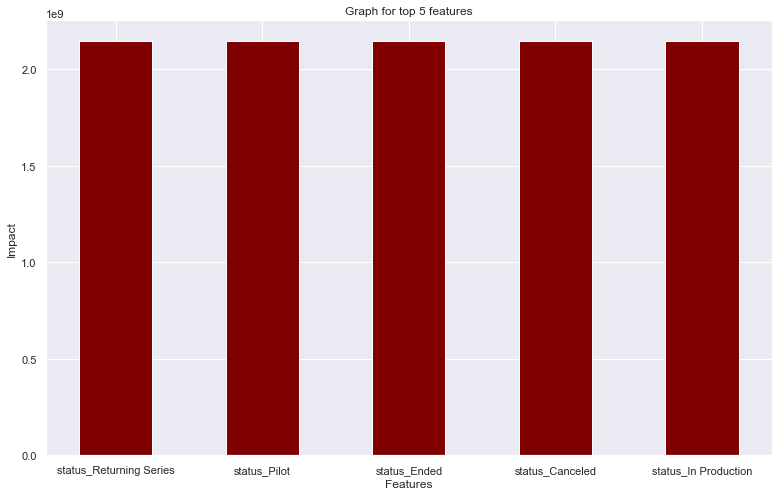

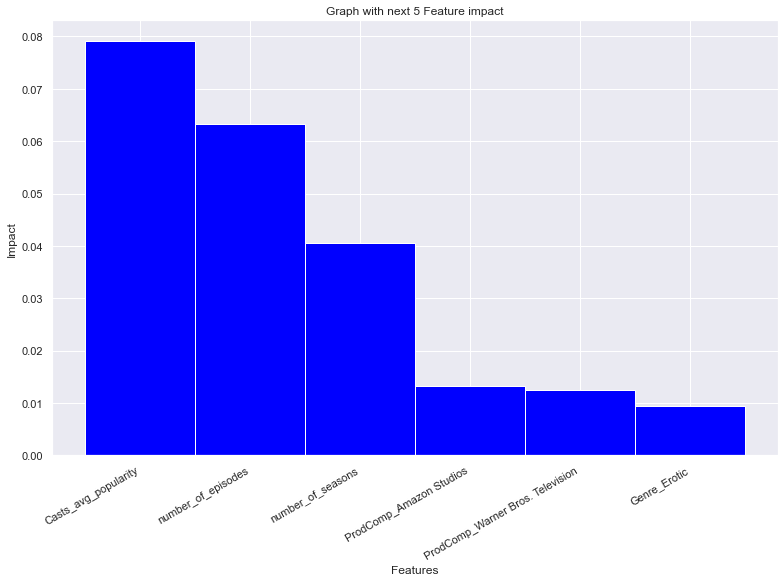

2022-11-28 14:09:54,289| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 14:09:55,202| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 14:10:04,533| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 14:10:05,461| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 14:10:14,670| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


In [181]:
from matplotlib import pyplot as plt
import seaborn as sns
importance=(model.coef_)
print(type(importance))
#print(model.coef_)
imp=[]
dic={}

for i in range(57):
    dic[cols[i]]=importance[0][i]
    imp.append(importance[0][i])
    #print(dic[cols[i]])
#for item in dic.items():
    #print(item)

sorted_dic = sorted(dic.items(), key=lambda x:x[1],reverse=True)
#for el in sorted_dic:
#    print(el)
c=0
top_5=[]
for el in sorted_dic:
    if c==5:
        break
    else:
        top_20.append(el)
        print(el)
    c+=1
    
    
top_7_12=[]
c=0
for el in sorted_dic:
    if c==12:
        break
    if(c>=6):
        top_7_12.append(el)
        print(el)
    c+=1
   
x_axis_new=[]
y_axis_new=[]

for i in range(len(top_7_12)):
    x_axis_new.append(top_7_12[i][0])
    y_axis_new.append(top_7_12[i][1])


x_axis=[]
y_axis=[]
#top_20[0][1]
for i in range(len(top_20)):
    x_axis.append(top_20[i][0])
    y_axis.append(top_20[i][1])
    
#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x_axis, y_axis, color ='maroon',
        width = 0.5)
 
plt.xlabel("Features")
plt.ylabel("Impact")
plt.title("Graph for top 5 features")
plt.show()

plt.bar(x_axis_new, y_axis_new, color ='blue',
        width = 1)
 
plt.xlabel("Features")
plt.ylabel("Impact")
plt.title("Graph with next 5 Feature impact")
plt.xticks(rotation=30, ha='right')
plt.show()

# data=pd.DataFrame()
# data[x_axis]=x_axis
# data[y_axis]=y_axis

# sns.set(rc={'figure.figsize':(13,8)})
# j=sns.barplot(x="Feature", y="Impact", data=data)
# j.set_xticklabels(j.get_xticklabels(), rotation=70)

# sns.set()

In [101]:
print(model.intercept_)

[0.00228127]


In [102]:
#pd.DataFrame(model.coef_, indep_var.columns, columns = ['Coeff'])

### Making predictions on test set data

In [103]:
predictions = model.predict(x_test)

In [104]:
predictions

array([[ 0.00029047],
       [ 0.00903843],
       [ 0.00611965],
       ...,
       [-0.00080888],
       [-0.00411717],
       [ 0.00763683]])

In [105]:
dep_var.describe()

,Popularity
count,20368.000000
mean,0.003037
std,0.017156
min,0.000000
25%,0.000127
50%,0.000348
75%,0.001728
max,1.000000


In [106]:
dep_var.head()

,Popularity
0,0.000127
1,0.000127
2,0.000127
3,0.000178
4,0.000127


### Graph on predictions and actual test set data

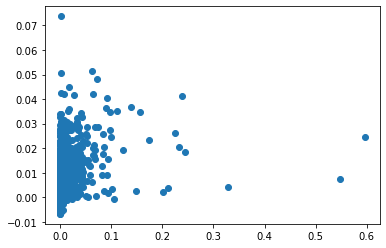

In [107]:
plt.scatter(y_test, predictions)

### Histogram on validation dataset and predictions made

(array([4.390e+02, 5.643e+03, 1.800e+01, 2.000e+00, 6.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.07130662, -0.00707829,  0.05715003,  0.12137836,  0.18560669,
         0.24983501,  0.31406334,  0.37829167,  0.44252   ,  0.50674832,
         0.57097665]),
 <BarContainer object of 10 artists>)

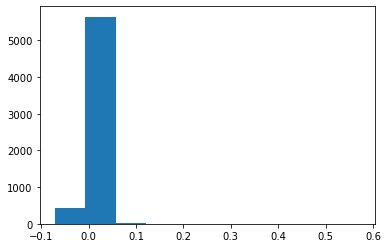

In [108]:

plt.hist(y_test - predictions)

### Calculating mean Absolute error for our model

In [109]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)


0.0038199948824662318

### Calculating mean squared error for our model

In [110]:

metrics.mean_squared_error(y_test, predictions)

0.00022532572844625843

### Calculating r squared error for our model

In [111]:
 r_sq = model.score(x_train, y_train)
>>> print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.09469286884948858


In [112]:
x_test.head()

,episode_run_time,number_of_episodes,number_of_seasons,Genre_Action & Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Erotic,...,ProdComp_Sony Pictures Television Studios,ProdComp_Studio Dragon,ProdComp_TV Asahi,ProdComp_TV Tokyo,ProdComp_TVB,ProdComp_Toei Animation,ProdComp_Toei Company,ProdComp_Universal Television,ProdComp_Warner Bros. Television,Casts_avg_popularity
2905,0.021635,0.000064,0.007634,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.000000
18976,0.028846,0.005731,0.038168,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.039610
17029,0.0,0.001592,0.007634,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.099104
10241,0.028846,0.004203,0.015267,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.031461
11646,0.028846,0.109781,0.114504,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.033119


In [113]:
y_test

,Popularity
2905,0.000127
18976,0.016969
17029,0.000283
10241,0.001527
11646,0.046972
...,...
17723,0.000127
13346,0.000127
9189,0.000127
20268,0.000000


2022-11-28 13:09:04,463| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


### Feature Selection for our dataset

In [114]:
from sklearn.feature_selection import SelectFromModel

# #Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=LinearRegression())
sfm_selector.fit(x_train, y_train)
x_train.columns[sfm_selector.get_support()]

2022-11-28 13:09:04,575| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


Index(['type_Documentary', 'type_Miniseries', 'type_News', 'type_Reality',
       'type_Scripted', 'type_Talk Show', 'type_Video', 'status_Canceled',
       'status_Ended', 'status_In Production', 'status_Pilot',
       'status_Planned', 'status_Returning Series'],
      dtype='object')

2022-11-28 13:09:14,648| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:09:14,757| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:09:24,849| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:09:24,958| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:09:35,037| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active


2022-11-28 13:12:37,964| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:12:48,037| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:12:48,239| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:12:58,279| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
2022-11-28 13:12:58,426| ERROR   | Could not establish connection from local ('127.0.0.1', 61203) to remote ('127.0.0.1', 27017) side of the tunnel: open new channel ssh error: SSH session not active
